In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [221]:
X_train = pd.read_csv('../data/processed/X_train_norm.csv')
y_train = pd.read_csv('../data/processed/y_train_norm.csv')
X_test = pd.read_csv('../data/processed/X_test_norm.csv')
y_train = y_train['SalePrice']

In [164]:
print (X_train.shape)
print(y_train.shape)
print(X_test.shape)
X_train

(1458, 215)
(1458,)
(1459, 216)


,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,...,Electrical_Mix,Electrical_SBrkr,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,-0.175681,-0.165265,0.646073,-0.507197,1.046078,0.896679,1.230760,1.039627,-0.230007,0.576995,...,-0.018509,0.303988,-0.064238,-0.041416,-0.094785,-0.055603,-0.052414,-0.298578,-0.049021,0.394371
1,0.505985,0.079835,-0.063174,2.187904,0.154737,-0.395536,-0.819000,-0.683639,-0.230007,0.576995,...,-0.018509,0.303988,-0.064238,-0.041416,-0.094785,-0.055603,-0.052414,-0.298578,-0.049021,0.394371
2,-0.034375,0.390223,0.646073,-0.507197,0.980053,0.848819,1.195888,1.039627,-0.230007,0.576995,...,-0.018509,0.303988,-0.064238,-0.041416,-0.094785,-0.055603,-0.052414,-0.298578,-0.049021,0.394371
3,-0.417526,0.069724,0.646073,-0.507197,-1.859033,-0.682695,-0.819000,-0.683639,-0.230007,-0.527431,...,-0.018509,0.303988,-0.064238,-0.041416,-0.094785,-0.055603,-0.052414,-0.298578,-0.049021,0.394371
4,0.678271,0.866306,1.355319,-0.507197,0.947040,0.753100,1.326990,1.039627,-0.230007,0.576995,...,-0.018509,0.303988,-0.064238,-0.041416,-0.094785,-0.055603,-0.052414,-0.298578,-0.049021,0.394371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,-0.319795,-0.288859,-0.063174,-0.507197,0.914028,0.753100,-0.819000,-0.683639,-0.230007,0.576995,...,-0.018509,0.303988,-0.064238,-0.041416,-0.094785,-0.055603,-0.052414,-0.298578,-0.049021,0.394371
1454,0.720791,0.705762,-0.063174,0.391170,0.220763,0.178782,1.135727,-0.683639,-0.230007,0.576995,...,-0.018509,0.303988,-0.064238,-0.041416,-0.094785,-0.055603,-0.052414,-0.298578,-0.049021,0.394371
1455,-0.128276,-0.035700,0.646073,3.086271,-1.000704,1.040259,-0.819000,2.762894,2.455559,-0.527431,...,-0.018509,0.303988,-0.064238,-0.041416,-0.094785,-0.055603,-0.052414,-0.298578,-0.049021,0.394371
1456,-0.034375,0.103316,-0.772420,0.391170,-0.703591,0.561660,-0.819000,-0.683639,-0.230007,-0.527431,...,-0.018509,-3.288481,-0.064238,-0.041416,-0.094785,-0.055603,-0.052414,-0.298578,-0.049021,0.394371


In [146]:
housing_prices_df_raw = pd.read_csv('../data/raw/train.csv')
test_housing_prices_df_raw = pd.read_csv('../data/raw/test.csv')

train_hdf = housing_prices_df_raw.copy()
test_hdf = test_housing_prices_df_raw.copy()

hdf = pd.concat([train_hdf, test_hdf], axis = 0, sort = False)
hdf_eda = hdf.copy()

# ## Inspect data frame

# ## Identify features by variable type

# ord_feat_num = ['OverallQual', 'OverallCond', 'BsmtFullBath', 
#         'BsmtHalfBath', 'FullBath', 'HalfBath',
#         'TotRmsAbvGrd', 'Fireplaces', 'BedroomAbvGr', 
#         'KitchenAbvGr', 'GarageCars']

# ord_feat_cat = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 
#         'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 
#         'HeatingQC', 'KitchenQual', 'FireplaceQu', 
#         'GarageQual', 'GarageCond', 'PoolQC']

# ord_feat = ord_feat_num + ord_feat_cat

# nom_feat = ['MSSubClass', 'MSZoning', 'Alley', 'LotShape', 
#        'LandContour', 'Utilities', 'Neighborhood', 
#        'Condition1', 'Condition2', 'BldgType', 'RoofStyle', 
#        'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 
#        'Foundation', 'Heating', 'CentralAir', 'Electrical', 
#        'GarageType', 'MiscFeature', 'SaleType', 'SaleCondition', 
#        'GarageFinish', 'PavedDrive', 'Fence', 'Functional', 
#        'HouseStyle','LotConfig', 'Street', 'LandSlope']

cont_feat = ['LotFrontage', 'LotArea', 'YearBuilt', 
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 
       'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 
       'GarageYrBlt', 'WoodDeckSF', 'OpenPorchSF', 
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 
       'MiscVal', 'MoSold', 'YrSold','BsmtUnfSF', 'GarageArea', 
       'LowQualFinSF', 'GrLivArea']

             
skew_feat = ['LotFrontage', 'LotArea', 
'MasVnrArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF'
             , 'PoolArea', 'LowQualFinSF', 'GrLivArea', 
'TotalPorchAreasSF']

In [147]:
ord_feat_cat = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 
            'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 
            'HeatingQC', 'KitchenQual', 'FireplaceQu', 
            'GarageQual', 'GarageCond', 'PoolQC']

# Transform ordinary features in numeric
hdf[ord_feat_cat] = hdf[ord_feat_cat].replace({'Ex': 5, 'Gd': 4, 
                                            'TA': 3, 'Fa': 2, 
                                            'Po': 1, np.nan: 0})

hdf[['BsmtExposure']] = hdf[['BsmtExposure']].replace({'Gd': 4, 'Av': 3, 
                                                    'Mn': 2, 'No': 1, 
                                                    np.nan: 0})

hdf[['BsmtFinType1', 'BsmtFinType2']] = hdf[['BsmtFinType1', 
                                            'BsmtFinType2']].replace({'GLQ': 6, 'ALQ': 5, 
                                                                    'BLQ': 4, 'Rec': 3, 
                                                                    'LwQ': 2, 'Unf': 1, 
                                                                    np.nan: 0})

hdf[['Fence']] = hdf[['Fence']].replace({'MnPrv': 1, 'GdWo': 1, 
                                        'GdPrv': 1, 'MnWw': 1, 
                                        np.nan: 0})

for col in ['GarageYrBlt', 'GarageArea', 'GarageCars']:
    hdf[col].fillna(0, inplace = True)
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    hdf[col].fillna('NoGarage', inplace = True)
for col in ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']:
    hdf[col].fillna('NoBsmt', inplace = True)
hdf['LotFrontage'] = hdf.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

    # Inpute all the rest na's with median or mode.
for col in set(hdf.columns) - {'SalePrice'}:
    if hdf[col].dtype == 'object':
        hdf.fillna({col:stats.mode(hdf[col]).mode[0]}, inplace = True)
    else:
        hdf.fillna({col:np.median(hdf.loc[~hdf[col].isnull(), col])}, inplace = True)

In [148]:
hdf['Remodeled'] = pd.Series([1 if a > 0 else 0 for a in (hdf['YearRemodAdd'] - hdf['YearBuilt'])])
hdf['TotalPorchAreasSF'] = hdf['OpenPorchSF'] + hdf['EnclosedPorch'] + \
                            hdf['3SsnPorch'] + hdf['ScreenPorch'] + hdf['WoodDeckSF']
hdf ['TotalBath'] = hdf['FullBath'] + hdf['BsmtFullBath'] + .5*(hdf['HalfBath'] + hdf['BsmtHalfBath'])
hdf['OtherRoomsAbvGrd'] = hdf['TotRmsAbvGrd'] - hdf['KitchenAbvGr'] - hdf['FullBath']

hdf['HasPool'] = hdf['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
hdf['Has2ndFloor'] = hdf['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
hdf['HasGarage'] = hdf['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
hdf['HasBsmt'] = hdf['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
hdf['HasFireplace'] = hdf['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)


hdf.drop(columns = ['Utilities', 'Street', 'PoolQC'], inplace = True)
hdf.drop(columns = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF'], inplace = True)
hdf.drop(columns = ['FullBath', 'BsmtFullBath', 'HalfBath','BsmtHalfBath'], inplace = True)
hdf.drop(columns = ['OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'WoodDeckSF'], inplace = True)
hdf.drop(columns = 'MiscFeature', inplace = True)
hdf.drop(columns = 'TotRmsAbvGrd', inplace = True)

In [162]:
skew_feat = ['LotFrontage', 'LotArea', 
'MasVnrArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF'
             , 'PoolArea', 'LowQualFinSF', 'GrLivArea', 
'TotalPorchAreasSF']

for col in skew_feat:
    hdf[col] = pd.Series(stats.boxcox(hdf[col]+1)[0])


6.3428659554586275
5.026755885809532
0.0
0.0
4.862589776810105
0.0
0.0
0.0
5.6075570271934145
0.0


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,...,SalePrice,Remodeled,TotalPorchAreasSF,TotalBath,OtherRoomsAbvGrd,HasPool,Has2ndFloor,HasGarage,HasBsmt,HasFireplace
0,1,60,RL,12.104865,6.524731,Grvl,Reg,Lvl,Inside,Gtl,...,208500.0,0,9.329545,3.5,5,0,1,1,1,0
1,2,20,RL,13.530947,6.621162,Grvl,Reg,Lvl,FR2,Gtl,...,181500.0,0,18.731962,2.5,3,0,0,1,1,1
2,3,60,RL,12.403080,6.741730,Grvl,IR1,Lvl,Inside,Gtl,...,223500.0,1,7.827631,3.5,3,0,1,1,1,1
3,4,70,RL,11.591080,6.617206,Grvl,IR1,Lvl,Corner,Gtl,...,140000.0,1,18.967830,2.0,5,0,1,1,1,1
4,5,60,RL,13.886640,6.923446,Grvl,IR1,Lvl,FR2,Gtl,...,250000.0,0,18.136076,3.5,6,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,11.799231,6.435043,Grvl,Reg,Lvl,Inside,Gtl,...,NaN,1,12.331781,1.5,3,0,1,0,1,0
1455,2916,160,RM,11.799231,6.475681,Grvl,Reg,Lvl,Inside,Gtl,...,NaN,1,7.646761,1.5,4,0,1,1,1,0
1456,2917,20,RL,13.974148,6.862591,Grvl,Reg,Lvl,Inside,Gtl,...,NaN,1,20.015131,2.0,5,0,0,1,1,1
1457,2918,85,RL,12.205069,6.575844,Grvl,Reg,Lvl,Inside,Gtl,...,NaN,1,9.258372,1.5,4,0,0,0,1,0


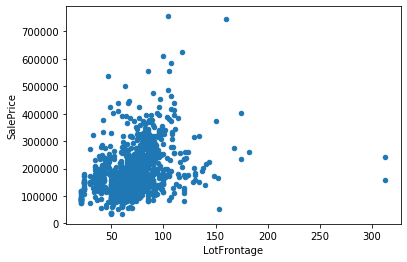

In [129]:
hdf.plot(x = 'LotFrontage', y = 'SalePrice', kind = 'scatter')

In [ ]:
# hdf[ord_feat_cat] = hdf[ord_feat_cat].replace({'Ex': 5, 'Gd': 4, 
#                                                'TA': 3, 'Fa': 2, 
#                                                'Po': 1, np.nan: 0})

# hdf[['BsmtExposure']] = hdf[['BsmtExposure']].replace({'Gd': 4, 'Av': 3, 
#                                                        'Mn': 2, 'No': 1, 
#                                                        np.nan: 0})

# hdf[['BsmtFinType1', 'BsmtFinType2']] = hdf[['BsmtFinType1', 
#                                              'BsmtFinType2']].replace({'GLQ': 6, 'ALQ': 5, 
#                                                                        'BLQ': 4, 'Rec': 3, 
#                                                                        'LwQ': 2, 'Unf': 1, 
#                                                                        np.nan: 0})

# hdf[['Fence']] = hdf[['Fence']].replace({'MnPrv': 'HasFence', 'GdWo': 'HasFence', 
#                                          'GdPrv': 'HasFence', 'MnWw': 'HasFence', 
#                                          np.nan: 'NoFence'})


# hdf['LotFrontage'] = hdf.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

# from scipy import stats

# for col in set(hdf.columns) - {'SalePrice', 'LotFrontage'}:
#     if hdf[col].dtype == 'object':
#         hdf.fillna({col:stats.mode(hdf[col]).mode[0]}, inplace = True)
#     else:
#         hdf.fillna({col:np.median(hdf.loc[~hdf[col].isnull(), col])}, inplace = True)


# hdf['Remodeled'] = pd.Series([1 if a > 0 else 0 for a in (hdf['YearRemodAdd'] - hdf['YearBuilt'])])
# hdf['TotalPorchAreasSF'] = hdf['OpenPorchSF'] + hdf['EnclosedPorch'] + \
#                             hdf['3SsnPorch'] + hdf['ScreenPorch'] + hdf['WoodDeckSF']
# hdf ['TotalBath'] = hdf['FullBath'] + hdf['BsmtFullBath'] + .5*(hdf['HalfBath'] + hdf['BsmtHalfBath'])
# hdf['OtherRoomsAbvGrd'] = hdf['TotRmsAbvGrd'] - hdf['KitchenAbvGr'] - hdf['FullBath']


# hdf.drop(columns = ['Utilities', 'Street', 'PoolQC'], inplace = True)
# hdf.drop(columns = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF'], inplace = True)
# hdf.drop(columns = ['FullBath', 'BsmtFullBath', 'HalfBath','BsmtHalfBath'], inplace = True)
# hdf.drop(columns = ['OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'WoodDeckSF'], inplace = True)
# hdf.drop(columns = 'MiscFeature', inplace = True)
# hdf.drop(columns = 'TotRmsAbvGrd', inplace = True)


# ord_feat_num = set(ord_feat_num).union(set(['TotalBath', 'OtherRoomsAbvGrd', 'Remodeled'])) - \
# set(['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'TotRmsAbvGrd',' KitchenAbvGr', 'GarageCars'])

# ord_feat_cat = set(ord_feat_cat) - set(['PoolQC'])

# ord_feat = ord_feat_num.union(ord_feat_cat)

# nom_feat = set(nom_feat) - set(['Utilities','MiscFeature','Street'])

# cont_feat = list(set(cont_feat).union(set(['TotalPorchAreasSF'])) - set(['Utilities', 'Street', 'PoolQC'] +\
# ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF'] +\
# ['FullBath', 'BsmtFullBath', 'HalfBath','BsmtHalfBath'] +\
# ['OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'WoodDeckSF'] +\
# ['MiscFeature', 'TotRmsAbvGrd']))

In [ ]:
# # Dummify and Transforming prine to log price
# X = pd.get_dummies(hdf, columns = nom_feat, drop_first=True)

# for col in set(X.columns) - {'SalePrice', 'Id'}:
#     if np.std(X[col]) != 0:
#         X.loc[:, col] = (X[col] - np.mean(X[col]))/np.std(X[col], ddof=1)

# X_train = X.loc[~X['SalePrice'].isnull(), :]

# X_train.drop((X_train.loc[X_train['GrLivArea']>4.3, :]).index, inplace = True)

# X_train.drop((X_train.loc[X_train['LotArea']>10, :]).index, inplace = True)

# X_train.drop((X_train.loc[X_train['LotFrontage']>6, :]).index, inplace = True)

# X_train.reset_index(drop=True, inplace=True)

# print(sum(X_train['OverallQual']< -3))

# hdf.plot(x = 'OverallQual', y = 'SalePrice', kind = 'scatter', logy = True)

# # X_train = X_train.loc[(X_train['GrLivArea'] < 4000) & (X_train['LotArea'] < 100000) & (X_train['LotFrontage'] < 250),:]

# # # #Removing Outliers
# # X_train.drop(X_train[(X_train['OverallQual']<5) & (X_train['SalePrice']>200000)].index, inplace=True)

# # X_train.drop(X_train[(X_train['GrLivArea']>4500) & (X_train['SalePrice']<300000)].index, inplace=True)

# # X_train.reset_index(drop=True, inplace=True)


# y_train = np.log1p(X_train.loc[~X_train['SalePrice'].isnull(), 'SalePrice']) ## log price here!!

# X_train.drop(columns = ['Id', 'SalePrice'], inplace = True)
# X_test = X.loc[X['SalePrice'].isnull(), :].drop(columns = ['SalePrice'])

# Lasso feature selection

In [ ]:
from sklearn.linear_model import Lasso
import seaborn as sns

In [ ]:
lasso_lm = Lasso(max_iter=1e7, warm_start=True, normalize = True)

In [ ]:
## Try this as well. takes a long time!
lasso_coefs = []
alphas      = np.logspace(-6, 1, 1000)

In [ ]:
lasso_coefs = []
alphas      = np.logspace(-2, 0.5, 2)

In [ ]:
for alpha in alphas:
    lasso_lm.set_params(alpha = alpha).fit(X_train, y_train)
    lasso_coefs.append(lasso_lm.coef_)

In [ ]:
df_coef = pd.DataFrame(lasso_coefs, index=alphas, columns = X_train.columns)
title = 'Lasso coefficients as a function of the regularization'
df_coef.plot(logx=True, title=title, legend = False)
plt.xlabel('alpha')
plt.ylabel('coefficients')
plt.show()

In [ ]:
df_coef.iloc[:, np.random.choice(range(df_coef.shape[1]), size = 10, replace = False)].plot(logx=True, title=title)

In [ ]:
coef_orders = []
for row in df_coef.index:
    coef_orders.extend([list(df_coef.loc[:,df_coef.loc[row, :] > 0.001].columns)])

In [ ]:
last = []
s = 0
for i in sorted(np.unique(coef_orders), key = len):
    print (set(i) - set(last))
    s += len(set(i) - set(last))
    last = i


In [ ]:
df_coef.loc[:, ['OverallQual','GrLivArea', 'TotalBath', 
                'GarageCars', 'TotalBsmtSF','KitchenQual',
                'GarageArea', 'YearBuilt', 'ExterQual',
                'YearRemodAdd', '1stFlrSF', 'FireplaceQu']].plot(logx=True, title=title)

# Grid search CV in lasso regression

In [222]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

In [223]:
lasso_gs = Lasso(max_iter = 1e7, warm_start = True)

In [224]:
grid_params = [{'alpha': np.logspace(-4, -2, 50)}]

In [225]:
lasso_param_search = GridSearchCV(estimator = lasso_gs, 
                                  param_grid = grid_params, cv=5, 
                                  return_train_score=True, verbose=2)

In [226]:
lasso_param_search.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] alpha=0.0001 ....................................................
[CV] ..................................... alpha=0.0001, total=   0.2s
[CV] alpha=0.0001 ....................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] ..................................... alpha=0.0001, total=   0.2s
[CV] alpha=0.0001 ....................................................
[CV] ..................................... alpha=0.0001, total=   0.1s
[CV] alpha=0.0001 ....................................................
[CV] ..................................... alpha=0.0001, total=   0.2s
[CV] alpha=0.0001 ....................................................
[CV] ..................................... alpha=0.0001, total=   0.2s
[CV] alpha=0.00010985411419875583 ....................................
[CV] ..................... alpha=0.00010985411419875583, total=   0.2s
[CV] alpha=0.00010985411419875583 ....................................
[CV] ..................... alpha=0.00010985411419875583, total=   0.3s
[CV] alpha=0.00010985411419875583 ....................................
[CV] ..................... alpha=0.00010985411419875583, total=   0.1s
[CV] alpha=0.00010985411419875583 ....................................
[CV] .

[CV] ..................... alpha=0.00030888435964774815, total=   0.1s
[CV] alpha=0.00030888435964774815 ....................................
[CV] ..................... alpha=0.00030888435964774815, total=   0.1s
[CV] alpha=0.00030888435964774815 ....................................
[CV] ..................... alpha=0.00030888435964774815, total=   0.1s
[CV] alpha=0.00030888435964774815 ....................................
[CV] ..................... alpha=0.00030888435964774815, total=   0.1s
[CV] alpha=0.00030888435964774815 ....................................
[CV] ..................... alpha=0.00030888435964774815, total=   0.1s
[CV] alpha=0.000339322177189533 ......................................
[CV] ....................... alpha=0.000339322177189533, total=   0.0s
[CV] alpha=0.000339322177189533 ......................................
[CV] ....................... alpha=0.000339322177189533, total=   0.1s
[CV] alpha=0.000339322177189533 ......................................
[CV] .

[CV] ...................... alpha=0.0010481131341546852, total=   0.0s
[CV] alpha=0.0010481131341546852 .....................................
[CV] ...................... alpha=0.0010481131341546852, total=   0.0s
[CV] alpha=0.0010481131341546852 .....................................
[CV] ...................... alpha=0.0010481131341546852, total=   0.0s
[CV] alpha=0.0010481131341546852 .....................................
[CV] ...................... alpha=0.0010481131341546852, total=   0.0s
[CV] alpha=0.0011513953993264468 .....................................
[CV] ...................... alpha=0.0011513953993264468, total=   0.0s
[CV] alpha=0.0011513953993264468 .....................................
[CV] ...................... alpha=0.0011513953993264468, total=   0.0s
[CV] alpha=0.0011513953993264468 .....................................
[CV] ...................... alpha=0.0011513953993264468, total=   0.0s
[CV] alpha=0.0011513953993264468 .....................................
[CV] .

[CV] ...................... alpha=0.0032374575428176433, total=   0.0s
[CV] alpha=0.0032374575428176433 .....................................
[CV] ...................... alpha=0.0032374575428176433, total=   0.0s
[CV] alpha=0.0032374575428176433 .....................................
[CV] ...................... alpha=0.0032374575428176433, total=   0.0s
[CV] alpha=0.0032374575428176433 .....................................
[CV] ...................... alpha=0.0032374575428176433, total=   0.0s
[CV] alpha=0.0032374575428176433 .....................................
[CV] ...................... alpha=0.0032374575428176433, total=   0.0s
[CV] alpha=0.0035564803062231283 .....................................
[CV] ...................... alpha=0.0035564803062231283, total=   0.0s
[CV] alpha=0.0035564803062231283 .....................................
[CV] ...................... alpha=0.0035564803062231283, total=   0.0s
[CV] alpha=0.0035564803062231283 .....................................
[CV] .

[CV] ....................... alpha=0.009102981779915217, total=   0.0s
[CV] alpha=0.009102981779915217 ......................................
[CV] ....................... alpha=0.009102981779915217, total=   0.0s
[CV] alpha=0.01 ......................................................
[CV] ....................................... alpha=0.01, total=   0.0s
[CV] alpha=0.01 ......................................................
[CV] ....................................... alpha=0.01, total=   0.0s
[CV] alpha=0.01 ......................................................
[CV] ....................................... alpha=0.01, total=   0.0s
[CV] alpha=0.01 ......................................................
[CV] ....................................... alpha=0.01, total=   0.0s
[CV] alpha=0.01 ......................................................
[CV] ....................................... alpha=0.01, total=   0.0s


[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:   11.6s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=10000000.0, normalize=False,
                             positive=False, precompute=False,
                             random_state=None, selection='cyclic', tol=0.0001,
                             warm_start=True),
             iid='warn', n_jobs=None,
             param_grid=[{'alpha': array([0.0001    , 0.00010985, 0.00012068, 0.00013257, 0.00014563,
       0.000159...
       0.00104811, 0.0011514 , 0.00126486, 0.0013895 , 0.00152642,
       0.00167683, 0.00184207, 0.00202359, 0.002223  , 0.00244205,
       0.0026827 , 0.00294705, 0.00323746, 0.00355648, 0.00390694,
       0.00429193, 0.00471487, 0.00517947, 0.00568987, 0.00625055,
       0.00686649, 0.00754312, 0.00828643, 0.00910298, 0.01      ])}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=2)

In [227]:
lasso_param_search

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=10000000.0, normalize=False,
                             positive=False, precompute=False,
                             random_state=None, selection='cyclic', tol=0.0001,
                             warm_start=True),
             iid='warn', n_jobs=None,
             param_grid=[{'alpha': array([0.0001    , 0.00010985, 0.00012068, 0.00013257, 0.00014563,
       0.000159...
       0.00104811, 0.0011514 , 0.00126486, 0.0013895 , 0.00152642,
       0.00167683, 0.00184207, 0.00202359, 0.002223  , 0.00244205,
       0.0026827 , 0.00294705, 0.00323746, 0.00355648, 0.00390694,
       0.00429193, 0.00471487, 0.00517947, 0.00568987, 0.00625055,
       0.00686649, 0.00754312, 0.00828643, 0.00910298, 0.01      ])}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=2)

In [228]:
mean_test_score = lasso_param_search.cv_results_['mean_test_score']
std_test_score = lasso_param_search.cv_results_['std_test_score']
mean_train_score = lasso_param_search.cv_results_['mean_train_score']
std_train_score = lasso_param_search.cv_results_['std_train_score']

params = list(map(lambda s: s['alpha'], lasso_param_search.cv_results_['params']))

In [229]:
lasso_vis_df = pd.DataFrame({'param': params, 'mean_test_score': mean_test_score,
                             'std_test_score': std_test_score, 
                             'mean_train_score':mean_train_score,
                             'std_train_score': std_train_score})

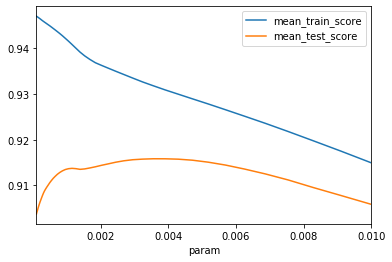

In [231]:
lasso_vis_df.plot(x = 'param', y = ['mean_train_score', 'mean_test_score'])

In [ ]:
best_alpha = lasso_param_search.best_estimator_.get_params()['alpha']
print(best_alpha)

In [237]:
lasso_gs3 = Lasso(max_iter = 1e7, warm_start = True)
grid_params3 = [{'alpha': np.linspace(0.003, 0.004, 1200)}]

lasso_param_search3 = GridSearchCV(estimator = lasso_gs3, 
                                   param_grid = grid_params3, cv=12, 
                                   return_train_score=True, verbose=2)

lasso_param_search3.fit(X_train, y_train)

Fitting 12 folds for each of 1200 candidates, totalling 14400 fits
[CV] alpha=0.003 .....................................................
[CV] ...................................... alpha=0.003, total=   0.0s
[CV] alpha=0.003 .....................................................
[CV] ...................................... alpha=0.003, total=   0.0s
[CV] alpha=0.003 .....................................................
[CV] ...................................... alpha=0.003, total=   0.0s
[CV] alpha=0.003 .....................................................
[CV] ...................................... alpha=0.003, total=   0.0s
[CV] alpha=0.003 .....................................................
[CV] ...................................... alpha=0.003, total=   0.0s
[CV] alpha=0.003 .....................................................
[CV] ...................................... alpha=0.003, total=   0.0s
[CV] alpha=0.003 .....................................................
[CV] .....

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ...................... alpha=0.0030008340283569643, total=   0.0s
[CV] alpha=0.0030008340283569643 .....................................
[CV] ...................... alpha=0.0030008340283569643, total=   0.0s
[CV] alpha=0.0030008340283569643 .....................................
[CV] ...................... alpha=0.0030008340283569643, total=   0.0s
[CV] alpha=0.0030008340283569643 .....................................
[CV] ...................... alpha=0.0030008340283569643, total=   0.0s
[CV] alpha=0.0030008340283569643 .....................................
[CV] ...................... alpha=0.0030008340283569643, total=   0.0s
[CV] alpha=0.0030008340283569643 .....................................
[CV] ...................... alpha=0.0030008340283569643, total=   0.0s
[CV] alpha=0.0030008340283569643 .....................................
[CV] ...................... alpha=0.0030008340283569643, total=   0.0s
[CV] alpha=0.0030008340283569643 .....................................
[CV] .

[CV] ...................... alpha=0.0030050041701417847, total=   0.0s
[CV] alpha=0.0030050041701417847 .....................................
[CV] ...................... alpha=0.0030050041701417847, total=   0.0s
[CV] alpha=0.0030050041701417847 .....................................
[CV] ...................... alpha=0.0030050041701417847, total=   0.0s
[CV] alpha=0.0030050041701417847 .....................................
[CV] ...................... alpha=0.0030050041701417847, total=   0.0s
[CV] alpha=0.0030050041701417847 .....................................
[CV] ...................... alpha=0.0030050041701417847, total=   0.0s
[CV] alpha=0.0030050041701417847 .....................................
[CV] ...................... alpha=0.0030050041701417847, total=   0.0s
[CV] alpha=0.0030050041701417847 .....................................
[CV] ...................... alpha=0.0030050041701417847, total=   0.0s
[CV] alpha=0.003005838198498749 ......................................
[CV] .

[CV] ...................... alpha=0.0030091743119266055, total=   0.0s
[CV] alpha=0.0030091743119266055 .....................................
[CV] ...................... alpha=0.0030091743119266055, total=   0.0s
[CV] alpha=0.0030091743119266055 .....................................
[CV] ...................... alpha=0.0030091743119266055, total=   0.0s
[CV] alpha=0.0030091743119266055 .....................................
[CV] ...................... alpha=0.0030091743119266055, total=   0.0s
[CV] alpha=0.0030100083402835698 .....................................
[CV] ...................... alpha=0.0030100083402835698, total=   0.0s
[CV] alpha=0.0030100083402835698 .....................................
[CV] ...................... alpha=0.0030100083402835698, total=   0.0s
[CV] alpha=0.0030100083402835698 .....................................
[CV] ...................... alpha=0.0030100083402835698, total=   0.0s
[CV] alpha=0.0030100083402835698 .....................................
[CV] .

[CV] ...................... alpha=0.0030141784820683906, total=   0.0s
[CV] alpha=0.0030141784820683906 .....................................
[CV] ...................... alpha=0.0030141784820683906, total=   0.0s
[CV] alpha=0.0030141784820683906 .....................................
[CV] ...................... alpha=0.0030141784820683906, total=   0.0s
[CV] alpha=0.0030141784820683906 .....................................
[CV] ...................... alpha=0.0030141784820683906, total=   0.0s
[CV] alpha=0.0030141784820683906 .....................................
[CV] ...................... alpha=0.0030141784820683906, total=   0.0s
[CV] alpha=0.0030141784820683906 .....................................
[CV] ...................... alpha=0.0030141784820683906, total=   0.0s
[CV] alpha=0.0030141784820683906 .....................................
[CV] ...................... alpha=0.0030141784820683906, total=   0.0s
[CV] alpha=0.0030141784820683906 .....................................
[CV] .

[CV] ....................... alpha=0.003018348623853211, total=   0.0s
[CV] alpha=0.003018348623853211 ......................................
[CV] ....................... alpha=0.003018348623853211, total=   0.0s
[CV] alpha=0.003018348623853211 ......................................
[CV] ....................... alpha=0.003018348623853211, total=   0.0s
[CV] alpha=0.003018348623853211 ......................................
[CV] ....................... alpha=0.003018348623853211, total=   0.0s
[CV] alpha=0.0030191826522101752 .....................................
[CV] ...................... alpha=0.0030191826522101752, total=   0.0s
[CV] alpha=0.0030191826522101752 .....................................
[CV] ...................... alpha=0.0030191826522101752, total=   0.0s
[CV] alpha=0.0030191826522101752 .....................................
[CV] ...................... alpha=0.0030191826522101752, total=   0.0s
[CV] alpha=0.0030191826522101752 .....................................
[CV] .

[CV] ....................... alpha=0.003023352793994996, total=   0.0s
[CV] alpha=0.003023352793994996 ......................................
[CV] ....................... alpha=0.003023352793994996, total=   0.0s
[CV] alpha=0.003023352793994996 ......................................
[CV] ....................... alpha=0.003023352793994996, total=   0.0s
[CV] alpha=0.003023352793994996 ......................................
[CV] ....................... alpha=0.003023352793994996, total=   0.0s
[CV] alpha=0.003023352793994996 ......................................
[CV] ....................... alpha=0.003023352793994996, total=   0.0s
[CV] alpha=0.003023352793994996 ......................................
[CV] ....................... alpha=0.003023352793994996, total=   0.0s
[CV] alpha=0.003023352793994996 ......................................
[CV] ....................... alpha=0.003023352793994996, total=   0.0s
[CV] alpha=0.003023352793994996 ......................................
[CV] .

[CV] ...................... alpha=0.0030275229357798164, total=   0.0s
[CV] alpha=0.0030275229357798164 .....................................
[CV] ...................... alpha=0.0030275229357798164, total=   0.0s
[CV] alpha=0.0030275229357798164 .....................................
[CV] ...................... alpha=0.0030275229357798164, total=   0.0s
[CV] alpha=0.0030275229357798164 .....................................
[CV] ...................... alpha=0.0030275229357798164, total=   0.0s
[CV] alpha=0.0030275229357798164 .....................................
[CV] ...................... alpha=0.0030275229357798164, total=   0.0s
[CV] alpha=0.0030283569641367807 .....................................
[CV] ...................... alpha=0.0030283569641367807, total=   0.0s
[CV] alpha=0.0030283569641367807 .....................................
[CV] ...................... alpha=0.0030283569641367807, total=   0.0s
[CV] alpha=0.0030283569641367807 .....................................
[CV] .

[CV] ...................... alpha=0.0030325271059216015, total=   0.0s
[CV] alpha=0.0030325271059216015 .....................................
[CV] ...................... alpha=0.0030325271059216015, total=   0.0s
[CV] alpha=0.0030325271059216015 .....................................
[CV] ...................... alpha=0.0030325271059216015, total=   0.0s
[CV] alpha=0.0030325271059216015 .....................................
[CV] ...................... alpha=0.0030325271059216015, total=   0.0s
[CV] alpha=0.0030325271059216015 .....................................
[CV] ...................... alpha=0.0030325271059216015, total=   0.0s
[CV] alpha=0.0030325271059216015 .....................................
[CV] ...................... alpha=0.0030325271059216015, total=   0.0s
[CV] alpha=0.0030325271059216015 .....................................
[CV] ...................... alpha=0.0030325271059216015, total=   0.0s
[CV] alpha=0.0030325271059216015 .....................................
[CV] .

[CV] ....................... alpha=0.003036697247706422, total=   0.0s
[CV] alpha=0.003036697247706422 ......................................
[CV] ....................... alpha=0.003036697247706422, total=   0.0s
[CV] alpha=0.003036697247706422 ......................................
[CV] ....................... alpha=0.003036697247706422, total=   0.0s
[CV] alpha=0.003036697247706422 ......................................
[CV] ....................... alpha=0.003036697247706422, total=   0.0s
[CV] alpha=0.003036697247706422 ......................................
[CV] ....................... alpha=0.003036697247706422, total=   0.0s
[CV] alpha=0.003037531276063386 ......................................
[CV] ....................... alpha=0.003037531276063386, total=   0.0s
[CV] alpha=0.003037531276063386 ......................................
[CV] ....................... alpha=0.003037531276063386, total=   0.0s
[CV] alpha=0.003037531276063386 ......................................
[CV] .

[CV] ....................... alpha=0.003041701417848207, total=   0.0s
[CV] alpha=0.003041701417848207 ......................................
[CV] ....................... alpha=0.003041701417848207, total=   0.0s
[CV] alpha=0.003041701417848207 ......................................
[CV] ....................... alpha=0.003041701417848207, total=   0.0s
[CV] alpha=0.003041701417848207 ......................................
[CV] ....................... alpha=0.003041701417848207, total=   0.0s
[CV] alpha=0.003041701417848207 ......................................
[CV] ....................... alpha=0.003041701417848207, total=   0.0s
[CV] alpha=0.003041701417848207 ......................................
[CV] ....................... alpha=0.003041701417848207, total=   0.0s
[CV] alpha=0.003041701417848207 ......................................
[CV] ....................... alpha=0.003041701417848207, total=   0.0s
[CV] alpha=0.003041701417848207 ......................................
[CV] .

[CV] ...................... alpha=0.0030458715596330278, total=   0.0s
[CV] alpha=0.0030458715596330278 .....................................
[CV] ...................... alpha=0.0030458715596330278, total=   0.0s
[CV] alpha=0.0030458715596330278 .....................................
[CV] ...................... alpha=0.0030458715596330278, total=   0.0s
[CV] alpha=0.0030458715596330278 .....................................
[CV] ...................... alpha=0.0030458715596330278, total=   0.0s
[CV] alpha=0.0030467055879899916 .....................................
[CV] ...................... alpha=0.0030467055879899916, total=   0.0s
[CV] alpha=0.0030467055879899916 .....................................
[CV] ...................... alpha=0.0030467055879899916, total=   0.0s
[CV] alpha=0.0030467055879899916 .....................................
[CV] ...................... alpha=0.0030467055879899916, total=   0.0s
[CV] alpha=0.0030467055879899916 .....................................
[CV] .

[CV] ...................... alpha=0.0030508757297748124, total=   0.0s
[CV] alpha=0.0030508757297748124 .....................................
[CV] ...................... alpha=0.0030508757297748124, total=   0.0s
[CV] alpha=0.0030508757297748124 .....................................
[CV] ...................... alpha=0.0030508757297748124, total=   0.0s
[CV] alpha=0.0030508757297748124 .....................................
[CV] ...................... alpha=0.0030508757297748124, total=   0.0s
[CV] alpha=0.0030508757297748124 .....................................
[CV] ...................... alpha=0.0030508757297748124, total=   0.0s
[CV] alpha=0.0030508757297748124 .....................................
[CV] ...................... alpha=0.0030508757297748124, total=   0.0s
[CV] alpha=0.0030508757297748124 .....................................
[CV] ...................... alpha=0.0030508757297748124, total=   0.0s
[CV] alpha=0.0030508757297748124 .....................................
[CV] .

[CV] ....................... alpha=0.003055045871559633, total=   0.0s
[CV] alpha=0.003055045871559633 ......................................
[CV] ....................... alpha=0.003055045871559633, total=   0.0s
[CV] alpha=0.003055879899916597 ......................................
[CV] ....................... alpha=0.003055879899916597, total=   0.0s
[CV] alpha=0.003055879899916597 ......................................
[CV] ....................... alpha=0.003055879899916597, total=   0.0s
[CV] alpha=0.003055879899916597 ......................................
[CV] ....................... alpha=0.003055879899916597, total=   0.0s
[CV] alpha=0.003055879899916597 ......................................
[CV] ....................... alpha=0.003055879899916597, total=   0.0s
[CV] alpha=0.003055879899916597 ......................................
[CV] ....................... alpha=0.003055879899916597, total=   0.0s
[CV] alpha=0.003055879899916597 ......................................
[CV] .

[CV] ....................... alpha=0.003060050041701418, total=   0.0s
[CV] alpha=0.003060050041701418 ......................................
[CV] ....................... alpha=0.003060050041701418, total=   0.0s
[CV] alpha=0.003060050041701418 ......................................
[CV] ....................... alpha=0.003060050041701418, total=   0.0s
[CV] alpha=0.003060050041701418 ......................................
[CV] ....................... alpha=0.003060050041701418, total=   0.0s
[CV] alpha=0.003060050041701418 ......................................
[CV] ....................... alpha=0.003060050041701418, total=   0.0s
[CV] alpha=0.003060050041701418 ......................................
[CV] ....................... alpha=0.003060050041701418, total=   0.0s
[CV] alpha=0.003060050041701418 ......................................
[CV] ....................... alpha=0.003060050041701418, total=   0.0s
[CV] alpha=0.003060050041701418 ......................................
[CV] .

[CV] ...................... alpha=0.0030642201834862387, total=   0.0s
[CV] alpha=0.0030642201834862387 .....................................
[CV] ...................... alpha=0.0030642201834862387, total=   0.0s
[CV] alpha=0.0030642201834862387 .....................................
[CV] ...................... alpha=0.0030642201834862387, total=   0.0s
[CV] alpha=0.0030642201834862387 .....................................
[CV] ...................... alpha=0.0030642201834862387, total=   0.0s
[CV] alpha=0.003065054211843203 ......................................
[CV] ....................... alpha=0.003065054211843203, total=   0.0s
[CV] alpha=0.003065054211843203 ......................................
[CV] ....................... alpha=0.003065054211843203, total=   0.0s
[CV] alpha=0.003065054211843203 ......................................
[CV] ....................... alpha=0.003065054211843203, total=   0.0s
[CV] alpha=0.003065054211843203 ......................................
[CV] .

[CV] ...................... alpha=0.0030692243536280233, total=   0.0s
[CV] alpha=0.0030692243536280233 .....................................
[CV] ...................... alpha=0.0030692243536280233, total=   0.0s
[CV] alpha=0.0030692243536280233 .....................................
[CV] ...................... alpha=0.0030692243536280233, total=   0.0s
[CV] alpha=0.0030692243536280233 .....................................
[CV] ...................... alpha=0.0030692243536280233, total=   0.0s
[CV] alpha=0.0030692243536280233 .....................................
[CV] ...................... alpha=0.0030692243536280233, total=   0.0s
[CV] alpha=0.0030692243536280233 .....................................
[CV] ...................... alpha=0.0030692243536280233, total=   0.0s
[CV] alpha=0.0030692243536280233 .....................................
[CV] ...................... alpha=0.0030692243536280233, total=   0.0s
[CV] alpha=0.0030692243536280233 .....................................
[CV] .

[CV] ....................... alpha=0.003073394495412844, total=   0.0s
[CV] alpha=0.003073394495412844 ......................................
[CV] ....................... alpha=0.003073394495412844, total=   0.0s
[CV] alpha=0.003073394495412844 ......................................
[CV] ....................... alpha=0.003073394495412844, total=   0.0s
[CV] alpha=0.003073394495412844 ......................................
[CV] ....................... alpha=0.003073394495412844, total=   0.0s
[CV] alpha=0.0030742285237698084 .....................................
[CV] ...................... alpha=0.0030742285237698084, total=   0.0s
[CV] alpha=0.0030742285237698084 .....................................
[CV] ...................... alpha=0.0030742285237698084, total=   0.0s
[CV] alpha=0.0030742285237698084 .....................................
[CV] ...................... alpha=0.0030742285237698084, total=   0.0s
[CV] alpha=0.0030742285237698084 .....................................
[CV] .

[CV] ...................... alpha=0.0030783986655546288, total=   0.0s
[CV] alpha=0.0030783986655546288 .....................................
[CV] ...................... alpha=0.0030783986655546288, total=   0.0s
[CV] alpha=0.0030783986655546288 .....................................
[CV] ...................... alpha=0.0030783986655546288, total=   0.0s
[CV] alpha=0.0030783986655546288 .....................................
[CV] ...................... alpha=0.0030783986655546288, total=   0.0s
[CV] alpha=0.0030783986655546288 .....................................
[CV] ...................... alpha=0.0030783986655546288, total=   0.0s
[CV] alpha=0.0030783986655546288 .....................................
[CV] ...................... alpha=0.0030783986655546288, total=   0.0s
[CV] alpha=0.0030783986655546288 .....................................
[CV] ...................... alpha=0.0030783986655546288, total=   0.0s
[CV] alpha=0.0030783986655546288 .....................................
[CV] .

[CV] ...................... alpha=0.0030825688073394496, total=   0.0s
[CV] alpha=0.003083402835696414 ......................................
[CV] ....................... alpha=0.003083402835696414, total=   0.0s
[CV] alpha=0.003083402835696414 ......................................
[CV] ....................... alpha=0.003083402835696414, total=   0.0s
[CV] alpha=0.003083402835696414 ......................................
[CV] ....................... alpha=0.003083402835696414, total=   0.0s
[CV] alpha=0.003083402835696414 ......................................
[CV] ....................... alpha=0.003083402835696414, total=   0.0s
[CV] alpha=0.003083402835696414 ......................................
[CV] ....................... alpha=0.003083402835696414, total=   0.0s
[CV] alpha=0.003083402835696414 ......................................
[CV] ....................... alpha=0.003083402835696414, total=   0.0s
[CV] alpha=0.003083402835696414 ......................................
[CV] .

[CV] ....................... alpha=0.003087572977481234, total=   0.0s
[CV] alpha=0.003087572977481234 ......................................
[CV] ....................... alpha=0.003087572977481234, total=   0.0s
[CV] alpha=0.003087572977481234 ......................................
[CV] ....................... alpha=0.003087572977481234, total=   0.0s
[CV] alpha=0.003087572977481234 ......................................
[CV] ....................... alpha=0.003087572977481234, total=   0.0s
[CV] alpha=0.003087572977481234 ......................................
[CV] ....................... alpha=0.003087572977481234, total=   0.0s
[CV] alpha=0.003087572977481234 ......................................
[CV] ....................... alpha=0.003087572977481234, total=   0.0s
[CV] alpha=0.0030884070058381985 .....................................
[CV] ...................... alpha=0.0030884070058381985, total=   0.0s
[CV] alpha=0.0030884070058381985 .....................................
[CV] .

[CV] ...................... alpha=0.0030925771476230193, total=   0.0s
[CV] alpha=0.0030925771476230193 .....................................
[CV] ...................... alpha=0.0030925771476230193, total=   0.0s
[CV] alpha=0.0030925771476230193 .....................................
[CV] ...................... alpha=0.0030925771476230193, total=   0.0s
[CV] alpha=0.0030925771476230193 .....................................
[CV] ...................... alpha=0.0030925771476230193, total=   0.0s
[CV] alpha=0.0030925771476230193 .....................................
[CV] ...................... alpha=0.0030925771476230193, total=   0.0s
[CV] alpha=0.0030925771476230193 .....................................
[CV] ...................... alpha=0.0030925771476230193, total=   0.0s
[CV] alpha=0.0030925771476230193 .....................................
[CV] ...................... alpha=0.0030925771476230193, total=   0.0s
[CV] alpha=0.0030925771476230193 .....................................
[CV] .

[CV] ........................ alpha=0.00309674728940784, total=   0.0s
[CV] alpha=0.00309674728940784 .......................................
[CV] ........................ alpha=0.00309674728940784, total=   0.0s
[CV] alpha=0.00309674728940784 .......................................
[CV] ........................ alpha=0.00309674728940784, total=   0.0s
[CV] alpha=0.00309674728940784 .......................................
[CV] ........................ alpha=0.00309674728940784, total=   0.0s
[CV] alpha=0.003097581317764804 ......................................
[CV] ....................... alpha=0.003097581317764804, total=   0.0s
[CV] alpha=0.003097581317764804 ......................................
[CV] ....................... alpha=0.003097581317764804, total=   0.0s
[CV] alpha=0.003097581317764804 ......................................
[CV] ....................... alpha=0.003097581317764804, total=   0.0s
[CV] alpha=0.003097581317764804 ......................................
[CV] .

[CV] ...................... alpha=0.0031017514595496247, total=   0.0s
[CV] alpha=0.0031017514595496247 .....................................
[CV] ...................... alpha=0.0031017514595496247, total=   0.0s
[CV] alpha=0.0031017514595496247 .....................................
[CV] ...................... alpha=0.0031017514595496247, total=   0.0s
[CV] alpha=0.0031017514595496247 .....................................
[CV] ...................... alpha=0.0031017514595496247, total=   0.0s
[CV] alpha=0.0031017514595496247 .....................................
[CV] ...................... alpha=0.0031017514595496247, total=   0.0s
[CV] alpha=0.0031017514595496247 .....................................
[CV] ...................... alpha=0.0031017514595496247, total=   0.0s
[CV] alpha=0.0031017514595496247 .....................................
[CV] ...................... alpha=0.0031017514595496247, total=   0.0s
[CV] alpha=0.0031017514595496247 .....................................
[CV] .

[CV] ...................... alpha=0.0031059216013344455, total=   0.0s
[CV] alpha=0.0031059216013344455 .....................................
[CV] ...................... alpha=0.0031059216013344455, total=   0.0s
[CV] alpha=0.0031059216013344455 .....................................
[CV] ...................... alpha=0.0031059216013344455, total=   0.0s
[CV] alpha=0.0031067556296914094 .....................................
[CV] ...................... alpha=0.0031067556296914094, total=   0.0s
[CV] alpha=0.0031067556296914094 .....................................
[CV] ...................... alpha=0.0031067556296914094, total=   0.0s
[CV] alpha=0.0031067556296914094 .....................................
[CV] ...................... alpha=0.0031067556296914094, total=   0.0s
[CV] alpha=0.0031067556296914094 .....................................
[CV] ...................... alpha=0.0031067556296914094, total=   0.0s
[CV] alpha=0.0031067556296914094 .....................................
[CV] .

[CV] ........................ alpha=0.00311092577147623, total=   0.0s
[CV] alpha=0.00311092577147623 .......................................
[CV] ........................ alpha=0.00311092577147623, total=   0.0s
[CV] alpha=0.00311092577147623 .......................................
[CV] ........................ alpha=0.00311092577147623, total=   0.0s
[CV] alpha=0.00311092577147623 .......................................
[CV] ........................ alpha=0.00311092577147623, total=   0.0s
[CV] alpha=0.00311092577147623 .......................................
[CV] ........................ alpha=0.00311092577147623, total=   0.0s
[CV] alpha=0.00311092577147623 .......................................
[CV] ........................ alpha=0.00311092577147623, total=   0.0s
[CV] alpha=0.00311092577147623 .......................................
[CV] ........................ alpha=0.00311092577147623, total=   0.0s
[CV] alpha=0.00311092577147623 .......................................
[CV] .

[CV] ....................... alpha=0.003115095913261051, total=   0.0s
[CV] alpha=0.003115095913261051 ......................................
[CV] ....................... alpha=0.003115095913261051, total=   0.0s
[CV] alpha=0.003115095913261051 ......................................
[CV] ....................... alpha=0.003115095913261051, total=   0.0s
[CV] alpha=0.003115095913261051 ......................................
[CV] ....................... alpha=0.003115095913261051, total=   0.0s
[CV] alpha=0.0031159299416180153 .....................................
[CV] ...................... alpha=0.0031159299416180153, total=   0.0s
[CV] alpha=0.0031159299416180153 .....................................
[CV] ...................... alpha=0.0031159299416180153, total=   0.0s
[CV] alpha=0.0031159299416180153 .....................................
[CV] ...................... alpha=0.0031159299416180153, total=   0.0s
[CV] alpha=0.0031159299416180153 .....................................
[CV] .

[CV] ....................... alpha=0.003119266055045872, total=   0.0s
[CV] alpha=0.003119266055045872 ......................................
[CV] ....................... alpha=0.003119266055045872, total=   0.0s
[CV] alpha=0.003119266055045872 ......................................
[CV] ....................... alpha=0.003119266055045872, total=   0.0s
[CV] alpha=0.0031201000834028356 .....................................
[CV] ...................... alpha=0.0031201000834028356, total=   0.0s
[CV] alpha=0.0031201000834028356 .....................................
[CV] ...................... alpha=0.0031201000834028356, total=   0.0s
[CV] alpha=0.0031201000834028356 .....................................
[CV] ...................... alpha=0.0031201000834028356, total=   0.0s
[CV] alpha=0.0031201000834028356 .....................................
[CV] ...................... alpha=0.0031201000834028356, total=   0.0s
[CV] alpha=0.0031201000834028356 .....................................
[CV] .

[CV] ...................... alpha=0.0031242702251876565, total=   0.0s
[CV] alpha=0.0031242702251876565 .....................................
[CV] ...................... alpha=0.0031242702251876565, total=   0.0s
[CV] alpha=0.0031242702251876565 .....................................
[CV] ...................... alpha=0.0031242702251876565, total=   0.0s
[CV] alpha=0.0031242702251876565 .....................................
[CV] ...................... alpha=0.0031242702251876565, total=   0.0s
[CV] alpha=0.0031242702251876565 .....................................
[CV] ...................... alpha=0.0031242702251876565, total=   0.0s
[CV] alpha=0.0031242702251876565 .....................................
[CV] ...................... alpha=0.0031242702251876565, total=   0.0s
[CV] alpha=0.0031242702251876565 .....................................
[CV] ...................... alpha=0.0031242702251876565, total=   0.0s
[CV] alpha=0.0031242702251876565 .....................................
[CV] .

[CV] ...................... alpha=0.0031284403669724773, total=   0.0s
[CV] alpha=0.0031284403669724773 .....................................
[CV] ...................... alpha=0.0031284403669724773, total=   0.0s
[CV] alpha=0.0031284403669724773 .....................................
[CV] ...................... alpha=0.0031284403669724773, total=   0.0s
[CV] alpha=0.0031284403669724773 .....................................
[CV] ...................... alpha=0.0031284403669724773, total=   0.0s
[CV] alpha=0.0031284403669724773 .....................................
[CV] ...................... alpha=0.0031284403669724773, total=   0.0s
[CV] alpha=0.0031284403669724773 .....................................
[CV] ...................... alpha=0.0031284403669724773, total=   0.0s
[CV] alpha=0.0031284403669724773 .....................................
[CV] ...................... alpha=0.0031284403669724773, total=   0.0s
[CV] alpha=0.0031284403669724773 .....................................
[CV] .

[CV] ...................... alpha=0.0031326105087572977, total=   0.0s
[CV] alpha=0.0031326105087572977 .....................................
[CV] ...................... alpha=0.0031326105087572977, total=   0.0s
[CV] alpha=0.0031326105087572977 .....................................
[CV] ...................... alpha=0.0031326105087572977, total=   0.0s
[CV] alpha=0.0031326105087572977 .....................................
[CV] ...................... alpha=0.0031326105087572977, total=   0.0s
[CV] alpha=0.003133444537114262 ......................................
[CV] ....................... alpha=0.003133444537114262, total=   0.0s
[CV] alpha=0.003133444537114262 ......................................
[CV] ....................... alpha=0.003133444537114262, total=   0.0s
[CV] alpha=0.003133444537114262 ......................................
[CV] ....................... alpha=0.003133444537114262, total=   0.0s
[CV] alpha=0.003133444537114262 ......................................
[CV] .

[CV] ...................... alpha=0.0031376146788990827, total=   0.0s
[CV] alpha=0.0031376146788990827 .....................................
[CV] ...................... alpha=0.0031376146788990827, total=   0.0s
[CV] alpha=0.0031376146788990827 .....................................
[CV] ...................... alpha=0.0031376146788990827, total=   0.0s
[CV] alpha=0.0031376146788990827 .....................................
[CV] ...................... alpha=0.0031376146788990827, total=   0.0s
[CV] alpha=0.0031376146788990827 .....................................
[CV] ...................... alpha=0.0031376146788990827, total=   0.0s
[CV] alpha=0.0031376146788990827 .....................................
[CV] ...................... alpha=0.0031376146788990827, total=   0.0s
[CV] alpha=0.0031376146788990827 .....................................
[CV] ...................... alpha=0.0031376146788990827, total=   0.0s
[CV] alpha=0.0031376146788990827 .....................................
[CV] .

[CV] ....................... alpha=0.003141784820683903, total=   0.0s
[CV] alpha=0.003141784820683903 ......................................
[CV] ....................... alpha=0.003141784820683903, total=   0.0s
[CV] alpha=0.003141784820683903 ......................................
[CV] ....................... alpha=0.003141784820683903, total=   0.0s
[CV] alpha=0.003141784820683903 ......................................
[CV] ....................... alpha=0.003141784820683903, total=   0.0s
[CV] alpha=0.003141784820683903 ......................................
[CV] ....................... alpha=0.003141784820683903, total=   0.0s
[CV] alpha=0.003141784820683903 ......................................
[CV] ....................... alpha=0.003141784820683903, total=   0.0s
[CV] alpha=0.003141784820683903 ......................................
[CV] ....................... alpha=0.003141784820683903, total=   0.0s
[CV] alpha=0.003141784820683903 ......................................
[CV] .

[CV] ....................... alpha=0.003145954962468724, total=   0.0s
[CV] alpha=0.003145954962468724 ......................................
[CV] ....................... alpha=0.003145954962468724, total=   0.0s
[CV] alpha=0.003145954962468724 ......................................
[CV] ....................... alpha=0.003145954962468724, total=   0.0s
[CV] alpha=0.003146788990825688 ......................................
[CV] ....................... alpha=0.003146788990825688, total=   0.0s
[CV] alpha=0.003146788990825688 ......................................
[CV] ....................... alpha=0.003146788990825688, total=   0.0s
[CV] alpha=0.003146788990825688 ......................................
[CV] ....................... alpha=0.003146788990825688, total=   0.0s
[CV] alpha=0.003146788990825688 ......................................
[CV] ....................... alpha=0.003146788990825688, total=   0.0s
[CV] alpha=0.003146788990825688 ......................................
[CV] .

[CV] ....................... alpha=0.003150959132610509, total=   0.0s
[CV] alpha=0.003150959132610509 ......................................
[CV] ....................... alpha=0.003150959132610509, total=   0.0s
[CV] alpha=0.003150959132610509 ......................................
[CV] ....................... alpha=0.003150959132610509, total=   0.0s
[CV] alpha=0.003150959132610509 ......................................
[CV] ....................... alpha=0.003150959132610509, total=   0.0s
[CV] alpha=0.003150959132610509 ......................................
[CV] ....................... alpha=0.003150959132610509, total=   0.0s
[CV] alpha=0.003150959132610509 ......................................
[CV] ....................... alpha=0.003150959132610509, total=   0.0s
[CV] alpha=0.003150959132610509 ......................................
[CV] ....................... alpha=0.003150959132610509, total=   0.0s
[CV] alpha=0.003150959132610509 ......................................
[CV] .

[CV] ...................... alpha=0.0031551292743953294, total=   0.0s
[CV] alpha=0.0031551292743953294 .....................................
[CV] ...................... alpha=0.0031551292743953294, total=   0.0s
[CV] alpha=0.0031551292743953294 .....................................
[CV] ...................... alpha=0.0031551292743953294, total=   0.0s
[CV] alpha=0.0031551292743953294 .....................................
[CV] ...................... alpha=0.0031551292743953294, total=   0.0s
[CV] alpha=0.0031551292743953294 .....................................
[CV] ...................... alpha=0.0031551292743953294, total=   0.0s
[CV] alpha=0.0031551292743953294 .....................................
[CV] ...................... alpha=0.0031551292743953294, total=   0.0s
[CV] alpha=0.0031559633027522936 .....................................
[CV] ...................... alpha=0.0031559633027522936, total=   0.0s
[CV] alpha=0.0031559633027522936 .....................................
[CV] .

[CV] ...................... alpha=0.0031601334445371144, total=   0.0s
[CV] alpha=0.0031601334445371144 .....................................
[CV] ...................... alpha=0.0031601334445371144, total=   0.0s
[CV] alpha=0.0031601334445371144 .....................................
[CV] ...................... alpha=0.0031601334445371144, total=   0.0s
[CV] alpha=0.0031601334445371144 .....................................
[CV] ...................... alpha=0.0031601334445371144, total=   0.0s
[CV] alpha=0.0031601334445371144 .....................................
[CV] ...................... alpha=0.0031601334445371144, total=   0.0s
[CV] alpha=0.0031601334445371144 .....................................
[CV] ...................... alpha=0.0031601334445371144, total=   0.0s
[CV] alpha=0.0031601334445371144 .....................................
[CV] ...................... alpha=0.0031601334445371144, total=   0.0s
[CV] alpha=0.0031601334445371144 .....................................
[CV] .

[CV] ....................... alpha=0.003164303586321935, total=   0.0s
[CV] alpha=0.003164303586321935 ......................................
[CV] ....................... alpha=0.003164303586321935, total=   0.0s
[CV] alpha=0.003164303586321935 ......................................
[CV] ....................... alpha=0.003164303586321935, total=   0.0s
[CV] alpha=0.003165137614678899 ......................................
[CV] ....................... alpha=0.003165137614678899, total=   0.0s
[CV] alpha=0.003165137614678899 ......................................
[CV] ....................... alpha=0.003165137614678899, total=   0.0s
[CV] alpha=0.003165137614678899 ......................................
[CV] ....................... alpha=0.003165137614678899, total=   0.0s
[CV] alpha=0.003165137614678899 ......................................
[CV] ....................... alpha=0.003165137614678899, total=   0.0s
[CV] alpha=0.003165137614678899 ......................................
[CV] .

[CV] ........................ alpha=0.00316930775646372, total=   0.0s
[CV] alpha=0.00316930775646372 .......................................
[CV] ........................ alpha=0.00316930775646372, total=   0.0s
[CV] alpha=0.00316930775646372 .......................................
[CV] ........................ alpha=0.00316930775646372, total=   0.0s
[CV] alpha=0.00316930775646372 .......................................
[CV] ........................ alpha=0.00316930775646372, total=   0.0s
[CV] alpha=0.00316930775646372 .......................................
[CV] ........................ alpha=0.00316930775646372, total=   0.0s
[CV] alpha=0.00316930775646372 .......................................
[CV] ........................ alpha=0.00316930775646372, total=   0.0s
[CV] alpha=0.00316930775646372 .......................................
[CV] ........................ alpha=0.00316930775646372, total=   0.0s
[CV] alpha=0.003170141784820684 ......................................
[CV] .

[CV] ...................... alpha=0.0031743119266055045, total=   0.0s
[CV] alpha=0.0031743119266055045 .....................................
[CV] ...................... alpha=0.0031743119266055045, total=   0.0s
[CV] alpha=0.0031743119266055045 .....................................
[CV] ...................... alpha=0.0031743119266055045, total=   0.0s
[CV] alpha=0.0031743119266055045 .....................................
[CV] ...................... alpha=0.0031743119266055045, total=   0.0s
[CV] alpha=0.0031743119266055045 .....................................
[CV] ...................... alpha=0.0031743119266055045, total=   0.0s
[CV] alpha=0.0031743119266055045 .....................................
[CV] ...................... alpha=0.0031743119266055045, total=   0.0s
[CV] alpha=0.0031743119266055045 .....................................
[CV] ...................... alpha=0.0031743119266055045, total=   0.0s
[CV] alpha=0.0031743119266055045 .....................................
[CV] .

[CV] ...................... alpha=0.0031784820683903254, total=   0.0s
[CV] alpha=0.0031784820683903254 .....................................
[CV] ...................... alpha=0.0031784820683903254, total=   0.0s
[CV] alpha=0.0031784820683903254 .....................................
[CV] ...................... alpha=0.0031784820683903254, total=   0.0s
[CV] alpha=0.0031793160967472896 .....................................
[CV] ...................... alpha=0.0031793160967472896, total=   0.0s
[CV] alpha=0.0031793160967472896 .....................................
[CV] ...................... alpha=0.0031793160967472896, total=   0.0s
[CV] alpha=0.0031793160967472896 .....................................
[CV] ...................... alpha=0.0031793160967472896, total=   0.0s
[CV] alpha=0.0031793160967472896 .....................................
[CV] ...................... alpha=0.0031793160967472896, total=   0.0s
[CV] alpha=0.0031793160967472896 .....................................
[CV] .

[CV] ........................ alpha=0.00318348623853211, total=   0.0s
[CV] alpha=0.00318348623853211 .......................................
[CV] ........................ alpha=0.00318348623853211, total=   0.0s
[CV] alpha=0.00318348623853211 .......................................
[CV] ........................ alpha=0.00318348623853211, total=   0.0s
[CV] alpha=0.00318348623853211 .......................................
[CV] ........................ alpha=0.00318348623853211, total=   0.0s
[CV] alpha=0.00318348623853211 .......................................
[CV] ........................ alpha=0.00318348623853211, total=   0.0s
[CV] alpha=0.00318348623853211 .......................................
[CV] ........................ alpha=0.00318348623853211, total=   0.0s
[CV] alpha=0.00318348623853211 .......................................
[CV] ........................ alpha=0.00318348623853211, total=   0.0s
[CV] alpha=0.00318348623853211 .......................................
[CV] .

[CV] ....................... alpha=0.003187656380316931, total=   0.0s
[CV] alpha=0.003188490408673895 ......................................
[CV] ....................... alpha=0.003188490408673895, total=   0.0s
[CV] alpha=0.003188490408673895 ......................................
[CV] ....................... alpha=0.003188490408673895, total=   0.0s
[CV] alpha=0.003188490408673895 ......................................
[CV] ....................... alpha=0.003188490408673895, total=   0.0s
[CV] alpha=0.003188490408673895 ......................................
[CV] ....................... alpha=0.003188490408673895, total=   0.0s
[CV] alpha=0.003188490408673895 ......................................
[CV] ....................... alpha=0.003188490408673895, total=   0.0s
[CV] alpha=0.003188490408673895 ......................................
[CV] ....................... alpha=0.003188490408673895, total=   0.0s
[CV] alpha=0.003188490408673895 ......................................
[CV] .

[CV] ....................... alpha=0.003192660550458716, total=   0.0s
[CV] alpha=0.003192660550458716 ......................................
[CV] ....................... alpha=0.003192660550458716, total=   0.0s
[CV] alpha=0.003192660550458716 ......................................
[CV] ....................... alpha=0.003192660550458716, total=   0.0s
[CV] alpha=0.003192660550458716 ......................................
[CV] ....................... alpha=0.003192660550458716, total=   0.0s
[CV] alpha=0.003192660550458716 ......................................
[CV] ....................... alpha=0.003192660550458716, total=   0.0s
[CV] alpha=0.0031934945788156797 .....................................
[CV] ...................... alpha=0.0031934945788156797, total=   0.0s
[CV] alpha=0.0031934945788156797 .....................................
[CV] ...................... alpha=0.0031934945788156797, total=   0.0s
[CV] alpha=0.0031934945788156797 .....................................
[CV] .

[CV] ...................... alpha=0.0031976647206005005, total=   0.0s
[CV] alpha=0.0031976647206005005 .....................................
[CV] ...................... alpha=0.0031976647206005005, total=   0.0s
[CV] alpha=0.0031976647206005005 .....................................
[CV] ...................... alpha=0.0031976647206005005, total=   0.0s
[CV] alpha=0.0031976647206005005 .....................................
[CV] ...................... alpha=0.0031976647206005005, total=   0.0s
[CV] alpha=0.0031976647206005005 .....................................
[CV] ...................... alpha=0.0031976647206005005, total=   0.0s
[CV] alpha=0.0031976647206005005 .....................................
[CV] ...................... alpha=0.0031976647206005005, total=   0.0s
[CV] alpha=0.0031976647206005005 .....................................
[CV] ...................... alpha=0.0031976647206005005, total=   0.0s
[CV] alpha=0.0031976647206005005 .....................................
[CV] .

[CV] ...................... alpha=0.0032018348623853213, total=   0.0s
[CV] alpha=0.003202668890742285 ......................................
[CV] ....................... alpha=0.003202668890742285, total=   0.0s
[CV] alpha=0.003202668890742285 ......................................
[CV] ....................... alpha=0.003202668890742285, total=   0.0s
[CV] alpha=0.003202668890742285 ......................................
[CV] ....................... alpha=0.003202668890742285, total=   0.0s
[CV] alpha=0.003202668890742285 ......................................
[CV] ....................... alpha=0.003202668890742285, total=   0.0s
[CV] alpha=0.003202668890742285 ......................................
[CV] ....................... alpha=0.003202668890742285, total=   0.0s
[CV] alpha=0.003202668890742285 ......................................
[CV] ....................... alpha=0.003202668890742285, total=   0.0s
[CV] alpha=0.003202668890742285 ......................................
[CV] .

[CV] ....................... alpha=0.003206839032527106, total=   0.0s
[CV] alpha=0.003206839032527106 ......................................
[CV] ....................... alpha=0.003206839032527106, total=   0.0s
[CV] alpha=0.003206839032527106 ......................................
[CV] ....................... alpha=0.003206839032527106, total=   0.0s
[CV] alpha=0.003206839032527106 ......................................
[CV] ....................... alpha=0.003206839032527106, total=   0.0s
[CV] alpha=0.003206839032527106 ......................................
[CV] ....................... alpha=0.003206839032527106, total=   0.0s
[CV] alpha=0.003206839032527106 ......................................
[CV] ....................... alpha=0.003206839032527106, total=   0.0s
[CV] alpha=0.003206839032527106 ......................................
[CV] ....................... alpha=0.003206839032527106, total=   0.0s
[CV] alpha=0.00320767306088407 .......................................
[CV] .

[CV] ...................... alpha=0.0032118432026688906, total=   0.0s
[CV] alpha=0.0032118432026688906 .....................................
[CV] ...................... alpha=0.0032118432026688906, total=   0.0s
[CV] alpha=0.0032118432026688906 .....................................
[CV] ...................... alpha=0.0032118432026688906, total=   0.0s
[CV] alpha=0.0032118432026688906 .....................................
[CV] ...................... alpha=0.0032118432026688906, total=   0.0s
[CV] alpha=0.0032118432026688906 .....................................
[CV] ...................... alpha=0.0032118432026688906, total=   0.0s
[CV] alpha=0.0032118432026688906 .....................................
[CV] ...................... alpha=0.0032118432026688906, total=   0.0s
[CV] alpha=0.0032118432026688906 .....................................
[CV] ...................... alpha=0.0032118432026688906, total=   0.0s
[CV] alpha=0.0032118432026688906 .....................................
[CV] .

[CV] ...................... alpha=0.0032160133444537114, total=   0.0s
[CV] alpha=0.0032160133444537114 .....................................
[CV] ...................... alpha=0.0032160133444537114, total=   0.0s
[CV] alpha=0.0032160133444537114 .....................................
[CV] ...................... alpha=0.0032160133444537114, total=   0.0s
[CV] alpha=0.0032160133444537114 .....................................
[CV] ...................... alpha=0.0032160133444537114, total=   0.0s
[CV] alpha=0.0032168473728106757 .....................................
[CV] ...................... alpha=0.0032168473728106757, total=   0.0s
[CV] alpha=0.0032168473728106757 .....................................
[CV] ...................... alpha=0.0032168473728106757, total=   0.0s
[CV] alpha=0.0032168473728106757 .....................................
[CV] ...................... alpha=0.0032168473728106757, total=   0.0s
[CV] alpha=0.0032168473728106757 .....................................
[CV] .

[CV] ...................... alpha=0.0032210175145954965, total=   0.0s
[CV] alpha=0.0032210175145954965 .....................................
[CV] ...................... alpha=0.0032210175145954965, total=   0.0s
[CV] alpha=0.0032210175145954965 .....................................
[CV] ...................... alpha=0.0032210175145954965, total=   0.0s
[CV] alpha=0.0032210175145954965 .....................................
[CV] ...................... alpha=0.0032210175145954965, total=   0.0s
[CV] alpha=0.0032210175145954965 .....................................
[CV] ...................... alpha=0.0032210175145954965, total=   0.0s
[CV] alpha=0.0032210175145954965 .....................................
[CV] ...................... alpha=0.0032210175145954965, total=   0.0s
[CV] alpha=0.0032210175145954965 .....................................
[CV] ...................... alpha=0.0032210175145954965, total=   0.0s
[CV] alpha=0.0032210175145954965 .....................................
[CV] .

[CV] ....................... alpha=0.003226021684737281, total=   0.0s
[CV] alpha=0.003226021684737281 ......................................
[CV] ....................... alpha=0.003226021684737281, total=   0.0s
[CV] alpha=0.003226021684737281 ......................................
[CV] ....................... alpha=0.003226021684737281, total=   0.0s
[CV] alpha=0.003226021684737281 ......................................
[CV] ....................... alpha=0.003226021684737281, total=   0.0s
[CV] alpha=0.003226021684737281 ......................................
[CV] ....................... alpha=0.003226021684737281, total=   0.0s
[CV] alpha=0.003226021684737281 ......................................
[CV] ....................... alpha=0.003226021684737281, total=   0.0s
[CV] alpha=0.003226021684737281 ......................................
[CV] ....................... alpha=0.003226021684737281, total=   0.0s
[CV] alpha=0.003226021684737281 ......................................
[CV] .

[CV] ....................... alpha=0.003230191826522102, total=   0.0s
[CV] alpha=0.003230191826522102 ......................................
[CV] ....................... alpha=0.003230191826522102, total=   0.0s
[CV] alpha=0.003230191826522102 ......................................
[CV] ....................... alpha=0.003230191826522102, total=   0.0s
[CV] alpha=0.003230191826522102 ......................................
[CV] ....................... alpha=0.003230191826522102, total=   0.0s
[CV] alpha=0.003230191826522102 ......................................
[CV] ....................... alpha=0.003230191826522102, total=   0.0s
[CV] alpha=0.0032310258548790658 .....................................
[CV] ...................... alpha=0.0032310258548790658, total=   0.0s
[CV] alpha=0.0032310258548790658 .....................................
[CV] ...................... alpha=0.0032310258548790658, total=   0.0s
[CV] alpha=0.0032310258548790658 .....................................
[CV] .

[CV] ...................... alpha=0.0032351959966638866, total=   0.0s
[CV] alpha=0.0032351959966638866 .....................................
[CV] ...................... alpha=0.0032351959966638866, total=   0.0s
[CV] alpha=0.0032351959966638866 .....................................
[CV] ...................... alpha=0.0032351959966638866, total=   0.0s
[CV] alpha=0.0032351959966638866 .....................................
[CV] ...................... alpha=0.0032351959966638866, total=   0.0s
[CV] alpha=0.0032351959966638866 .....................................
[CV] ...................... alpha=0.0032351959966638866, total=   0.0s
[CV] alpha=0.0032351959966638866 .....................................
[CV] ...................... alpha=0.0032351959966638866, total=   0.0s
[CV] alpha=0.0032351959966638866 .....................................
[CV] ...................... alpha=0.0032351959966638866, total=   0.0s
[CV] alpha=0.0032351959966638866 .....................................
[CV] .

[CV] ...................... alpha=0.0032393661384487074, total=   0.0s
[CV] alpha=0.0032393661384487074 .....................................
[CV] ...................... alpha=0.0032393661384487074, total=   0.0s
[CV] alpha=0.0032402001668056716 .....................................
[CV] ...................... alpha=0.0032402001668056716, total=   0.0s
[CV] alpha=0.0032402001668056716 .....................................
[CV] ...................... alpha=0.0032402001668056716, total=   0.0s
[CV] alpha=0.0032402001668056716 .....................................
[CV] ...................... alpha=0.0032402001668056716, total=   0.0s
[CV] alpha=0.0032402001668056716 .....................................
[CV] ...................... alpha=0.0032402001668056716, total=   0.0s
[CV] alpha=0.0032402001668056716 .....................................
[CV] ...................... alpha=0.0032402001668056716, total=   0.0s
[CV] alpha=0.0032402001668056716 .....................................
[CV] .

[CV] ....................... alpha=0.003244370308590492, total=   0.0s
[CV] alpha=0.003244370308590492 ......................................
[CV] ....................... alpha=0.003244370308590492, total=   0.0s
[CV] alpha=0.003244370308590492 ......................................
[CV] ....................... alpha=0.003244370308590492, total=   0.0s
[CV] alpha=0.003244370308590492 ......................................
[CV] ....................... alpha=0.003244370308590492, total=   0.0s
[CV] alpha=0.003244370308590492 ......................................
[CV] ....................... alpha=0.003244370308590492, total=   0.0s
[CV] alpha=0.003244370308590492 ......................................
[CV] ....................... alpha=0.003244370308590492, total=   0.0s
[CV] alpha=0.003244370308590492 ......................................
[CV] ....................... alpha=0.003244370308590492, total=   0.0s
[CV] alpha=0.0032452043369474563 .....................................
[CV] .

[CV] ....................... alpha=0.003249374478732277, total=   0.0s
[CV] alpha=0.003249374478732277 ......................................
[CV] ....................... alpha=0.003249374478732277, total=   0.0s
[CV] alpha=0.003249374478732277 ......................................
[CV] ....................... alpha=0.003249374478732277, total=   0.0s
[CV] alpha=0.003249374478732277 ......................................
[CV] ....................... alpha=0.003249374478732277, total=   0.0s
[CV] alpha=0.003249374478732277 ......................................
[CV] ....................... alpha=0.003249374478732277, total=   0.0s
[CV] alpha=0.003249374478732277 ......................................
[CV] ....................... alpha=0.003249374478732277, total=   0.0s
[CV] alpha=0.003249374478732277 ......................................
[CV] ....................... alpha=0.003249374478732277, total=   0.0s
[CV] alpha=0.003249374478732277 ......................................
[CV] .

[CV] ...................... alpha=0.0032535446205170975, total=   0.0s
[CV] alpha=0.0032535446205170975 .....................................
[CV] ...................... alpha=0.0032535446205170975, total=   0.0s
[CV] alpha=0.0032535446205170975 .....................................
[CV] ...................... alpha=0.0032535446205170975, total=   0.0s
[CV] alpha=0.0032535446205170975 .....................................
[CV] ...................... alpha=0.0032535446205170975, total=   0.0s
[CV] alpha=0.0032543786488740617 .....................................
[CV] ...................... alpha=0.0032543786488740617, total=   0.0s
[CV] alpha=0.0032543786488740617 .....................................
[CV] ...................... alpha=0.0032543786488740617, total=   0.0s
[CV] alpha=0.0032543786488740617 .....................................
[CV] ...................... alpha=0.0032543786488740617, total=   0.0s
[CV] alpha=0.0032543786488740617 .....................................
[CV] .

[CV] ...................... alpha=0.0032585487906588825, total=   0.0s
[CV] alpha=0.0032585487906588825 .....................................
[CV] ...................... alpha=0.0032585487906588825, total=   0.0s
[CV] alpha=0.0032585487906588825 .....................................
[CV] ...................... alpha=0.0032585487906588825, total=   0.0s
[CV] alpha=0.0032585487906588825 .....................................
[CV] ...................... alpha=0.0032585487906588825, total=   0.0s
[CV] alpha=0.0032585487906588825 .....................................
[CV] ...................... alpha=0.0032585487906588825, total=   0.0s
[CV] alpha=0.0032585487906588825 .....................................
[CV] ...................... alpha=0.0032585487906588825, total=   0.0s
[CV] alpha=0.0032585487906588825 .....................................
[CV] ...................... alpha=0.0032585487906588825, total=   0.0s
[CV] alpha=0.0032585487906588825 .....................................
[CV] .

[CV] ...................... alpha=0.0032627189324437034, total=   0.0s
[CV] alpha=0.003263552960800667 ......................................
[CV] ....................... alpha=0.003263552960800667, total=   0.0s
[CV] alpha=0.003263552960800667 ......................................
[CV] ....................... alpha=0.003263552960800667, total=   0.0s
[CV] alpha=0.003263552960800667 ......................................
[CV] ....................... alpha=0.003263552960800667, total=   0.0s
[CV] alpha=0.003263552960800667 ......................................
[CV] ....................... alpha=0.003263552960800667, total=   0.0s
[CV] alpha=0.003263552960800667 ......................................
[CV] ....................... alpha=0.003263552960800667, total=   0.0s
[CV] alpha=0.003263552960800667 ......................................
[CV] ....................... alpha=0.003263552960800667, total=   0.0s
[CV] alpha=0.003263552960800667 ......................................
[CV] .

[CV] ....................... alpha=0.003267723102585488, total=   0.0s
[CV] alpha=0.003267723102585488 ......................................
[CV] ....................... alpha=0.003267723102585488, total=   0.0s
[CV] alpha=0.003267723102585488 ......................................
[CV] ....................... alpha=0.003267723102585488, total=   0.0s
[CV] alpha=0.003267723102585488 ......................................
[CV] ....................... alpha=0.003267723102585488, total=   0.0s
[CV] alpha=0.003267723102585488 ......................................
[CV] ....................... alpha=0.003267723102585488, total=   0.0s
[CV] alpha=0.003267723102585488 ......................................
[CV] ....................... alpha=0.003267723102585488, total=   0.0s
[CV] alpha=0.0032685571309424523 .....................................
[CV] ...................... alpha=0.0032685571309424523, total=   0.0s
[CV] alpha=0.0032685571309424523 .....................................
[CV] .

[CV] ...................... alpha=0.0032727272727272726, total=   0.0s
[CV] alpha=0.0032727272727272726 .....................................
[CV] ...................... alpha=0.0032727272727272726, total=   0.0s
[CV] alpha=0.0032727272727272726 .....................................
[CV] ...................... alpha=0.0032727272727272726, total=   0.0s
[CV] alpha=0.0032727272727272726 .....................................
[CV] ...................... alpha=0.0032727272727272726, total=   0.0s
[CV] alpha=0.0032727272727272726 .....................................
[CV] ...................... alpha=0.0032727272727272726, total=   0.0s
[CV] alpha=0.0032727272727272726 .....................................
[CV] ...................... alpha=0.0032727272727272726, total=   0.0s
[CV] alpha=0.0032727272727272726 .....................................
[CV] ...................... alpha=0.0032727272727272726, total=   0.0s
[CV] alpha=0.0032727272727272726 .....................................
[CV] .

[CV] ...................... alpha=0.0032768974145120935, total=   0.0s
[CV] alpha=0.0032768974145120935 .....................................
[CV] ...................... alpha=0.0032768974145120935, total=   0.0s
[CV] alpha=0.0032777314428690577 .....................................
[CV] ...................... alpha=0.0032777314428690577, total=   0.0s
[CV] alpha=0.0032777314428690577 .....................................
[CV] ...................... alpha=0.0032777314428690577, total=   0.0s
[CV] alpha=0.0032777314428690577 .....................................
[CV] ...................... alpha=0.0032777314428690577, total=   0.0s
[CV] alpha=0.0032777314428690577 .....................................
[CV] ...................... alpha=0.0032777314428690577, total=   0.0s
[CV] alpha=0.0032777314428690577 .....................................
[CV] ...................... alpha=0.0032777314428690577, total=   0.0s
[CV] alpha=0.0032777314428690577 .....................................
[CV] .

[CV] ...................... alpha=0.0032819015846538785, total=   0.0s
[CV] alpha=0.0032819015846538785 .....................................
[CV] ...................... alpha=0.0032819015846538785, total=   0.0s
[CV] alpha=0.0032819015846538785 .....................................
[CV] ...................... alpha=0.0032819015846538785, total=   0.0s
[CV] alpha=0.0032819015846538785 .....................................
[CV] ...................... alpha=0.0032819015846538785, total=   0.0s
[CV] alpha=0.0032819015846538785 .....................................
[CV] ...................... alpha=0.0032819015846538785, total=   0.0s
[CV] alpha=0.0032819015846538785 .....................................
[CV] ...................... alpha=0.0032819015846538785, total=   0.0s
[CV] alpha=0.0032819015846538785 .....................................
[CV] ...................... alpha=0.0032819015846538785, total=   0.0s
[CV] alpha=0.0032827356130108423 .....................................
[CV] .

[CV] ....................... alpha=0.003286071726438699, total=   0.0s
[CV] alpha=0.003286905754795663 ......................................
[CV] ....................... alpha=0.003286905754795663, total=   0.0s
[CV] alpha=0.003286905754795663 ......................................
[CV] ....................... alpha=0.003286905754795663, total=   0.0s
[CV] alpha=0.003286905754795663 ......................................
[CV] ....................... alpha=0.003286905754795663, total=   0.0s
[CV] alpha=0.003286905754795663 ......................................
[CV] ....................... alpha=0.003286905754795663, total=   0.0s
[CV] alpha=0.003286905754795663 ......................................
[CV] ....................... alpha=0.003286905754795663, total=   0.0s
[CV] alpha=0.003286905754795663 ......................................
[CV] ....................... alpha=0.003286905754795663, total=   0.0s
[CV] alpha=0.003286905754795663 ......................................
[CV] .

[CV] ....................... alpha=0.003291075896580484, total=   0.0s
[CV] alpha=0.003291075896580484 ......................................
[CV] ....................... alpha=0.003291075896580484, total=   0.0s
[CV] alpha=0.003291075896580484 ......................................
[CV] ....................... alpha=0.003291075896580484, total=   0.0s
[CV] alpha=0.003291075896580484 ......................................
[CV] ....................... alpha=0.003291075896580484, total=   0.0s
[CV] alpha=0.003291075896580484 ......................................
[CV] ....................... alpha=0.003291075896580484, total=   0.0s
[CV] alpha=0.003291909924937448 ......................................
[CV] ....................... alpha=0.003291909924937448, total=   0.0s
[CV] alpha=0.003291909924937448 ......................................
[CV] ....................... alpha=0.003291909924937448, total=   0.0s
[CV] alpha=0.003291909924937448 ......................................
[CV] .

[CV] ...................... alpha=0.0032960800667222686, total=   0.0s
[CV] alpha=0.0032960800667222686 .....................................
[CV] ...................... alpha=0.0032960800667222686, total=   0.0s
[CV] alpha=0.0032960800667222686 .....................................
[CV] ...................... alpha=0.0032960800667222686, total=   0.0s
[CV] alpha=0.0032960800667222686 .....................................
[CV] ...................... alpha=0.0032960800667222686, total=   0.0s
[CV] alpha=0.0032960800667222686 .....................................
[CV] ...................... alpha=0.0032960800667222686, total=   0.0s
[CV] alpha=0.0032960800667222686 .....................................
[CV] ...................... alpha=0.0032960800667222686, total=   0.0s
[CV] alpha=0.0032960800667222686 .....................................
[CV] ...................... alpha=0.0032960800667222686, total=   0.0s
[CV] alpha=0.0032960800667222686 .....................................
[CV] .

[CV] ...................... alpha=0.0033002502085070894, total=   0.0s
[CV] alpha=0.0033002502085070894 .....................................
[CV] ...................... alpha=0.0033002502085070894, total=   0.0s
[CV] alpha=0.0033010842368640532 .....................................
[CV] ...................... alpha=0.0033010842368640532, total=   0.0s
[CV] alpha=0.0033010842368640532 .....................................
[CV] ...................... alpha=0.0033010842368640532, total=   0.0s
[CV] alpha=0.0033010842368640532 .....................................
[CV] ...................... alpha=0.0033010842368640532, total=   0.0s
[CV] alpha=0.0033010842368640532 .....................................
[CV] ...................... alpha=0.0033010842368640532, total=   0.0s
[CV] alpha=0.0033010842368640532 .....................................
[CV] ...................... alpha=0.0033010842368640532, total=   0.0s
[CV] alpha=0.0033010842368640532 .....................................
[CV] .

[CV] ....................... alpha=0.003305254378648874, total=   0.0s
[CV] alpha=0.003305254378648874 ......................................
[CV] ....................... alpha=0.003305254378648874, total=   0.0s
[CV] alpha=0.003305254378648874 ......................................
[CV] ....................... alpha=0.003305254378648874, total=   0.0s
[CV] alpha=0.003305254378648874 ......................................
[CV] ....................... alpha=0.003305254378648874, total=   0.0s
[CV] alpha=0.003305254378648874 ......................................
[CV] ....................... alpha=0.003305254378648874, total=   0.0s
[CV] alpha=0.003305254378648874 ......................................
[CV] ....................... alpha=0.003305254378648874, total=   0.0s
[CV] alpha=0.003305254378648874 ......................................
[CV] ....................... alpha=0.003305254378648874, total=   0.0s
[CV] alpha=0.003305254378648874 ......................................
[CV] .

[CV] ....................... alpha=0.003309424520433695, total=   0.0s
[CV] alpha=0.0033102585487906587 .....................................
[CV] ...................... alpha=0.0033102585487906587, total=   0.0s
[CV] alpha=0.0033102585487906587 .....................................
[CV] ...................... alpha=0.0033102585487906587, total=   0.0s
[CV] alpha=0.0033102585487906587 .....................................
[CV] ...................... alpha=0.0033102585487906587, total=   0.0s
[CV] alpha=0.0033102585487906587 .....................................
[CV] ...................... alpha=0.0033102585487906587, total=   0.0s
[CV] alpha=0.0033102585487906587 .....................................
[CV] ...................... alpha=0.0033102585487906587, total=   0.0s
[CV] alpha=0.0033102585487906587 .....................................
[CV] ...................... alpha=0.0033102585487906587, total=   0.0s
[CV] alpha=0.0033102585487906587 .....................................
[CV] .

[CV] ...................... alpha=0.0033144286905754795, total=   0.0s
[CV] alpha=0.0033144286905754795 .....................................
[CV] ...................... alpha=0.0033144286905754795, total=   0.0s
[CV] alpha=0.0033144286905754795 .....................................
[CV] ...................... alpha=0.0033144286905754795, total=   0.0s
[CV] alpha=0.0033144286905754795 .....................................
[CV] ...................... alpha=0.0033144286905754795, total=   0.0s
[CV] alpha=0.0033144286905754795 .....................................
[CV] ...................... alpha=0.0033144286905754795, total=   0.0s
[CV] alpha=0.0033144286905754795 .....................................
[CV] ...................... alpha=0.0033144286905754795, total=   0.0s
[CV] alpha=0.0033152627189324438 .....................................
[CV] ...................... alpha=0.0033152627189324438, total=   0.0s
[CV] alpha=0.0033152627189324438 .....................................
[CV] .

[CV] ...................... alpha=0.0033194328607172646, total=   0.0s
[CV] alpha=0.0033194328607172646 .....................................
[CV] ...................... alpha=0.0033194328607172646, total=   0.0s
[CV] alpha=0.0033194328607172646 .....................................
[CV] ...................... alpha=0.0033194328607172646, total=   0.0s
[CV] alpha=0.0033194328607172646 .....................................
[CV] ...................... alpha=0.0033194328607172646, total=   0.0s
[CV] alpha=0.0033194328607172646 .....................................
[CV] ...................... alpha=0.0033194328607172646, total=   0.0s
[CV] alpha=0.0033194328607172646 .....................................
[CV] ...................... alpha=0.0033194328607172646, total=   0.0s
[CV] alpha=0.0033194328607172646 .....................................
[CV] ...................... alpha=0.0033194328607172646, total=   0.0s
[CV] alpha=0.0033194328607172646 .....................................
[CV] .

[CV] ....................... alpha=0.003323603002502085, total=   0.0s
[CV] alpha=0.003323603002502085 ......................................
[CV] ....................... alpha=0.003323603002502085, total=   0.0s
[CV] alpha=0.0033244370308590492 .....................................
[CV] ...................... alpha=0.0033244370308590492, total=   0.0s
[CV] alpha=0.0033244370308590492 .....................................
[CV] ...................... alpha=0.0033244370308590492, total=   0.0s
[CV] alpha=0.0033244370308590492 .....................................
[CV] ...................... alpha=0.0033244370308590492, total=   0.0s
[CV] alpha=0.0033244370308590492 .....................................
[CV] ...................... alpha=0.0033244370308590492, total=   0.0s
[CV] alpha=0.0033244370308590492 .....................................
[CV] ...................... alpha=0.0033244370308590492, total=   0.0s
[CV] alpha=0.0033244370308590492 .....................................
[CV] .

[CV] ........................ alpha=0.00332860717264387, total=   0.0s
[CV] alpha=0.00332860717264387 .......................................
[CV] ........................ alpha=0.00332860717264387, total=   0.0s
[CV] alpha=0.00332860717264387 .......................................
[CV] ........................ alpha=0.00332860717264387, total=   0.0s
[CV] alpha=0.00332860717264387 .......................................
[CV] ........................ alpha=0.00332860717264387, total=   0.0s
[CV] alpha=0.00332860717264387 .......................................
[CV] ........................ alpha=0.00332860717264387, total=   0.0s
[CV] alpha=0.00332860717264387 .......................................
[CV] ........................ alpha=0.00332860717264387, total=   0.0s
[CV] alpha=0.003329441201000834 ......................................
[CV] ....................... alpha=0.003329441201000834, total=   0.0s
[CV] alpha=0.003329441201000834 ......................................
[CV] .

[CV] ...................... alpha=0.0033336113427856547, total=   0.0s
[CV] alpha=0.0033336113427856547 .....................................
[CV] ...................... alpha=0.0033336113427856547, total=   0.0s
[CV] alpha=0.0033336113427856547 .....................................
[CV] ...................... alpha=0.0033336113427856547, total=   0.0s
[CV] alpha=0.0033336113427856547 .....................................
[CV] ...................... alpha=0.0033336113427856547, total=   0.0s
[CV] alpha=0.0033336113427856547 .....................................
[CV] ...................... alpha=0.0033336113427856547, total=   0.0s
[CV] alpha=0.0033336113427856547 .....................................
[CV] ...................... alpha=0.0033336113427856547, total=   0.0s
[CV] alpha=0.0033336113427856547 .....................................
[CV] ...................... alpha=0.0033336113427856547, total=   0.0s
[CV] alpha=0.0033336113427856547 .....................................
[CV] .

[CV] ...................... alpha=0.0033377814845704755, total=   0.0s
[CV] alpha=0.0033377814845704755 .....................................
[CV] ...................... alpha=0.0033377814845704755, total=   0.0s
[CV] alpha=0.0033377814845704755 .....................................
[CV] ...................... alpha=0.0033377814845704755, total=   0.0s
[CV] alpha=0.0033386155129274397 .....................................
[CV] ...................... alpha=0.0033386155129274397, total=   0.0s
[CV] alpha=0.0033386155129274397 .....................................
[CV] ...................... alpha=0.0033386155129274397, total=   0.0s
[CV] alpha=0.0033386155129274397 .....................................
[CV] ...................... alpha=0.0033386155129274397, total=   0.0s
[CV] alpha=0.0033386155129274397 .....................................
[CV] ...................... alpha=0.0033386155129274397, total=   0.0s
[CV] alpha=0.0033386155129274397 .....................................
[CV] .

[CV] ........................ alpha=0.00334278565471226, total=   0.0s
[CV] alpha=0.00334278565471226 .......................................
[CV] ........................ alpha=0.00334278565471226, total=   0.0s
[CV] alpha=0.00334278565471226 .......................................
[CV] ........................ alpha=0.00334278565471226, total=   0.0s
[CV] alpha=0.00334278565471226 .......................................
[CV] ........................ alpha=0.00334278565471226, total=   0.0s
[CV] alpha=0.00334278565471226 .......................................
[CV] ........................ alpha=0.00334278565471226, total=   0.0s
[CV] alpha=0.00334278565471226 .......................................
[CV] ........................ alpha=0.00334278565471226, total=   0.0s
[CV] alpha=0.00334278565471226 .......................................
[CV] ........................ alpha=0.00334278565471226, total=   0.0s
[CV] alpha=0.00334278565471226 .......................................
[CV] .

[CV] ....................... alpha=0.003347789824854045, total=   0.0s
[CV] alpha=0.003347789824854045 ......................................
[CV] ....................... alpha=0.003347789824854045, total=   0.0s
[CV] alpha=0.003347789824854045 ......................................
[CV] ....................... alpha=0.003347789824854045, total=   0.0s
[CV] alpha=0.003347789824854045 ......................................
[CV] ....................... alpha=0.003347789824854045, total=   0.0s
[CV] alpha=0.003347789824854045 ......................................
[CV] ....................... alpha=0.003347789824854045, total=   0.0s
[CV] alpha=0.003347789824854045 ......................................
[CV] ....................... alpha=0.003347789824854045, total=   0.0s
[CV] alpha=0.003347789824854045 ......................................
[CV] ....................... alpha=0.003347789824854045, total=   0.0s
[CV] alpha=0.003347789824854045 ......................................
[CV] .

[CV] ....................... alpha=0.003351959966638866, total=   0.0s
[CV] alpha=0.003351959966638866 ......................................
[CV] ....................... alpha=0.003351959966638866, total=   0.0s
[CV] alpha=0.003351959966638866 ......................................
[CV] ....................... alpha=0.003351959966638866, total=   0.0s
[CV] alpha=0.003351959966638866 ......................................
[CV] ....................... alpha=0.003351959966638866, total=   0.0s
[CV] alpha=0.00335279399499583 .......................................
[CV] ........................ alpha=0.00335279399499583, total=   0.0s
[CV] alpha=0.00335279399499583 .......................................
[CV] ........................ alpha=0.00335279399499583, total=   0.0s
[CV] alpha=0.00335279399499583 .......................................
[CV] ........................ alpha=0.00335279399499583, total=   0.0s
[CV] alpha=0.00335279399499583 .......................................
[CV] .

[CV] ...................... alpha=0.0033569641367806506, total=   0.0s
[CV] alpha=0.0033569641367806506 .....................................
[CV] ...................... alpha=0.0033569641367806506, total=   0.0s
[CV] alpha=0.0033569641367806506 .....................................
[CV] ...................... alpha=0.0033569641367806506, total=   0.0s
[CV] alpha=0.0033569641367806506 .....................................
[CV] ...................... alpha=0.0033569641367806506, total=   0.0s
[CV] alpha=0.0033569641367806506 .....................................
[CV] ...................... alpha=0.0033569641367806506, total=   0.0s
[CV] alpha=0.0033569641367806506 .....................................
[CV] ...................... alpha=0.0033569641367806506, total=   0.0s
[CV] alpha=0.0033569641367806506 .....................................
[CV] ...................... alpha=0.0033569641367806506, total=   0.0s
[CV] alpha=0.0033569641367806506 .....................................
[CV] .

[CV] ...................... alpha=0.0033619683069224353, total=   0.0s
[CV] alpha=0.0033619683069224353 .....................................
[CV] ...................... alpha=0.0033619683069224353, total=   0.0s
[CV] alpha=0.0033619683069224353 .....................................
[CV] ...................... alpha=0.0033619683069224353, total=   0.0s
[CV] alpha=0.0033619683069224353 .....................................
[CV] ...................... alpha=0.0033619683069224353, total=   0.0s
[CV] alpha=0.0033619683069224353 .....................................
[CV] ...................... alpha=0.0033619683069224353, total=   0.0s
[CV] alpha=0.0033619683069224353 .....................................
[CV] ...................... alpha=0.0033619683069224353, total=   0.0s
[CV] alpha=0.0033619683069224353 .....................................
[CV] ...................... alpha=0.0033619683069224353, total=   0.0s
[CV] alpha=0.0033619683069224353 .....................................
[CV] .

[CV] ....................... alpha=0.003366138448707256, total=   0.0s
[CV] alpha=0.003366138448707256 ......................................
[CV] ....................... alpha=0.003366138448707256, total=   0.0s
[CV] alpha=0.003366138448707256 ......................................
[CV] ....................... alpha=0.003366138448707256, total=   0.0s
[CV] alpha=0.003366138448707256 ......................................
[CV] ....................... alpha=0.003366138448707256, total=   0.0s
[CV] alpha=0.0033669724770642204 .....................................
[CV] ...................... alpha=0.0033669724770642204, total=   0.0s
[CV] alpha=0.0033669724770642204 .....................................
[CV] ...................... alpha=0.0033669724770642204, total=   0.0s
[CV] alpha=0.0033669724770642204 .....................................
[CV] ...................... alpha=0.0033669724770642204, total=   0.0s
[CV] alpha=0.0033669724770642204 .....................................
[CV] .

[CV] ...................... alpha=0.0033711426188490407, total=   0.0s
[CV] alpha=0.0033711426188490407 .....................................
[CV] ...................... alpha=0.0033711426188490407, total=   0.0s
[CV] alpha=0.0033711426188490407 .....................................
[CV] ...................... alpha=0.0033711426188490407, total=   0.0s
[CV] alpha=0.0033711426188490407 .....................................
[CV] ...................... alpha=0.0033711426188490407, total=   0.0s
[CV] alpha=0.0033711426188490407 .....................................
[CV] ...................... alpha=0.0033711426188490407, total=   0.0s
[CV] alpha=0.0033711426188490407 .....................................
[CV] ...................... alpha=0.0033711426188490407, total=   0.0s
[CV] alpha=0.0033711426188490407 .....................................
[CV] ...................... alpha=0.0033711426188490407, total=   0.0s
[CV] alpha=0.0033711426188490407 .....................................
[CV] .

[CV] ...................... alpha=0.0033753127606338616, total=   0.0s
[CV] alpha=0.003376146788990826 ......................................
[CV] ....................... alpha=0.003376146788990826, total=   0.0s
[CV] alpha=0.003376146788990826 ......................................
[CV] ....................... alpha=0.003376146788990826, total=   0.0s
[CV] alpha=0.003376146788990826 ......................................
[CV] ....................... alpha=0.003376146788990826, total=   0.0s
[CV] alpha=0.003376146788990826 ......................................
[CV] ....................... alpha=0.003376146788990826, total=   0.0s
[CV] alpha=0.003376146788990826 ......................................
[CV] ....................... alpha=0.003376146788990826, total=   0.0s
[CV] alpha=0.003376146788990826 ......................................
[CV] ....................... alpha=0.003376146788990826, total=   0.0s
[CV] alpha=0.003376146788990826 ......................................
[CV] .

[CV] ....................... alpha=0.003380316930775646, total=   0.0s
[CV] alpha=0.003380316930775646 ......................................
[CV] ....................... alpha=0.003380316930775646, total=   0.0s
[CV] alpha=0.003380316930775646 ......................................
[CV] ....................... alpha=0.003380316930775646, total=   0.0s
[CV] alpha=0.003380316930775646 ......................................
[CV] ....................... alpha=0.003380316930775646, total=   0.0s
[CV] alpha=0.003380316930775646 ......................................
[CV] ....................... alpha=0.003380316930775646, total=   0.0s
[CV] alpha=0.003380316930775646 ......................................
[CV] ....................... alpha=0.003380316930775646, total=   0.0s
[CV] alpha=0.0033811509591326104 .....................................
[CV] ...................... alpha=0.0033811509591326104, total=   0.0s
[CV] alpha=0.0033811509591326104 .....................................
[CV] .

[CV] ...................... alpha=0.0033853211009174313, total=   0.0s
[CV] alpha=0.0033853211009174313 .....................................
[CV] ...................... alpha=0.0033853211009174313, total=   0.0s
[CV] alpha=0.0033853211009174313 .....................................
[CV] ...................... alpha=0.0033853211009174313, total=   0.0s
[CV] alpha=0.0033853211009174313 .....................................
[CV] ...................... alpha=0.0033853211009174313, total=   0.0s
[CV] alpha=0.0033853211009174313 .....................................
[CV] ...................... alpha=0.0033853211009174313, total=   0.0s
[CV] alpha=0.0033853211009174313 .....................................
[CV] ...................... alpha=0.0033853211009174313, total=   0.0s
[CV] alpha=0.0033853211009174313 .....................................
[CV] ...................... alpha=0.0033853211009174313, total=   0.0s
[CV] alpha=0.0033853211009174313 .....................................
[CV] .

[CV] ....................... alpha=0.003389491242702252, total=   0.0s
[CV] alpha=0.003389491242702252 ......................................
[CV] ....................... alpha=0.003389491242702252, total=   0.0s
[CV] alpha=0.003389491242702252 ......................................
[CV] ....................... alpha=0.003389491242702252, total=   0.0s
[CV] alpha=0.003389491242702252 ......................................
[CV] ....................... alpha=0.003389491242702252, total=   0.0s
[CV] alpha=0.003389491242702252 ......................................
[CV] ....................... alpha=0.003389491242702252, total=   0.0s
[CV] alpha=0.003390325271059216 ......................................
[CV] ....................... alpha=0.003390325271059216, total=   0.0s
[CV] alpha=0.003390325271059216 ......................................
[CV] ....................... alpha=0.003390325271059216, total=   0.0s
[CV] alpha=0.003390325271059216 ......................................
[CV] .

[CV] ...................... alpha=0.0033936613844870725, total=   0.0s
[CV] alpha=0.0033936613844870725 .....................................
[CV] ...................... alpha=0.0033936613844870725, total=   0.0s
[CV] alpha=0.0033944954128440367 .....................................
[CV] ...................... alpha=0.0033944954128440367, total=   0.0s
[CV] alpha=0.0033944954128440367 .....................................
[CV] ...................... alpha=0.0033944954128440367, total=   0.0s
[CV] alpha=0.0033944954128440367 .....................................
[CV] ...................... alpha=0.0033944954128440367, total=   0.0s
[CV] alpha=0.0033944954128440367 .....................................
[CV] ...................... alpha=0.0033944954128440367, total=   0.0s
[CV] alpha=0.0033944954128440367 .....................................
[CV] ...................... alpha=0.0033944954128440367, total=   0.0s
[CV] alpha=0.0033944954128440367 .....................................
[CV] .

[CV] ...................... alpha=0.0033986655546288575, total=   0.0s
[CV] alpha=0.0033986655546288575 .....................................
[CV] ...................... alpha=0.0033986655546288575, total=   0.0s
[CV] alpha=0.0033986655546288575 .....................................
[CV] ...................... alpha=0.0033986655546288575, total=   0.0s
[CV] alpha=0.0033986655546288575 .....................................
[CV] ...................... alpha=0.0033986655546288575, total=   0.0s
[CV] alpha=0.0033986655546288575 .....................................
[CV] ...................... alpha=0.0033986655546288575, total=   0.0s
[CV] alpha=0.0033986655546288575 .....................................
[CV] ...................... alpha=0.0033986655546288575, total=   0.0s
[CV] alpha=0.0033986655546288575 .....................................
[CV] ...................... alpha=0.0033986655546288575, total=   0.0s
[CV] alpha=0.0033994995829858213 .....................................
[CV] .

[CV] ....................... alpha=0.003403669724770642, total=   0.0s
[CV] alpha=0.003403669724770642 ......................................
[CV] ....................... alpha=0.003403669724770642, total=   0.0s
[CV] alpha=0.003403669724770642 ......................................
[CV] ....................... alpha=0.003403669724770642, total=   0.0s
[CV] alpha=0.003403669724770642 ......................................
[CV] ....................... alpha=0.003403669724770642, total=   0.0s
[CV] alpha=0.003403669724770642 ......................................
[CV] ....................... alpha=0.003403669724770642, total=   0.0s
[CV] alpha=0.003403669724770642 ......................................
[CV] ....................... alpha=0.003403669724770642, total=   0.0s
[CV] alpha=0.003403669724770642 ......................................
[CV] ....................... alpha=0.003403669724770642, total=   0.0s
[CV] alpha=0.003403669724770642 ......................................
[CV] .

[CV] ....................... alpha=0.003407839866555463, total=   0.0s
[CV] alpha=0.003407839866555463 ......................................
[CV] ....................... alpha=0.003407839866555463, total=   0.0s
[CV] alpha=0.003407839866555463 ......................................
[CV] ....................... alpha=0.003407839866555463, total=   0.0s
[CV] alpha=0.0034086738949124272 .....................................
[CV] ...................... alpha=0.0034086738949124272, total=   0.0s
[CV] alpha=0.0034086738949124272 .....................................
[CV] ...................... alpha=0.0034086738949124272, total=   0.0s
[CV] alpha=0.0034086738949124272 .....................................
[CV] ...................... alpha=0.0034086738949124272, total=   0.0s
[CV] alpha=0.0034086738949124272 .....................................
[CV] ...................... alpha=0.0034086738949124272, total=   0.0s
[CV] alpha=0.0034086738949124272 .....................................
[CV] .

[CV] ...................... alpha=0.0034128440366972476, total=   0.0s
[CV] alpha=0.0034128440366972476 .....................................
[CV] ...................... alpha=0.0034128440366972476, total=   0.0s
[CV] alpha=0.0034128440366972476 .....................................
[CV] ...................... alpha=0.0034128440366972476, total=   0.0s
[CV] alpha=0.0034128440366972476 .....................................
[CV] ...................... alpha=0.0034128440366972476, total=   0.0s
[CV] alpha=0.0034128440366972476 .....................................
[CV] ...................... alpha=0.0034128440366972476, total=   0.0s
[CV] alpha=0.0034128440366972476 .....................................
[CV] ...................... alpha=0.0034128440366972476, total=   0.0s
[CV] alpha=0.0034128440366972476 .....................................
[CV] ...................... alpha=0.0034128440366972476, total=   0.0s
[CV] alpha=0.003413678065054212 ......................................
[CV] .

[CV] ...................... alpha=0.0034178482068390327, total=   0.0s
[CV] alpha=0.0034178482068390327 .....................................
[CV] ...................... alpha=0.0034178482068390327, total=   0.0s
[CV] alpha=0.0034178482068390327 .....................................
[CV] ...................... alpha=0.0034178482068390327, total=   0.0s
[CV] alpha=0.0034178482068390327 .....................................
[CV] ...................... alpha=0.0034178482068390327, total=   0.0s
[CV] alpha=0.0034178482068390327 .....................................
[CV] ...................... alpha=0.0034178482068390327, total=   0.0s
[CV] alpha=0.0034178482068390327 .....................................
[CV] ...................... alpha=0.0034178482068390327, total=   0.0s
[CV] alpha=0.0034178482068390327 .....................................
[CV] ...................... alpha=0.0034178482068390327, total=   0.0s
[CV] alpha=0.0034178482068390327 .....................................
[CV] .

[CV] ...................... alpha=0.0034220183486238535, total=   0.0s
[CV] alpha=0.0034220183486238535 .....................................
[CV] ...................... alpha=0.0034220183486238535, total=   0.0s
[CV] alpha=0.0034220183486238535 .....................................
[CV] ...................... alpha=0.0034220183486238535, total=   0.0s
[CV] alpha=0.0034228523769808173 .....................................
[CV] ...................... alpha=0.0034228523769808173, total=   0.0s
[CV] alpha=0.0034228523769808173 .....................................
[CV] ...................... alpha=0.0034228523769808173, total=   0.0s
[CV] alpha=0.0034228523769808173 .....................................
[CV] ...................... alpha=0.0034228523769808173, total=   0.0s
[CV] alpha=0.0034228523769808173 .....................................
[CV] ...................... alpha=0.0034228523769808173, total=   0.0s
[CV] alpha=0.0034228523769808173 .....................................
[CV] .

[CV] ....................... alpha=0.003427022518765638, total=   0.0s
[CV] alpha=0.003427022518765638 ......................................
[CV] ....................... alpha=0.003427022518765638, total=   0.0s
[CV] alpha=0.003427022518765638 ......................................
[CV] ....................... alpha=0.003427022518765638, total=   0.0s
[CV] alpha=0.003427022518765638 ......................................
[CV] ....................... alpha=0.003427022518765638, total=   0.0s
[CV] alpha=0.003427022518765638 ......................................
[CV] ....................... alpha=0.003427022518765638, total=   0.0s
[CV] alpha=0.003427022518765638 ......................................
[CV] ....................... alpha=0.003427022518765638, total=   0.0s
[CV] alpha=0.003427022518765638 ......................................
[CV] ....................... alpha=0.003427022518765638, total=   0.0s
[CV] alpha=0.0034278565471226024 .....................................
[CV] .

[CV] ...................... alpha=0.0034320266889074228, total=   0.0s
[CV] alpha=0.0034320266889074228 .....................................
[CV] ...................... alpha=0.0034320266889074228, total=   0.0s
[CV] alpha=0.0034320266889074228 .....................................
[CV] ...................... alpha=0.0034320266889074228, total=   0.0s
[CV] alpha=0.0034320266889074228 .....................................
[CV] ...................... alpha=0.0034320266889074228, total=   0.0s
[CV] alpha=0.0034320266889074228 .....................................
[CV] ...................... alpha=0.0034320266889074228, total=   0.0s
[CV] alpha=0.0034320266889074228 .....................................
[CV] ...................... alpha=0.0034320266889074228, total=   0.0s
[CV] alpha=0.0034320266889074228 .....................................
[CV] ...................... alpha=0.0034320266889074228, total=   0.0s
[CV] alpha=0.0034320266889074228 .....................................
[CV] .

[CV] ...................... alpha=0.0034361968306922436, total=   0.0s
[CV] alpha=0.0034361968306922436 .....................................
[CV] ...................... alpha=0.0034361968306922436, total=   0.0s
[CV] alpha=0.0034361968306922436 .....................................
[CV] ...................... alpha=0.0034361968306922436, total=   0.0s
[CV] alpha=0.0034361968306922436 .....................................
[CV] ...................... alpha=0.0034361968306922436, total=   0.0s
[CV] alpha=0.003437030859049208 ......................................
[CV] ....................... alpha=0.003437030859049208, total=   0.0s
[CV] alpha=0.003437030859049208 ......................................
[CV] ....................... alpha=0.003437030859049208, total=   0.0s
[CV] alpha=0.003437030859049208 ......................................
[CV] ....................... alpha=0.003437030859049208, total=   0.0s
[CV] alpha=0.003437030859049208 ......................................
[CV] .

[CV] ...................... alpha=0.0034412010008340282, total=   0.0s
[CV] alpha=0.0034412010008340282 .....................................
[CV] ...................... alpha=0.0034412010008340282, total=   0.0s
[CV] alpha=0.0034412010008340282 .....................................
[CV] ...................... alpha=0.0034412010008340282, total=   0.0s
[CV] alpha=0.0034412010008340282 .....................................
[CV] ...................... alpha=0.0034412010008340282, total=   0.0s
[CV] alpha=0.0034412010008340282 .....................................
[CV] ...................... alpha=0.0034412010008340282, total=   0.0s
[CV] alpha=0.0034412010008340282 .....................................
[CV] ...................... alpha=0.0034412010008340282, total=   0.0s
[CV] alpha=0.0034412010008340282 .....................................
[CV] ...................... alpha=0.0034412010008340282, total=   0.0s
[CV] alpha=0.0034412010008340282 .....................................
[CV] .

[CV] ...................... alpha=0.0034462051709758133, total=   0.0s
[CV] alpha=0.0034462051709758133 .....................................
[CV] ...................... alpha=0.0034462051709758133, total=   0.0s
[CV] alpha=0.0034462051709758133 .....................................
[CV] ...................... alpha=0.0034462051709758133, total=   0.0s
[CV] alpha=0.0034462051709758133 .....................................
[CV] ...................... alpha=0.0034462051709758133, total=   0.0s
[CV] alpha=0.0034462051709758133 .....................................
[CV] ...................... alpha=0.0034462051709758133, total=   0.0s
[CV] alpha=0.0034462051709758133 .....................................
[CV] ...................... alpha=0.0034462051709758133, total=   0.0s
[CV] alpha=0.0034462051709758133 .....................................
[CV] ...................... alpha=0.0034462051709758133, total=   0.0s
[CV] alpha=0.0034462051709758133 .....................................
[CV] .

[CV] ...................... alpha=0.0034503753127606337, total=   0.0s
[CV] alpha=0.0034503753127606337 .....................................
[CV] ...................... alpha=0.0034503753127606337, total=   0.0s
[CV] alpha=0.0034503753127606337 .....................................
[CV] ...................... alpha=0.0034503753127606337, total=   0.0s
[CV] alpha=0.0034503753127606337 .....................................
[CV] ...................... alpha=0.0034503753127606337, total=   0.0s
[CV] alpha=0.003451209341117598 ......................................
[CV] ....................... alpha=0.003451209341117598, total=   0.0s
[CV] alpha=0.003451209341117598 ......................................
[CV] ....................... alpha=0.003451209341117598, total=   0.0s
[CV] alpha=0.003451209341117598 ......................................
[CV] ....................... alpha=0.003451209341117598, total=   0.0s
[CV] alpha=0.003451209341117598 ......................................
[CV] .

[CV] ...................... alpha=0.0034553794829024187, total=   0.0s
[CV] alpha=0.0034553794829024187 .....................................
[CV] ...................... alpha=0.0034553794829024187, total=   0.0s
[CV] alpha=0.0034553794829024187 .....................................
[CV] ...................... alpha=0.0034553794829024187, total=   0.0s
[CV] alpha=0.0034553794829024187 .....................................
[CV] ...................... alpha=0.0034553794829024187, total=   0.0s
[CV] alpha=0.0034553794829024187 .....................................
[CV] ...................... alpha=0.0034553794829024187, total=   0.0s
[CV] alpha=0.0034553794829024187 .....................................
[CV] ...................... alpha=0.0034553794829024187, total=   0.0s
[CV] alpha=0.0034553794829024187 .....................................
[CV] ...................... alpha=0.0034553794829024187, total=   0.0s
[CV] alpha=0.0034553794829024187 .....................................
[CV] .

[CV] ...................... alpha=0.0034603836530442034, total=   0.0s
[CV] alpha=0.0034603836530442034 .....................................
[CV] ...................... alpha=0.0034603836530442034, total=   0.0s
[CV] alpha=0.0034603836530442034 .....................................
[CV] ...................... alpha=0.0034603836530442034, total=   0.0s
[CV] alpha=0.0034603836530442034 .....................................
[CV] ...................... alpha=0.0034603836530442034, total=   0.0s
[CV] alpha=0.0034603836530442034 .....................................
[CV] ...................... alpha=0.0034603836530442034, total=   0.0s
[CV] alpha=0.0034603836530442034 .....................................
[CV] ...................... alpha=0.0034603836530442034, total=   0.0s
[CV] alpha=0.0034603836530442034 .....................................
[CV] ...................... alpha=0.0034603836530442034, total=   0.0s
[CV] alpha=0.0034603836530442034 .....................................
[CV] .

[CV] ....................... alpha=0.003464553794829024, total=   0.0s
[CV] alpha=0.003464553794829024 ......................................
[CV] ....................... alpha=0.003464553794829024, total=   0.0s
[CV] alpha=0.003464553794829024 ......................................
[CV] ....................... alpha=0.003464553794829024, total=   0.0s
[CV] alpha=0.003464553794829024 ......................................
[CV] ....................... alpha=0.003464553794829024, total=   0.0s
[CV] alpha=0.0034653878231859885 .....................................
[CV] ...................... alpha=0.0034653878231859885, total=   0.0s
[CV] alpha=0.0034653878231859885 .....................................
[CV] ...................... alpha=0.0034653878231859885, total=   0.0s
[CV] alpha=0.0034653878231859885 .....................................
[CV] ...................... alpha=0.0034653878231859885, total=   0.0s
[CV] alpha=0.0034653878231859885 .....................................
[CV] .

[CV] ....................... alpha=0.003469557964970809, total=   0.0s
[CV] alpha=0.003469557964970809 ......................................
[CV] ....................... alpha=0.003469557964970809, total=   0.0s
[CV] alpha=0.003469557964970809 ......................................
[CV] ....................... alpha=0.003469557964970809, total=   0.0s
[CV] alpha=0.003469557964970809 ......................................
[CV] ....................... alpha=0.003469557964970809, total=   0.0s
[CV] alpha=0.003469557964970809 ......................................
[CV] ....................... alpha=0.003469557964970809, total=   0.0s
[CV] alpha=0.003469557964970809 ......................................
[CV] ....................... alpha=0.003469557964970809, total=   0.0s
[CV] alpha=0.003469557964970809 ......................................
[CV] ....................... alpha=0.003469557964970809, total=   0.0s
[CV] alpha=0.003469557964970809 ......................................
[CV] .

[CV] ....................... alpha=0.003474562135112594, total=   0.0s
[CV] alpha=0.003474562135112594 ......................................
[CV] ....................... alpha=0.003474562135112594, total=   0.0s
[CV] alpha=0.003474562135112594 ......................................
[CV] ....................... alpha=0.003474562135112594, total=   0.0s
[CV] alpha=0.003474562135112594 ......................................
[CV] ....................... alpha=0.003474562135112594, total=   0.0s
[CV] alpha=0.003474562135112594 ......................................
[CV] ....................... alpha=0.003474562135112594, total=   0.0s
[CV] alpha=0.003474562135112594 ......................................
[CV] ....................... alpha=0.003474562135112594, total=   0.0s
[CV] alpha=0.003474562135112594 ......................................
[CV] ....................... alpha=0.003474562135112594, total=   0.0s
[CV] alpha=0.003474562135112594 ......................................
[CV] .

[CV] ...................... alpha=0.0034787322768974147, total=   0.0s
[CV] alpha=0.0034787322768974147 .....................................
[CV] ...................... alpha=0.0034787322768974147, total=   0.0s
[CV] alpha=0.0034787322768974147 .....................................
[CV] ...................... alpha=0.0034787322768974147, total=   0.0s
[CV] alpha=0.0034787322768974147 .....................................
[CV] ...................... alpha=0.0034787322768974147, total=   0.0s
[CV] alpha=0.0034795663052543785 .....................................
[CV] ...................... alpha=0.0034795663052543785, total=   0.0s
[CV] alpha=0.0034795663052543785 .....................................
[CV] ...................... alpha=0.0034795663052543785, total=   0.0s
[CV] alpha=0.0034795663052543785 .....................................
[CV] ...................... alpha=0.0034795663052543785, total=   0.0s
[CV] alpha=0.0034795663052543785 .....................................
[CV] .

[CV] ...................... alpha=0.0034837364470391994, total=   0.0s
[CV] alpha=0.0034837364470391994 .....................................
[CV] ...................... alpha=0.0034837364470391994, total=   0.0s
[CV] alpha=0.0034837364470391994 .....................................
[CV] ...................... alpha=0.0034837364470391994, total=   0.0s
[CV] alpha=0.0034837364470391994 .....................................
[CV] ...................... alpha=0.0034837364470391994, total=   0.0s
[CV] alpha=0.0034837364470391994 .....................................
[CV] ...................... alpha=0.0034837364470391994, total=   0.0s
[CV] alpha=0.0034837364470391994 .....................................
[CV] ...................... alpha=0.0034837364470391994, total=   0.0s
[CV] alpha=0.0034837364470391994 .....................................
[CV] ...................... alpha=0.0034837364470391994, total=   0.0s
[CV] alpha=0.0034837364470391994 .....................................
[CV] .

[CV] ....................... alpha=0.003488740617180984, total=   0.0s
[CV] alpha=0.003488740617180984 ......................................
[CV] ....................... alpha=0.003488740617180984, total=   0.0s
[CV] alpha=0.003488740617180984 ......................................
[CV] ....................... alpha=0.003488740617180984, total=   0.0s
[CV] alpha=0.003488740617180984 ......................................
[CV] ....................... alpha=0.003488740617180984, total=   0.0s
[CV] alpha=0.003488740617180984 ......................................
[CV] ....................... alpha=0.003488740617180984, total=   0.0s
[CV] alpha=0.003488740617180984 ......................................
[CV] ....................... alpha=0.003488740617180984, total=   0.0s
[CV] alpha=0.003488740617180984 ......................................
[CV] ....................... alpha=0.003488740617180984, total=   0.0s
[CV] alpha=0.003488740617180984 ......................................
[CV] .

[CV] ....................... alpha=0.003492910758965805, total=   0.0s
[CV] alpha=0.003492910758965805 ......................................
[CV] ....................... alpha=0.003492910758965805, total=   0.0s
[CV] alpha=0.003492910758965805 ......................................
[CV] ....................... alpha=0.003492910758965805, total=   0.0s
[CV] alpha=0.003492910758965805 ......................................
[CV] ....................... alpha=0.003492910758965805, total=   0.0s
[CV] alpha=0.003493744787322769 ......................................
[CV] ....................... alpha=0.003493744787322769, total=   0.0s
[CV] alpha=0.003493744787322769 ......................................
[CV] ....................... alpha=0.003493744787322769, total=   0.0s
[CV] alpha=0.003493744787322769 ......................................
[CV] ....................... alpha=0.003493744787322769, total=   0.0s
[CV] alpha=0.003493744787322769 ......................................
[CV] .

[CV] ........................ alpha=0.00349791492910759, total=   0.0s
[CV] alpha=0.00349791492910759 .......................................
[CV] ........................ alpha=0.00349791492910759, total=   0.0s
[CV] alpha=0.00349791492910759 .......................................
[CV] ........................ alpha=0.00349791492910759, total=   0.0s
[CV] alpha=0.00349791492910759 .......................................
[CV] ........................ alpha=0.00349791492910759, total=   0.0s
[CV] alpha=0.00349791492910759 .......................................
[CV] ........................ alpha=0.00349791492910759, total=   0.0s
[CV] alpha=0.00349791492910759 .......................................
[CV] ........................ alpha=0.00349791492910759, total=   0.0s
[CV] alpha=0.00349791492910759 .......................................
[CV] ........................ alpha=0.00349791492910759, total=   0.0s
[CV] alpha=0.00349791492910759 .......................................
[CV] .

[CV] ...................... alpha=0.0035029190992493745, total=   0.0s
[CV] alpha=0.0035029190992493745 .....................................
[CV] ...................... alpha=0.0035029190992493745, total=   0.0s
[CV] alpha=0.0035029190992493745 .....................................
[CV] ...................... alpha=0.0035029190992493745, total=   0.0s
[CV] alpha=0.0035029190992493745 .....................................
[CV] ...................... alpha=0.0035029190992493745, total=   0.0s
[CV] alpha=0.0035029190992493745 .....................................
[CV] ...................... alpha=0.0035029190992493745, total=   0.0s
[CV] alpha=0.0035029190992493745 .....................................
[CV] ...................... alpha=0.0035029190992493745, total=   0.0s
[CV] alpha=0.0035029190992493745 .....................................
[CV] ...................... alpha=0.0035029190992493745, total=   0.0s
[CV] alpha=0.0035029190992493745 .....................................
[CV] .

[CV] ...................... alpha=0.0035070892410341953, total=   0.0s
[CV] alpha=0.0035070892410341953 .....................................
[CV] ...................... alpha=0.0035070892410341953, total=   0.0s
[CV] alpha=0.0035070892410341953 .....................................
[CV] ...................... alpha=0.0035070892410341953, total=   0.0s
[CV] alpha=0.0035070892410341953 .....................................
[CV] ...................... alpha=0.0035070892410341953, total=   0.0s
[CV] alpha=0.0035070892410341953 .....................................
[CV] ...................... alpha=0.0035070892410341953, total=   0.0s
[CV] alpha=0.0035070892410341953 .....................................
[CV] ...................... alpha=0.0035070892410341953, total=   0.0s
[CV] alpha=0.0035070892410341953 .....................................
[CV] ...................... alpha=0.0035070892410341953, total=   0.0s
[CV] alpha=0.0035070892410341953 .....................................
[CV] .

[CV] ........................ alpha=0.00351209341117598, total=   0.0s
[CV] alpha=0.00351209341117598 .......................................
[CV] ........................ alpha=0.00351209341117598, total=   0.0s
[CV] alpha=0.00351209341117598 .......................................
[CV] ........................ alpha=0.00351209341117598, total=   0.0s
[CV] alpha=0.00351209341117598 .......................................
[CV] ........................ alpha=0.00351209341117598, total=   0.0s
[CV] alpha=0.00351209341117598 .......................................
[CV] ........................ alpha=0.00351209341117598, total=   0.0s
[CV] alpha=0.00351209341117598 .......................................
[CV] ........................ alpha=0.00351209341117598, total=   0.0s
[CV] alpha=0.00351209341117598 .......................................
[CV] ........................ alpha=0.00351209341117598, total=   0.0s
[CV] alpha=0.00351209341117598 .......................................
[CV] .

[CV] ....................... alpha=0.003516263552960801, total=   0.0s
[CV] alpha=0.003516263552960801 ......................................
[CV] ....................... alpha=0.003516263552960801, total=   0.0s
[CV] alpha=0.003516263552960801 ......................................
[CV] ....................... alpha=0.003516263552960801, total=   0.0s
[CV] alpha=0.003516263552960801 ......................................
[CV] ....................... alpha=0.003516263552960801, total=   0.0s
[CV] alpha=0.003517097581317765 ......................................
[CV] ....................... alpha=0.003517097581317765, total=   0.0s
[CV] alpha=0.003517097581317765 ......................................
[CV] ....................... alpha=0.003517097581317765, total=   0.0s
[CV] alpha=0.003517097581317765 ......................................
[CV] ....................... alpha=0.003517097581317765, total=   0.0s
[CV] alpha=0.003517097581317765 ......................................
[CV] .

[CV] ...................... alpha=0.0035212677231025854, total=   0.0s
[CV] alpha=0.0035212677231025854 .....................................
[CV] ...................... alpha=0.0035212677231025854, total=   0.0s
[CV] alpha=0.0035212677231025854 .....................................
[CV] ...................... alpha=0.0035212677231025854, total=   0.0s
[CV] alpha=0.0035212677231025854 .....................................
[CV] ...................... alpha=0.0035212677231025854, total=   0.0s
[CV] alpha=0.0035212677231025854 .....................................
[CV] ...................... alpha=0.0035212677231025854, total=   0.0s
[CV] alpha=0.0035212677231025854 .....................................
[CV] ...................... alpha=0.0035212677231025854, total=   0.0s
[CV] alpha=0.0035212677231025854 .....................................
[CV] ...................... alpha=0.0035212677231025854, total=   0.0s
[CV] alpha=0.0035212677231025854 .....................................
[CV] .

[CV] ...................... alpha=0.0035262718932443705, total=   0.0s
[CV] alpha=0.0035262718932443705 .....................................
[CV] ...................... alpha=0.0035262718932443705, total=   0.0s
[CV] alpha=0.0035262718932443705 .....................................
[CV] ...................... alpha=0.0035262718932443705, total=   0.0s
[CV] alpha=0.0035262718932443705 .....................................
[CV] ...................... alpha=0.0035262718932443705, total=   0.0s
[CV] alpha=0.0035262718932443705 .....................................
[CV] ...................... alpha=0.0035262718932443705, total=   0.0s
[CV] alpha=0.0035262718932443705 .....................................
[CV] ...................... alpha=0.0035262718932443705, total=   0.0s
[CV] alpha=0.0035262718932443705 .....................................
[CV] ...................... alpha=0.0035262718932443705, total=   0.0s
[CV] alpha=0.0035262718932443705 .....................................
[CV] .

[CV] ...................... alpha=0.0035304420350291913, total=   0.0s
[CV] alpha=0.0035304420350291913 .....................................
[CV] ...................... alpha=0.0035304420350291913, total=   0.0s
[CV] alpha=0.0035304420350291913 .....................................
[CV] ...................... alpha=0.0035304420350291913, total=   0.0s
[CV] alpha=0.0035304420350291913 .....................................
[CV] ...................... alpha=0.0035304420350291913, total=   0.0s
[CV] alpha=0.003531276063386155 ......................................
[CV] ....................... alpha=0.003531276063386155, total=   0.0s
[CV] alpha=0.003531276063386155 ......................................
[CV] ....................... alpha=0.003531276063386155, total=   0.0s
[CV] alpha=0.003531276063386155 ......................................
[CV] ....................... alpha=0.003531276063386155, total=   0.0s
[CV] alpha=0.003531276063386155 ......................................
[CV] .

[CV] ....................... alpha=0.003535446205170976, total=   0.0s
[CV] alpha=0.003535446205170976 ......................................
[CV] ....................... alpha=0.003535446205170976, total=   0.0s
[CV] alpha=0.003535446205170976 ......................................
[CV] ....................... alpha=0.003535446205170976, total=   0.0s
[CV] alpha=0.003535446205170976 ......................................
[CV] ....................... alpha=0.003535446205170976, total=   0.0s
[CV] alpha=0.003535446205170976 ......................................
[CV] ....................... alpha=0.003535446205170976, total=   0.0s
[CV] alpha=0.003535446205170976 ......................................
[CV] ....................... alpha=0.003535446205170976, total=   0.0s
[CV] alpha=0.003535446205170976 ......................................
[CV] ....................... alpha=0.003535446205170976, total=   0.0s
[CV] alpha=0.003535446205170976 ......................................
[CV] .

[CV] ...................... alpha=0.0035404503753127606, total=   0.0s
[CV] alpha=0.0035404503753127606 .....................................
[CV] ...................... alpha=0.0035404503753127606, total=   0.0s
[CV] alpha=0.0035404503753127606 .....................................
[CV] ...................... alpha=0.0035404503753127606, total=   0.0s
[CV] alpha=0.0035404503753127606 .....................................
[CV] ...................... alpha=0.0035404503753127606, total=   0.0s
[CV] alpha=0.0035404503753127606 .....................................
[CV] ...................... alpha=0.0035404503753127606, total=   0.0s
[CV] alpha=0.0035404503753127606 .....................................
[CV] ...................... alpha=0.0035404503753127606, total=   0.0s
[CV] alpha=0.0035404503753127606 .....................................
[CV] ...................... alpha=0.0035404503753127606, total=   0.0s
[CV] alpha=0.0035404503753127606 .....................................
[CV] .

[CV] ...................... alpha=0.0035446205170975814, total=   0.0s
[CV] alpha=0.0035446205170975814 .....................................
[CV] ...................... alpha=0.0035446205170975814, total=   0.0s
[CV] alpha=0.0035446205170975814 .....................................
[CV] ...................... alpha=0.0035446205170975814, total=   0.0s
[CV] alpha=0.0035446205170975814 .....................................
[CV] ...................... alpha=0.0035446205170975814, total=   0.0s
[CV] alpha=0.0035454545454545456 .....................................
[CV] ...................... alpha=0.0035454545454545456, total=   0.0s
[CV] alpha=0.0035454545454545456 .....................................
[CV] ...................... alpha=0.0035454545454545456, total=   0.0s
[CV] alpha=0.0035454545454545456 .....................................
[CV] ...................... alpha=0.0035454545454545456, total=   0.0s
[CV] alpha=0.0035454545454545456 .....................................
[CV] .

[CV] ....................... alpha=0.003549624687239366, total=   0.0s
[CV] alpha=0.003549624687239366 ......................................
[CV] ....................... alpha=0.003549624687239366, total=   0.0s
[CV] alpha=0.003549624687239366 ......................................
[CV] ....................... alpha=0.003549624687239366, total=   0.0s
[CV] alpha=0.003549624687239366 ......................................
[CV] ....................... alpha=0.003549624687239366, total=   0.0s
[CV] alpha=0.003549624687239366 ......................................
[CV] ....................... alpha=0.003549624687239366, total=   0.0s
[CV] alpha=0.003549624687239366 ......................................
[CV] ....................... alpha=0.003549624687239366, total=   0.0s
[CV] alpha=0.003549624687239366 ......................................
[CV] ....................... alpha=0.003549624687239366, total=   0.0s
[CV] alpha=0.003549624687239366 ......................................
[CV] .

[CV] ....................... alpha=0.003554628857381151, total=   0.0s
[CV] alpha=0.003554628857381151 ......................................
[CV] ....................... alpha=0.003554628857381151, total=   0.0s
[CV] alpha=0.003554628857381151 ......................................
[CV] ....................... alpha=0.003554628857381151, total=   0.0s
[CV] alpha=0.003554628857381151 ......................................
[CV] ....................... alpha=0.003554628857381151, total=   0.0s
[CV] alpha=0.003554628857381151 ......................................
[CV] ....................... alpha=0.003554628857381151, total=   0.0s
[CV] alpha=0.003554628857381151 ......................................
[CV] ....................... alpha=0.003554628857381151, total=   0.0s
[CV] alpha=0.003554628857381151 ......................................
[CV] ....................... alpha=0.003554628857381151, total=   0.0s
[CV] alpha=0.003554628857381151 ......................................
[CV] .

[CV] ...................... alpha=0.0035587989991659715, total=   0.0s
[CV] alpha=0.0035587989991659715 .....................................
[CV] ...................... alpha=0.0035587989991659715, total=   0.0s
[CV] alpha=0.0035587989991659715 .....................................
[CV] ...................... alpha=0.0035587989991659715, total=   0.0s
[CV] alpha=0.0035587989991659715 .....................................
[CV] ...................... alpha=0.0035587989991659715, total=   0.0s
[CV] alpha=0.0035596330275229357 .....................................
[CV] ...................... alpha=0.0035596330275229357, total=   0.0s
[CV] alpha=0.0035596330275229357 .....................................
[CV] ...................... alpha=0.0035596330275229357, total=   0.0s
[CV] alpha=0.0035596330275229357 .....................................
[CV] ...................... alpha=0.0035596330275229357, total=   0.0s
[CV] alpha=0.0035596330275229357 .....................................
[CV] .

[CV] ...................... alpha=0.0035638031693077566, total=   0.0s
[CV] alpha=0.0035638031693077566 .....................................
[CV] ...................... alpha=0.0035638031693077566, total=   0.0s
[CV] alpha=0.0035638031693077566 .....................................
[CV] ...................... alpha=0.0035638031693077566, total=   0.0s
[CV] alpha=0.0035638031693077566 .....................................
[CV] ...................... alpha=0.0035638031693077566, total=   0.0s
[CV] alpha=0.0035638031693077566 .....................................
[CV] ...................... alpha=0.0035638031693077566, total=   0.0s
[CV] alpha=0.0035638031693077566 .....................................
[CV] ...................... alpha=0.0035638031693077566, total=   0.0s
[CV] alpha=0.0035638031693077566 .....................................
[CV] ...................... alpha=0.0035638031693077566, total=   0.0s
[CV] alpha=0.0035638031693077566 .....................................
[CV] .

[CV] ....................... alpha=0.003568807339449541, total=   0.0s
[CV] alpha=0.003568807339449541 ......................................
[CV] ....................... alpha=0.003568807339449541, total=   0.0s
[CV] alpha=0.003568807339449541 ......................................
[CV] ....................... alpha=0.003568807339449541, total=   0.0s
[CV] alpha=0.003568807339449541 ......................................
[CV] ....................... alpha=0.003568807339449541, total=   0.0s
[CV] alpha=0.003568807339449541 ......................................
[CV] ....................... alpha=0.003568807339449541, total=   0.0s
[CV] alpha=0.003568807339449541 ......................................
[CV] ....................... alpha=0.003568807339449541, total=   0.0s
[CV] alpha=0.003568807339449541 ......................................
[CV] ....................... alpha=0.003568807339449541, total=   0.0s
[CV] alpha=0.003568807339449541 ......................................
[CV] .

[CV] ....................... alpha=0.003572977481234362, total=   0.0s
[CV] alpha=0.003572977481234362 ......................................
[CV] ....................... alpha=0.003572977481234362, total=   0.0s
[CV] alpha=0.003572977481234362 ......................................
[CV] ....................... alpha=0.003572977481234362, total=   0.0s
[CV] alpha=0.003572977481234362 ......................................
[CV] ....................... alpha=0.003572977481234362, total=   0.0s
[CV] alpha=0.0035738115095913263 .....................................
[CV] ...................... alpha=0.0035738115095913263, total=   0.0s
[CV] alpha=0.0035738115095913263 .....................................
[CV] ...................... alpha=0.0035738115095913263, total=   0.0s
[CV] alpha=0.0035738115095913263 .....................................
[CV] ...................... alpha=0.0035738115095913263, total=   0.0s
[CV] alpha=0.0035738115095913263 .....................................
[CV] .

[CV] ...................... alpha=0.0035779816513761466, total=   0.0s
[CV] alpha=0.0035779816513761466 .....................................
[CV] ...................... alpha=0.0035779816513761466, total=   0.0s
[CV] alpha=0.0035779816513761466 .....................................
[CV] ...................... alpha=0.0035779816513761466, total=   0.0s
[CV] alpha=0.0035779816513761466 .....................................
[CV] ...................... alpha=0.0035779816513761466, total=   0.0s
[CV] alpha=0.0035779816513761466 .....................................
[CV] ...................... alpha=0.0035779816513761466, total=   0.0s
[CV] alpha=0.0035779816513761466 .....................................
[CV] ...................... alpha=0.0035779816513761466, total=   0.0s
[CV] alpha=0.0035779816513761466 .....................................
[CV] ...................... alpha=0.0035779816513761466, total=   0.0s
[CV] alpha=0.0035779816513761466 .....................................
[CV] .

[CV] ...................... alpha=0.0035821517931609675, total=   0.0s
[CV] alpha=0.0035821517931609675 .....................................
[CV] ...................... alpha=0.0035821517931609675, total=   0.0s
[CV] alpha=0.0035821517931609675 .....................................
[CV] ...................... alpha=0.0035821517931609675, total=   0.0s
[CV] alpha=0.0035829858215179317 .....................................
[CV] ...................... alpha=0.0035829858215179317, total=   0.0s
[CV] alpha=0.0035829858215179317 .....................................
[CV] ...................... alpha=0.0035829858215179317, total=   0.0s
[CV] alpha=0.0035829858215179317 .....................................
[CV] ...................... alpha=0.0035829858215179317, total=   0.0s
[CV] alpha=0.0035829858215179317 .....................................
[CV] ...................... alpha=0.0035829858215179317, total=   0.0s
[CV] alpha=0.0035829858215179317 .....................................
[CV] .

[CV] ...................... alpha=0.0035871559633027525, total=   0.0s
[CV] alpha=0.0035871559633027525 .....................................
[CV] ...................... alpha=0.0035871559633027525, total=   0.0s
[CV] alpha=0.0035871559633027525 .....................................
[CV] ...................... alpha=0.0035871559633027525, total=   0.0s
[CV] alpha=0.0035871559633027525 .....................................
[CV] ...................... alpha=0.0035871559633027525, total=   0.0s
[CV] alpha=0.0035871559633027525 .....................................
[CV] ...................... alpha=0.0035871559633027525, total=   0.0s
[CV] alpha=0.0035871559633027525 .....................................
[CV] ...................... alpha=0.0035871559633027525, total=   0.0s
[CV] alpha=0.0035871559633027525 .....................................
[CV] ...................... alpha=0.0035871559633027525, total=   0.0s
[CV] alpha=0.0035879899916597163 .....................................
[CV] .

[CV] ....................... alpha=0.003592160133444537, total=   0.0s
[CV] alpha=0.003592160133444537 ......................................
[CV] ....................... alpha=0.003592160133444537, total=   0.0s
[CV] alpha=0.003592160133444537 ......................................
[CV] ....................... alpha=0.003592160133444537, total=   0.0s
[CV] alpha=0.003592160133444537 ......................................
[CV] ....................... alpha=0.003592160133444537, total=   0.0s
[CV] alpha=0.003592160133444537 ......................................
[CV] ....................... alpha=0.003592160133444537, total=   0.0s
[CV] alpha=0.003592160133444537 ......................................
[CV] ....................... alpha=0.003592160133444537, total=   0.0s
[CV] alpha=0.003592160133444537 ......................................
[CV] ....................... alpha=0.003592160133444537, total=   0.0s
[CV] alpha=0.003592160133444537 ......................................
[CV] .

[CV] ....................... alpha=0.003596330275229358, total=   0.0s
[CV] alpha=0.003596330275229358 ......................................
[CV] ....................... alpha=0.003596330275229358, total=   0.0s
[CV] alpha=0.003596330275229358 ......................................
[CV] ....................... alpha=0.003596330275229358, total=   0.0s
[CV] alpha=0.003597164303586322 ......................................
[CV] ....................... alpha=0.003597164303586322, total=   0.0s
[CV] alpha=0.003597164303586322 ......................................
[CV] ....................... alpha=0.003597164303586322, total=   0.0s
[CV] alpha=0.003597164303586322 ......................................
[CV] ....................... alpha=0.003597164303586322, total=   0.0s
[CV] alpha=0.003597164303586322 ......................................
[CV] ....................... alpha=0.003597164303586322, total=   0.0s
[CV] alpha=0.003597164303586322 ......................................
[CV] .

[CV] ...................... alpha=0.0036013344453711426, total=   0.0s
[CV] alpha=0.0036013344453711426 .....................................
[CV] ...................... alpha=0.0036013344453711426, total=   0.0s
[CV] alpha=0.0036013344453711426 .....................................
[CV] ...................... alpha=0.0036013344453711426, total=   0.0s
[CV] alpha=0.0036013344453711426 .....................................
[CV] ...................... alpha=0.0036013344453711426, total=   0.0s
[CV] alpha=0.0036013344453711426 .....................................
[CV] ...................... alpha=0.0036013344453711426, total=   0.0s
[CV] alpha=0.0036013344453711426 .....................................
[CV] ...................... alpha=0.0036013344453711426, total=   0.0s
[CV] alpha=0.0036013344453711426 .....................................
[CV] ...................... alpha=0.0036013344453711426, total=   0.0s
[CV] alpha=0.003602168473728107 ......................................
[CV] .

[CV] ...................... alpha=0.0036063386155129277, total=   0.0s
[CV] alpha=0.0036063386155129277 .....................................
[CV] ...................... alpha=0.0036063386155129277, total=   0.0s
[CV] alpha=0.0036063386155129277 .....................................
[CV] ...................... alpha=0.0036063386155129277, total=   0.0s
[CV] alpha=0.0036063386155129277 .....................................
[CV] ...................... alpha=0.0036063386155129277, total=   0.0s
[CV] alpha=0.0036063386155129277 .....................................
[CV] ...................... alpha=0.0036063386155129277, total=   0.0s
[CV] alpha=0.0036063386155129277 .....................................
[CV] ...................... alpha=0.0036063386155129277, total=   0.0s
[CV] alpha=0.0036063386155129277 .....................................
[CV] ...................... alpha=0.0036063386155129277, total=   0.0s
[CV] alpha=0.0036063386155129277 .....................................
[CV] .

[CV] ....................... alpha=0.003610508757297748, total=   0.0s
[CV] alpha=0.003610508757297748 ......................................
[CV] ....................... alpha=0.003610508757297748, total=   0.0s
[CV] alpha=0.003610508757297748 ......................................
[CV] ....................... alpha=0.003610508757297748, total=   0.0s
[CV] alpha=0.0036113427856547123 .....................................
[CV] ...................... alpha=0.0036113427856547123, total=   0.0s
[CV] alpha=0.0036113427856547123 .....................................
[CV] ...................... alpha=0.0036113427856547123, total=   0.0s
[CV] alpha=0.0036113427856547123 .....................................
[CV] ...................... alpha=0.0036113427856547123, total=   0.0s
[CV] alpha=0.0036113427856547123 .....................................
[CV] ...................... alpha=0.0036113427856547123, total=   0.0s
[CV] alpha=0.0036113427856547123 .....................................
[CV] .

[CV] ....................... alpha=0.003615512927439533, total=   0.0s
[CV] alpha=0.003615512927439533 ......................................
[CV] ....................... alpha=0.003615512927439533, total=   0.0s
[CV] alpha=0.003615512927439533 ......................................
[CV] ....................... alpha=0.003615512927439533, total=   0.0s
[CV] alpha=0.003615512927439533 ......................................
[CV] ....................... alpha=0.003615512927439533, total=   0.0s
[CV] alpha=0.003615512927439533 ......................................
[CV] ....................... alpha=0.003615512927439533, total=   0.0s
[CV] alpha=0.003615512927439533 ......................................
[CV] ....................... alpha=0.003615512927439533, total=   0.0s
[CV] alpha=0.003615512927439533 ......................................
[CV] ....................... alpha=0.003615512927439533, total=   0.0s
[CV] alpha=0.003616346955796497 ......................................
[CV] .

[CV] ...................... alpha=0.0036205170975813178, total=   0.0s
[CV] alpha=0.0036205170975813178 .....................................
[CV] ...................... alpha=0.0036205170975813178, total=   0.0s
[CV] alpha=0.0036205170975813178 .....................................
[CV] ...................... alpha=0.0036205170975813178, total=   0.0s
[CV] alpha=0.0036205170975813178 .....................................
[CV] ...................... alpha=0.0036205170975813178, total=   0.0s
[CV] alpha=0.0036205170975813178 .....................................
[CV] ...................... alpha=0.0036205170975813178, total=   0.0s
[CV] alpha=0.0036205170975813178 .....................................
[CV] ...................... alpha=0.0036205170975813178, total=   0.0s
[CV] alpha=0.0036205170975813178 .....................................
[CV] ...................... alpha=0.0036205170975813178, total=   0.0s
[CV] alpha=0.0036205170975813178 .....................................
[CV] .

[CV] ...................... alpha=0.0036246872393661386, total=   0.0s
[CV] alpha=0.0036246872393661386 .....................................
[CV] ...................... alpha=0.0036246872393661386, total=   0.0s
[CV] alpha=0.003625521267723103 ......................................
[CV] ....................... alpha=0.003625521267723103, total=   0.0s
[CV] alpha=0.003625521267723103 ......................................
[CV] ....................... alpha=0.003625521267723103, total=   0.0s
[CV] alpha=0.003625521267723103 ......................................
[CV] ....................... alpha=0.003625521267723103, total=   0.0s
[CV] alpha=0.003625521267723103 ......................................
[CV] ....................... alpha=0.003625521267723103, total=   0.0s
[CV] alpha=0.003625521267723103 ......................................
[CV] ....................... alpha=0.003625521267723103, total=   0.0s
[CV] alpha=0.003625521267723103 ......................................
[CV] .

[CV] ...................... alpha=0.0036296914095079232, total=   0.0s
[CV] alpha=0.0036296914095079232 .....................................
[CV] ...................... alpha=0.0036296914095079232, total=   0.0s
[CV] alpha=0.0036296914095079232 .....................................
[CV] ...................... alpha=0.0036296914095079232, total=   0.0s
[CV] alpha=0.0036296914095079232 .....................................
[CV] ...................... alpha=0.0036296914095079232, total=   0.0s
[CV] alpha=0.0036296914095079232 .....................................
[CV] ...................... alpha=0.0036296914095079232, total=   0.0s
[CV] alpha=0.0036296914095079232 .....................................
[CV] ...................... alpha=0.0036296914095079232, total=   0.0s
[CV] alpha=0.0036305254378648875 .....................................
[CV] ...................... alpha=0.0036305254378648875, total=   0.0s
[CV] alpha=0.0036305254378648875 .....................................
[CV] .

[CV] ...................... alpha=0.0036346955796497083, total=   0.0s
[CV] alpha=0.0036346955796497083 .....................................
[CV] ...................... alpha=0.0036346955796497083, total=   0.0s
[CV] alpha=0.0036346955796497083 .....................................
[CV] ...................... alpha=0.0036346955796497083, total=   0.0s
[CV] alpha=0.0036346955796497083 .....................................
[CV] ...................... alpha=0.0036346955796497083, total=   0.0s
[CV] alpha=0.0036346955796497083 .....................................
[CV] ...................... alpha=0.0036346955796497083, total=   0.0s
[CV] alpha=0.0036346955796497083 .....................................
[CV] ...................... alpha=0.0036346955796497083, total=   0.0s
[CV] alpha=0.0036346955796497083 .....................................
[CV] ...................... alpha=0.0036346955796497083, total=   0.0s
[CV] alpha=0.0036346955796497083 .....................................
[CV] .

[CV] ...................... alpha=0.0036388657214345287, total=   0.0s
[CV] alpha=0.0036388657214345287 .....................................
[CV] ...................... alpha=0.0036388657214345287, total=   0.0s
[CV] alpha=0.003639699749791493 ......................................
[CV] ....................... alpha=0.003639699749791493, total=   0.0s
[CV] alpha=0.003639699749791493 ......................................
[CV] ....................... alpha=0.003639699749791493, total=   0.0s
[CV] alpha=0.003639699749791493 ......................................
[CV] ....................... alpha=0.003639699749791493, total=   0.0s
[CV] alpha=0.003639699749791493 ......................................
[CV] ....................... alpha=0.003639699749791493, total=   0.0s
[CV] alpha=0.003639699749791493 ......................................
[CV] ....................... alpha=0.003639699749791493, total=   0.0s
[CV] alpha=0.003639699749791493 ......................................
[CV] .

[CV] ...................... alpha=0.0036438698915763137, total=   0.0s
[CV] alpha=0.0036438698915763137 .....................................
[CV] ...................... alpha=0.0036438698915763137, total=   0.0s
[CV] alpha=0.0036438698915763137 .....................................
[CV] ...................... alpha=0.0036438698915763137, total=   0.0s
[CV] alpha=0.0036438698915763137 .....................................
[CV] ...................... alpha=0.0036438698915763137, total=   0.0s
[CV] alpha=0.0036438698915763137 .....................................
[CV] ...................... alpha=0.0036438698915763137, total=   0.0s
[CV] alpha=0.0036438698915763137 .....................................
[CV] ...................... alpha=0.0036438698915763137, total=   0.0s
[CV] alpha=0.003644703919933278 ......................................
[CV] ....................... alpha=0.003644703919933278, total=   0.0s
[CV] alpha=0.003644703919933278 ......................................
[CV] .

[CV] ...................... alpha=0.0036488740617180984, total=   0.0s
[CV] alpha=0.0036488740617180984 .....................................
[CV] ...................... alpha=0.0036488740617180984, total=   0.0s
[CV] alpha=0.0036488740617180984 .....................................
[CV] ...................... alpha=0.0036488740617180984, total=   0.0s
[CV] alpha=0.0036488740617180984 .....................................
[CV] ...................... alpha=0.0036488740617180984, total=   0.0s
[CV] alpha=0.0036488740617180984 .....................................
[CV] ...................... alpha=0.0036488740617180984, total=   0.0s
[CV] alpha=0.0036488740617180984 .....................................
[CV] ...................... alpha=0.0036488740617180984, total=   0.0s
[CV] alpha=0.0036488740617180984 .....................................
[CV] ...................... alpha=0.0036488740617180984, total=   0.0s
[CV] alpha=0.0036488740617180984 .....................................
[CV] .

[CV] ....................... alpha=0.003653044203502919, total=   0.0s
[CV] alpha=0.003653044203502919 ......................................
[CV] ....................... alpha=0.003653044203502919, total=   0.0s
[CV] alpha=0.003653878231859883 ......................................
[CV] ....................... alpha=0.003653878231859883, total=   0.0s
[CV] alpha=0.003653878231859883 ......................................
[CV] ....................... alpha=0.003653878231859883, total=   0.0s
[CV] alpha=0.003653878231859883 ......................................
[CV] ....................... alpha=0.003653878231859883, total=   0.0s
[CV] alpha=0.003653878231859883 ......................................
[CV] ....................... alpha=0.003653878231859883, total=   0.0s
[CV] alpha=0.003653878231859883 ......................................
[CV] ....................... alpha=0.003653878231859883, total=   0.0s
[CV] alpha=0.003653878231859883 ......................................
[CV] .

[CV] ....................... alpha=0.003658048373644704, total=   0.0s
[CV] alpha=0.003658048373644704 ......................................
[CV] ....................... alpha=0.003658048373644704, total=   0.0s
[CV] alpha=0.003658048373644704 ......................................
[CV] ....................... alpha=0.003658048373644704, total=   0.0s
[CV] alpha=0.003658048373644704 ......................................
[CV] ....................... alpha=0.003658048373644704, total=   0.0s
[CV] alpha=0.003658048373644704 ......................................
[CV] ....................... alpha=0.003658048373644704, total=   0.0s
[CV] alpha=0.003658048373644704 ......................................
[CV] ....................... alpha=0.003658048373644704, total=   0.0s
[CV] alpha=0.003658882402001668 ......................................
[CV] ....................... alpha=0.003658882402001668, total=   0.0s
[CV] alpha=0.003658882402001668 ......................................
[CV] .

[CV] ....................... alpha=0.003663052543786489, total=   0.0s
[CV] alpha=0.003663052543786489 ......................................
[CV] ....................... alpha=0.003663052543786489, total=   0.0s
[CV] alpha=0.003663052543786489 ......................................
[CV] ....................... alpha=0.003663052543786489, total=   0.0s
[CV] alpha=0.003663052543786489 ......................................
[CV] ....................... alpha=0.003663052543786489, total=   0.0s
[CV] alpha=0.003663052543786489 ......................................
[CV] ....................... alpha=0.003663052543786489, total=   0.0s
[CV] alpha=0.003663052543786489 ......................................
[CV] ....................... alpha=0.003663052543786489, total=   0.0s
[CV] alpha=0.003663052543786489 ......................................
[CV] ....................... alpha=0.003663052543786489, total=   0.0s
[CV] alpha=0.003663052543786489 ......................................
[CV] .

[CV] ...................... alpha=0.0036672226855713093, total=   0.0s
[CV] alpha=0.0036680567139282735 .....................................
[CV] ...................... alpha=0.0036680567139282735, total=   0.0s
[CV] alpha=0.0036680567139282735 .....................................
[CV] ...................... alpha=0.0036680567139282735, total=   0.0s
[CV] alpha=0.0036680567139282735 .....................................
[CV] ...................... alpha=0.0036680567139282735, total=   0.0s
[CV] alpha=0.0036680567139282735 .....................................
[CV] ...................... alpha=0.0036680567139282735, total=   0.0s
[CV] alpha=0.0036680567139282735 .....................................
[CV] ...................... alpha=0.0036680567139282735, total=   0.0s
[CV] alpha=0.0036680567139282735 .....................................
[CV] ...................... alpha=0.0036680567139282735, total=   0.0s
[CV] alpha=0.0036680567139282735 .....................................
[CV] .

[CV] ...................... alpha=0.0036722268557130944, total=   0.0s
[CV] alpha=0.0036722268557130944 .....................................
[CV] ...................... alpha=0.0036722268557130944, total=   0.0s
[CV] alpha=0.0036722268557130944 .....................................
[CV] ...................... alpha=0.0036722268557130944, total=   0.0s
[CV] alpha=0.003673060884070058 ......................................
[CV] ....................... alpha=0.003673060884070058, total=   0.0s
[CV] alpha=0.003673060884070058 ......................................
[CV] ....................... alpha=0.003673060884070058, total=   0.0s
[CV] alpha=0.003673060884070058 ......................................
[CV] ....................... alpha=0.003673060884070058, total=   0.0s
[CV] alpha=0.003673060884070058 ......................................
[CV] ....................... alpha=0.003673060884070058, total=   0.0s
[CV] alpha=0.003673060884070058 ......................................
[CV] .

[CV] ....................... alpha=0.003677231025854879, total=   0.0s
[CV] alpha=0.003677231025854879 ......................................
[CV] ....................... alpha=0.003677231025854879, total=   0.0s
[CV] alpha=0.003677231025854879 ......................................
[CV] ....................... alpha=0.003677231025854879, total=   0.0s
[CV] alpha=0.003677231025854879 ......................................
[CV] ....................... alpha=0.003677231025854879, total=   0.0s
[CV] alpha=0.003677231025854879 ......................................
[CV] ....................... alpha=0.003677231025854879, total=   0.0s
[CV] alpha=0.003677231025854879 ......................................
[CV] ....................... alpha=0.003677231025854879, total=   0.0s
[CV] alpha=0.0036780650542118432 .....................................
[CV] ...................... alpha=0.0036780650542118432, total=   0.0s
[CV] alpha=0.0036780650542118432 .....................................
[CV] .

[CV] ....................... alpha=0.003682235195996664, total=   0.0s
[CV] alpha=0.003682235195996664 ......................................
[CV] ....................... alpha=0.003682235195996664, total=   0.0s
[CV] alpha=0.003682235195996664 ......................................
[CV] ....................... alpha=0.003682235195996664, total=   0.0s
[CV] alpha=0.003682235195996664 ......................................
[CV] ....................... alpha=0.003682235195996664, total=   0.0s
[CV] alpha=0.003682235195996664 ......................................
[CV] ....................... alpha=0.003682235195996664, total=   0.0s
[CV] alpha=0.003682235195996664 ......................................
[CV] ....................... alpha=0.003682235195996664, total=   0.0s
[CV] alpha=0.003682235195996664 ......................................
[CV] ....................... alpha=0.003682235195996664, total=   0.0s
[CV] alpha=0.003682235195996664 ......................................
[CV] .

[CV] ...................... alpha=0.0036872393661384487, total=   0.0s
[CV] alpha=0.0036872393661384487 .....................................
[CV] ...................... alpha=0.0036872393661384487, total=   0.0s
[CV] alpha=0.0036872393661384487 .....................................
[CV] ...................... alpha=0.0036872393661384487, total=   0.0s
[CV] alpha=0.0036872393661384487 .....................................
[CV] ...................... alpha=0.0036872393661384487, total=   0.0s
[CV] alpha=0.0036872393661384487 .....................................
[CV] ...................... alpha=0.0036872393661384487, total=   0.0s
[CV] alpha=0.0036872393661384487 .....................................
[CV] ...................... alpha=0.0036872393661384487, total=   0.0s
[CV] alpha=0.0036872393661384487 .....................................
[CV] ...................... alpha=0.0036872393661384487, total=   0.0s
[CV] alpha=0.0036872393661384487 .....................................
[CV] .

[CV] ...................... alpha=0.0036914095079232695, total=   0.0s
[CV] alpha=0.0036914095079232695 .....................................
[CV] ...................... alpha=0.0036914095079232695, total=   0.0s
[CV] alpha=0.0036922435362802333 .....................................
[CV] ...................... alpha=0.0036922435362802333, total=   0.0s
[CV] alpha=0.0036922435362802333 .....................................
[CV] ...................... alpha=0.0036922435362802333, total=   0.0s
[CV] alpha=0.0036922435362802333 .....................................
[CV] ...................... alpha=0.0036922435362802333, total=   0.0s
[CV] alpha=0.0036922435362802333 .....................................
[CV] ...................... alpha=0.0036922435362802333, total=   0.0s
[CV] alpha=0.0036922435362802333 .....................................
[CV] ...................... alpha=0.0036922435362802333, total=   0.0s
[CV] alpha=0.0036922435362802333 .....................................
[CV] .

[CV] ....................... alpha=0.003696413678065054, total=   0.0s
[CV] alpha=0.003696413678065054 ......................................
[CV] ....................... alpha=0.003696413678065054, total=   0.0s
[CV] alpha=0.003696413678065054 ......................................
[CV] ....................... alpha=0.003696413678065054, total=   0.0s
[CV] alpha=0.003696413678065054 ......................................
[CV] ....................... alpha=0.003696413678065054, total=   0.0s
[CV] alpha=0.003696413678065054 ......................................
[CV] ....................... alpha=0.003696413678065054, total=   0.0s
[CV] alpha=0.003696413678065054 ......................................
[CV] ....................... alpha=0.003696413678065054, total=   0.0s
[CV] alpha=0.003696413678065054 ......................................
[CV] ....................... alpha=0.003696413678065054, total=   0.0s
[CV] alpha=0.003696413678065054 ......................................
[CV] .

[CV] ....................... alpha=0.003700583819849875, total=   0.0s
[CV] alpha=0.003701417848206839 ......................................
[CV] ....................... alpha=0.003701417848206839, total=   0.0s
[CV] alpha=0.003701417848206839 ......................................
[CV] ....................... alpha=0.003701417848206839, total=   0.0s
[CV] alpha=0.003701417848206839 ......................................
[CV] ....................... alpha=0.003701417848206839, total=   0.0s
[CV] alpha=0.003701417848206839 ......................................
[CV] ....................... alpha=0.003701417848206839, total=   0.0s
[CV] alpha=0.003701417848206839 ......................................
[CV] ....................... alpha=0.003701417848206839, total=   0.0s
[CV] alpha=0.003701417848206839 ......................................
[CV] ....................... alpha=0.003701417848206839, total=   0.0s
[CV] alpha=0.003701417848206839 ......................................
[CV] .

[CV] ...................... alpha=0.0037055879899916596, total=   0.0s
[CV] alpha=0.0037055879899916596 .....................................
[CV] ...................... alpha=0.0037055879899916596, total=   0.0s
[CV] alpha=0.0037055879899916596 .....................................
[CV] ...................... alpha=0.0037055879899916596, total=   0.0s
[CV] alpha=0.003706422018348624 ......................................
[CV] ....................... alpha=0.003706422018348624, total=   0.0s
[CV] alpha=0.003706422018348624 ......................................
[CV] ....................... alpha=0.003706422018348624, total=   0.0s
[CV] alpha=0.003706422018348624 ......................................
[CV] ....................... alpha=0.003706422018348624, total=   0.0s
[CV] alpha=0.003706422018348624 ......................................
[CV] ....................... alpha=0.003706422018348624, total=   0.0s
[CV] alpha=0.003706422018348624 ......................................
[CV] .

[CV] ...................... alpha=0.0037105921601334447, total=   0.0s
[CV] alpha=0.0037105921601334447 .....................................
[CV] ...................... alpha=0.0037105921601334447, total=   0.0s
[CV] alpha=0.0037105921601334447 .....................................
[CV] ...................... alpha=0.0037105921601334447, total=   0.0s
[CV] alpha=0.0037105921601334447 .....................................
[CV] ...................... alpha=0.0037105921601334447, total=   0.0s
[CV] alpha=0.0037105921601334447 .....................................
[CV] ...................... alpha=0.0037105921601334447, total=   0.0s
[CV] alpha=0.0037105921601334447 .....................................
[CV] ...................... alpha=0.0037105921601334447, total=   0.0s
[CV] alpha=0.0037105921601334447 .....................................
[CV] ...................... alpha=0.0037105921601334447, total=   0.0s
[CV] alpha=0.0037114261884904085 .....................................
[CV] .

[CV] ...................... alpha=0.0037147623019182655, total=   0.0s
[CV] alpha=0.0037147623019182655 .....................................
[CV] ...................... alpha=0.0037147623019182655, total=   0.0s
[CV] alpha=0.0037155963302752293 .....................................
[CV] ...................... alpha=0.0037155963302752293, total=   0.0s
[CV] alpha=0.0037155963302752293 .....................................
[CV] ...................... alpha=0.0037155963302752293, total=   0.0s
[CV] alpha=0.0037155963302752293 .....................................
[CV] ...................... alpha=0.0037155963302752293, total=   0.0s
[CV] alpha=0.0037155963302752293 .....................................
[CV] ...................... alpha=0.0037155963302752293, total=   0.0s
[CV] alpha=0.0037155963302752293 .....................................
[CV] ...................... alpha=0.0037155963302752293, total=   0.0s
[CV] alpha=0.0037155963302752293 .....................................
[CV] .

[CV] ........................ alpha=0.00371976647206005, total=   0.0s
[CV] alpha=0.00371976647206005 .......................................
[CV] ........................ alpha=0.00371976647206005, total=   0.0s
[CV] alpha=0.00371976647206005 .......................................
[CV] ........................ alpha=0.00371976647206005, total=   0.0s
[CV] alpha=0.00371976647206005 .......................................
[CV] ........................ alpha=0.00371976647206005, total=   0.0s
[CV] alpha=0.0037206005004170144 .....................................
[CV] ...................... alpha=0.0037206005004170144, total=   0.0s
[CV] alpha=0.0037206005004170144 .....................................
[CV] ...................... alpha=0.0037206005004170144, total=   0.0s
[CV] alpha=0.0037206005004170144 .....................................
[CV] ...................... alpha=0.0037206005004170144, total=   0.0s
[CV] alpha=0.0037206005004170144 .....................................
[CV] .

[CV] ...................... alpha=0.0037247706422018348, total=   0.0s
[CV] alpha=0.0037247706422018348 .....................................
[CV] ...................... alpha=0.0037247706422018348, total=   0.0s
[CV] alpha=0.0037247706422018348 .....................................
[CV] ...................... alpha=0.0037247706422018348, total=   0.0s
[CV] alpha=0.0037247706422018348 .....................................
[CV] ...................... alpha=0.0037247706422018348, total=   0.0s
[CV] alpha=0.0037247706422018348 .....................................
[CV] ...................... alpha=0.0037247706422018348, total=   0.0s
[CV] alpha=0.0037247706422018348 .....................................
[CV] ...................... alpha=0.0037247706422018348, total=   0.0s
[CV] alpha=0.0037247706422018348 .....................................
[CV] ...................... alpha=0.0037247706422018348, total=   0.0s
[CV] alpha=0.0037247706422018348 .....................................
[CV] .

[CV] ........................ alpha=0.00372977481234362, total=   0.0s
[CV] alpha=0.00372977481234362 .......................................
[CV] ........................ alpha=0.00372977481234362, total=   0.0s
[CV] alpha=0.00372977481234362 .......................................
[CV] ........................ alpha=0.00372977481234362, total=   0.0s
[CV] alpha=0.00372977481234362 .......................................
[CV] ........................ alpha=0.00372977481234362, total=   0.0s
[CV] alpha=0.00372977481234362 .......................................
[CV] ........................ alpha=0.00372977481234362, total=   0.0s
[CV] alpha=0.00372977481234362 .......................................
[CV] ........................ alpha=0.00372977481234362, total=   0.0s
[CV] alpha=0.00372977481234362 .......................................
[CV] ........................ alpha=0.00372977481234362, total=   0.0s
[CV] alpha=0.00372977481234362 .......................................
[CV] .

[CV] ...................... alpha=0.0037339449541284406, total=   0.0s
[CV] alpha=0.0037339449541284406 .....................................
[CV] ...................... alpha=0.0037339449541284406, total=   0.0s
[CV] alpha=0.0037339449541284406 .....................................
[CV] ...................... alpha=0.0037339449541284406, total=   0.0s
[CV] alpha=0.0037347789824854045 .....................................
[CV] ...................... alpha=0.0037347789824854045, total=   0.0s
[CV] alpha=0.0037347789824854045 .....................................
[CV] ...................... alpha=0.0037347789824854045, total=   0.0s
[CV] alpha=0.0037347789824854045 .....................................
[CV] ...................... alpha=0.0037347789824854045, total=   0.0s
[CV] alpha=0.0037347789824854045 .....................................
[CV] ...................... alpha=0.0037347789824854045, total=   0.0s
[CV] alpha=0.0037347789824854045 .....................................
[CV] .

[CV] ...................... alpha=0.0037389491242702253, total=   0.0s
[CV] alpha=0.0037389491242702253 .....................................
[CV] ...................... alpha=0.0037389491242702253, total=   0.0s
[CV] alpha=0.0037389491242702253 .....................................
[CV] ...................... alpha=0.0037389491242702253, total=   0.0s
[CV] alpha=0.0037389491242702253 .....................................
[CV] ...................... alpha=0.0037389491242702253, total=   0.0s
[CV] alpha=0.0037389491242702253 .....................................
[CV] ...................... alpha=0.0037389491242702253, total=   0.0s
[CV] alpha=0.0037389491242702253 .....................................
[CV] ...................... alpha=0.0037389491242702253, total=   0.0s
[CV] alpha=0.0037389491242702253 .....................................
[CV] ...................... alpha=0.0037389491242702253, total=   0.0s
[CV] alpha=0.0037397831526271895 .....................................
[CV] .

[CV] ........................ alpha=0.00374395329441201, total=   0.0s
[CV] alpha=0.00374395329441201 .......................................
[CV] ........................ alpha=0.00374395329441201, total=   0.0s
[CV] alpha=0.00374395329441201 .......................................
[CV] ........................ alpha=0.00374395329441201, total=   0.0s
[CV] alpha=0.00374395329441201 .......................................
[CV] ........................ alpha=0.00374395329441201, total=   0.0s
[CV] alpha=0.00374395329441201 .......................................
[CV] ........................ alpha=0.00374395329441201, total=   0.0s
[CV] alpha=0.00374395329441201 .......................................
[CV] ........................ alpha=0.00374395329441201, total=   0.0s
[CV] alpha=0.00374395329441201 .......................................
[CV] ........................ alpha=0.00374395329441201, total=   0.0s
[CV] alpha=0.00374395329441201 .......................................
[CV] .

[CV] ...................... alpha=0.0037481234361968307, total=   0.0s
[CV] alpha=0.0037481234361968307 .....................................
[CV] ...................... alpha=0.0037481234361968307, total=   0.0s
[CV] alpha=0.003748957464553795 ......................................
[CV] ....................... alpha=0.003748957464553795, total=   0.0s
[CV] alpha=0.003748957464553795 ......................................
[CV] ....................... alpha=0.003748957464553795, total=   0.0s
[CV] alpha=0.003748957464553795 ......................................
[CV] ....................... alpha=0.003748957464553795, total=   0.0s
[CV] alpha=0.003748957464553795 ......................................
[CV] ....................... alpha=0.003748957464553795, total=   0.0s
[CV] alpha=0.003748957464553795 ......................................
[CV] ....................... alpha=0.003748957464553795, total=   0.0s
[CV] alpha=0.003748957464553795 ......................................
[CV] .

[CV] ....................... alpha=0.003753127606338616, total=   0.0s
[CV] alpha=0.003753127606338616 ......................................
[CV] ....................... alpha=0.003753127606338616, total=   0.0s
[CV] alpha=0.003753127606338616 ......................................
[CV] ....................... alpha=0.003753127606338616, total=   0.0s
[CV] alpha=0.003753127606338616 ......................................
[CV] ....................... alpha=0.003753127606338616, total=   0.0s
[CV] alpha=0.003753127606338616 ......................................
[CV] ....................... alpha=0.003753127606338616, total=   0.0s
[CV] alpha=0.003753127606338616 ......................................
[CV] ....................... alpha=0.003753127606338616, total=   0.0s
[CV] alpha=0.0037539616346955796 .....................................
[CV] ...................... alpha=0.0037539616346955796, total=   0.0s
[CV] alpha=0.0037539616346955796 .....................................
[CV] .

[CV] ...................... alpha=0.0037581317764804004, total=   0.0s
[CV] alpha=0.0037581317764804004 .....................................
[CV] ...................... alpha=0.0037581317764804004, total=   0.0s
[CV] alpha=0.0037581317764804004 .....................................
[CV] ...................... alpha=0.0037581317764804004, total=   0.0s
[CV] alpha=0.0037581317764804004 .....................................
[CV] ...................... alpha=0.0037581317764804004, total=   0.0s
[CV] alpha=0.0037581317764804004 .....................................
[CV] ...................... alpha=0.0037581317764804004, total=   0.0s
[CV] alpha=0.0037581317764804004 .....................................
[CV] ...................... alpha=0.0037581317764804004, total=   0.0s
[CV] alpha=0.0037581317764804004 .....................................
[CV] ...................... alpha=0.0037581317764804004, total=   0.0s
[CV] alpha=0.0037581317764804004 .....................................
[CV] .

[CV] ....................... alpha=0.003763135946622185, total=   0.0s
[CV] alpha=0.003763135946622185 ......................................
[CV] ....................... alpha=0.003763135946622185, total=   0.0s
[CV] alpha=0.003763135946622185 ......................................
[CV] ....................... alpha=0.003763135946622185, total=   0.0s
[CV] alpha=0.003763135946622185 ......................................
[CV] ....................... alpha=0.003763135946622185, total=   0.0s
[CV] alpha=0.003763135946622185 ......................................
[CV] ....................... alpha=0.003763135946622185, total=   0.0s
[CV] alpha=0.003763135946622185 ......................................
[CV] ....................... alpha=0.003763135946622185, total=   0.0s
[CV] alpha=0.003763135946622185 ......................................
[CV] ....................... alpha=0.003763135946622185, total=   0.0s
[CV] alpha=0.003763135946622185 ......................................
[CV] .

[CV] ....................... alpha=0.003767306088407006, total=   0.0s
[CV] alpha=0.003767306088407006 ......................................
[CV] ....................... alpha=0.003767306088407006, total=   0.0s
[CV] alpha=0.003767306088407006 ......................................
[CV] ....................... alpha=0.003767306088407006, total=   0.0s
[CV] alpha=0.003767306088407006 ......................................
[CV] ....................... alpha=0.003767306088407006, total=   0.0s
[CV] alpha=0.00376814011676397 .......................................
[CV] ........................ alpha=0.00376814011676397, total=   0.0s
[CV] alpha=0.00376814011676397 .......................................
[CV] ........................ alpha=0.00376814011676397, total=   0.0s
[CV] alpha=0.00376814011676397 .......................................
[CV] ........................ alpha=0.00376814011676397, total=   0.0s
[CV] alpha=0.00376814011676397 .......................................
[CV] .

[CV] ....................... alpha=0.003772310258548791, total=   0.0s
[CV] alpha=0.003772310258548791 ......................................
[CV] ....................... alpha=0.003772310258548791, total=   0.0s
[CV] alpha=0.003772310258548791 ......................................
[CV] ....................... alpha=0.003772310258548791, total=   0.0s
[CV] alpha=0.003772310258548791 ......................................
[CV] ....................... alpha=0.003772310258548791, total=   0.0s
[CV] alpha=0.003772310258548791 ......................................
[CV] ....................... alpha=0.003772310258548791, total=   0.0s
[CV] alpha=0.003772310258548791 ......................................
[CV] ....................... alpha=0.003772310258548791, total=   0.0s
[CV] alpha=0.003772310258548791 ......................................
[CV] ....................... alpha=0.003772310258548791, total=   0.0s
[CV] alpha=0.003772310258548791 ......................................
[CV] .

[CV] ...................... alpha=0.0037773144286905756, total=   0.0s
[CV] alpha=0.0037773144286905756 .....................................
[CV] ...................... alpha=0.0037773144286905756, total=   0.0s
[CV] alpha=0.0037773144286905756 .....................................
[CV] ...................... alpha=0.0037773144286905756, total=   0.0s
[CV] alpha=0.0037773144286905756 .....................................
[CV] ...................... alpha=0.0037773144286905756, total=   0.0s
[CV] alpha=0.0037773144286905756 .....................................
[CV] ...................... alpha=0.0037773144286905756, total=   0.0s
[CV] alpha=0.0037773144286905756 .....................................
[CV] ...................... alpha=0.0037773144286905756, total=   0.0s
[CV] alpha=0.0037773144286905756 .....................................
[CV] ...................... alpha=0.0037773144286905756, total=   0.0s
[CV] alpha=0.0037773144286905756 .....................................
[CV] .

[CV] ...................... alpha=0.0037823185988323602, total=   0.0s
[CV] alpha=0.0037823185988323602 .....................................
[CV] ...................... alpha=0.0037823185988323602, total=   0.0s
[CV] alpha=0.0037823185988323602 .....................................
[CV] ...................... alpha=0.0037823185988323602, total=   0.0s
[CV] alpha=0.0037823185988323602 .....................................
[CV] ...................... alpha=0.0037823185988323602, total=   0.0s
[CV] alpha=0.0037823185988323602 .....................................
[CV] ...................... alpha=0.0037823185988323602, total=   0.0s
[CV] alpha=0.0037823185988323602 .....................................
[CV] ...................... alpha=0.0037823185988323602, total=   0.0s
[CV] alpha=0.0037823185988323602 .....................................
[CV] ...................... alpha=0.0037823185988323602, total=   0.0s
[CV] alpha=0.0037823185988323602 .....................................
[CV] .

[CV] ....................... alpha=0.003786488740617181, total=   0.0s
[CV] alpha=0.0037873227689741453 .....................................
[CV] ...................... alpha=0.0037873227689741453, total=   0.0s
[CV] alpha=0.0037873227689741453 .....................................
[CV] ...................... alpha=0.0037873227689741453, total=   0.0s
[CV] alpha=0.0037873227689741453 .....................................
[CV] ...................... alpha=0.0037873227689741453, total=   0.0s
[CV] alpha=0.0037873227689741453 .....................................
[CV] ...................... alpha=0.0037873227689741453, total=   0.0s
[CV] alpha=0.0037873227689741453 .....................................
[CV] ...................... alpha=0.0037873227689741453, total=   0.0s
[CV] alpha=0.0037873227689741453 .....................................
[CV] ...................... alpha=0.0037873227689741453, total=   0.0s
[CV] alpha=0.0037873227689741453 .....................................
[CV] .

[CV] ....................... alpha=0.003791492910758966, total=   0.0s
[CV] alpha=0.003791492910758966 ......................................
[CV] ....................... alpha=0.003791492910758966, total=   0.0s
[CV] alpha=0.003791492910758966 ......................................
[CV] ....................... alpha=0.003791492910758966, total=   0.0s
[CV] alpha=0.003791492910758966 ......................................
[CV] ....................... alpha=0.003791492910758966, total=   0.0s
[CV] alpha=0.00379232693911593 .......................................
[CV] ........................ alpha=0.00379232693911593, total=   0.0s
[CV] alpha=0.00379232693911593 .......................................
[CV] ........................ alpha=0.00379232693911593, total=   0.0s
[CV] alpha=0.00379232693911593 .......................................
[CV] ........................ alpha=0.00379232693911593, total=   0.0s
[CV] alpha=0.00379232693911593 .......................................
[CV] .

[CV] ...................... alpha=0.0037964970809007507, total=   0.0s
[CV] alpha=0.0037964970809007507 .....................................
[CV] ...................... alpha=0.0037964970809007507, total=   0.0s
[CV] alpha=0.0037964970809007507 .....................................
[CV] ...................... alpha=0.0037964970809007507, total=   0.0s
[CV] alpha=0.0037964970809007507 .....................................
[CV] ...................... alpha=0.0037964970809007507, total=   0.0s
[CV] alpha=0.0037964970809007507 .....................................
[CV] ...................... alpha=0.0037964970809007507, total=   0.0s
[CV] alpha=0.0037964970809007507 .....................................
[CV] ...................... alpha=0.0037964970809007507, total=   0.0s
[CV] alpha=0.0037964970809007507 .....................................
[CV] ...................... alpha=0.0037964970809007507, total=   0.0s
[CV] alpha=0.0037964970809007507 .....................................
[CV] .

[CV] ....................... alpha=0.003800667222685571, total=   0.0s
[CV] alpha=0.003800667222685571 ......................................
[CV] ....................... alpha=0.003800667222685571, total=   0.0s
[CV] alpha=0.003800667222685571 ......................................
[CV] ....................... alpha=0.003800667222685571, total=   0.0s
[CV] alpha=0.003800667222685571 ......................................
[CV] ....................... alpha=0.003800667222685571, total=   0.0s
[CV] alpha=0.0038015012510425354 .....................................
[CV] ...................... alpha=0.0038015012510425354, total=   0.0s
[CV] alpha=0.0038015012510425354 .....................................
[CV] ...................... alpha=0.0038015012510425354, total=   0.0s
[CV] alpha=0.0038015012510425354 .....................................
[CV] ...................... alpha=0.0038015012510425354, total=   0.0s
[CV] alpha=0.0038015012510425354 .....................................
[CV] .

[CV] ....................... alpha=0.003805671392827356, total=   0.0s
[CV] alpha=0.003805671392827356 ......................................
[CV] ....................... alpha=0.003805671392827356, total=   0.0s
[CV] alpha=0.003805671392827356 ......................................
[CV] ....................... alpha=0.003805671392827356, total=   0.0s
[CV] alpha=0.003805671392827356 ......................................
[CV] ....................... alpha=0.003805671392827356, total=   0.0s
[CV] alpha=0.003805671392827356 ......................................
[CV] ....................... alpha=0.003805671392827356, total=   0.0s
[CV] alpha=0.003805671392827356 ......................................
[CV] ....................... alpha=0.003805671392827356, total=   0.0s
[CV] alpha=0.003805671392827356 ......................................
[CV] ....................... alpha=0.003805671392827356, total=   0.0s
[CV] alpha=0.003805671392827356 ......................................
[CV] .

[CV] ....................... alpha=0.003809841534612177, total=   0.0s
[CV] alpha=0.003809841534612177 ......................................
[CV] ....................... alpha=0.003809841534612177, total=   0.0s
[CV] alpha=0.003809841534612177 ......................................
[CV] ....................... alpha=0.003809841534612177, total=   0.0s
[CV] alpha=0.003810675562969141 ......................................
[CV] ....................... alpha=0.003810675562969141, total=   0.0s
[CV] alpha=0.003810675562969141 ......................................
[CV] ....................... alpha=0.003810675562969141, total=   0.0s
[CV] alpha=0.003810675562969141 ......................................
[CV] ....................... alpha=0.003810675562969141, total=   0.0s
[CV] alpha=0.003810675562969141 ......................................
[CV] ....................... alpha=0.003810675562969141, total=   0.0s
[CV] alpha=0.003810675562969141 ......................................
[CV] .

[CV] ...................... alpha=0.0038148457047539617, total=   0.0s
[CV] alpha=0.0038148457047539617 .....................................
[CV] ...................... alpha=0.0038148457047539617, total=   0.0s
[CV] alpha=0.0038148457047539617 .....................................
[CV] ...................... alpha=0.0038148457047539617, total=   0.0s
[CV] alpha=0.0038148457047539617 .....................................
[CV] ...................... alpha=0.0038148457047539617, total=   0.0s
[CV] alpha=0.0038148457047539617 .....................................
[CV] ...................... alpha=0.0038148457047539617, total=   0.0s
[CV] alpha=0.0038148457047539617 .....................................
[CV] ...................... alpha=0.0038148457047539617, total=   0.0s
[CV] alpha=0.0038148457047539617 .....................................
[CV] ...................... alpha=0.0038148457047539617, total=   0.0s
[CV] alpha=0.0038148457047539617 .....................................
[CV] .

[CV] ...................... alpha=0.0038198498748957463, total=   0.0s
[CV] alpha=0.0038198498748957463 .....................................
[CV] ...................... alpha=0.0038198498748957463, total=   0.0s
[CV] alpha=0.0038198498748957463 .....................................
[CV] ...................... alpha=0.0038198498748957463, total=   0.0s
[CV] alpha=0.0038198498748957463 .....................................
[CV] ...................... alpha=0.0038198498748957463, total=   0.0s
[CV] alpha=0.0038198498748957463 .....................................
[CV] ...................... alpha=0.0038198498748957463, total=   0.0s
[CV] alpha=0.0038198498748957463 .....................................
[CV] ...................... alpha=0.0038198498748957463, total=   0.0s
[CV] alpha=0.0038198498748957463 .....................................
[CV] ...................... alpha=0.0038198498748957463, total=   0.0s
[CV] alpha=0.0038198498748957463 .....................................
[CV] .

[CV] ....................... alpha=0.003824020016680567, total=   0.0s
[CV] alpha=0.003824020016680567 ......................................
[CV] ....................... alpha=0.003824020016680567, total=   0.0s
[CV] alpha=0.003824020016680567 ......................................
[CV] ....................... alpha=0.003824020016680567, total=   0.0s
[CV] alpha=0.003824020016680567 ......................................
[CV] ....................... alpha=0.003824020016680567, total=   0.0s
[CV] alpha=0.003824020016680567 ......................................
[CV] ....................... alpha=0.003824020016680567, total=   0.0s
[CV] alpha=0.003824020016680567 ......................................
[CV] ....................... alpha=0.003824020016680567, total=   0.0s
[CV] alpha=0.0038248540450375314 .....................................
[CV] ...................... alpha=0.0038248540450375314, total=   0.0s
[CV] alpha=0.0038248540450375314 .....................................
[CV] .

[CV] ....................... alpha=0.003829024186822352, total=   0.0s
[CV] alpha=0.003829024186822352 ......................................
[CV] ....................... alpha=0.003829024186822352, total=   0.0s
[CV] alpha=0.003829024186822352 ......................................
[CV] ....................... alpha=0.003829024186822352, total=   0.0s
[CV] alpha=0.003829024186822352 ......................................
[CV] ....................... alpha=0.003829024186822352, total=   0.0s
[CV] alpha=0.003829024186822352 ......................................
[CV] ....................... alpha=0.003829024186822352, total=   0.0s
[CV] alpha=0.003829024186822352 ......................................
[CV] ....................... alpha=0.003829024186822352, total=   0.0s
[CV] alpha=0.003829024186822352 ......................................
[CV] ....................... alpha=0.003829024186822352, total=   0.0s
[CV] alpha=0.003829024186822352 ......................................
[CV] .

[CV] ...................... alpha=0.0038331943286071726, total=   0.0s
[CV] alpha=0.003834028356964137 ......................................
[CV] ....................... alpha=0.003834028356964137, total=   0.0s
[CV] alpha=0.003834028356964137 ......................................
[CV] ....................... alpha=0.003834028356964137, total=   0.0s
[CV] alpha=0.003834028356964137 ......................................
[CV] ....................... alpha=0.003834028356964137, total=   0.0s
[CV] alpha=0.003834028356964137 ......................................
[CV] ....................... alpha=0.003834028356964137, total=   0.0s
[CV] alpha=0.003834028356964137 ......................................
[CV] ....................... alpha=0.003834028356964137, total=   0.0s
[CV] alpha=0.003834028356964137 ......................................
[CV] ....................... alpha=0.003834028356964137, total=   0.0s
[CV] alpha=0.003834028356964137 ......................................
[CV] .

[CV] ...................... alpha=0.0038381984987489576, total=   0.0s
[CV] alpha=0.0038381984987489576 .....................................
[CV] ...................... alpha=0.0038381984987489576, total=   0.0s
[CV] alpha=0.0038381984987489576 .....................................
[CV] ...................... alpha=0.0038381984987489576, total=   0.0s
[CV] alpha=0.0038390325271059214 .....................................
[CV] ...................... alpha=0.0038390325271059214, total=   0.0s
[CV] alpha=0.0038390325271059214 .....................................
[CV] ...................... alpha=0.0038390325271059214, total=   0.0s
[CV] alpha=0.0038390325271059214 .....................................
[CV] ...................... alpha=0.0038390325271059214, total=   0.0s
[CV] alpha=0.0038390325271059214 .....................................
[CV] ...................... alpha=0.0038390325271059214, total=   0.0s
[CV] alpha=0.0038390325271059214 .....................................
[CV] .

[CV] ...................... alpha=0.0038432026688907423, total=   0.0s
[CV] alpha=0.0038432026688907423 .....................................
[CV] ...................... alpha=0.0038432026688907423, total=   0.0s
[CV] alpha=0.0038432026688907423 .....................................
[CV] ...................... alpha=0.0038432026688907423, total=   0.0s
[CV] alpha=0.0038432026688907423 .....................................
[CV] ...................... alpha=0.0038432026688907423, total=   0.0s
[CV] alpha=0.0038432026688907423 .....................................
[CV] ...................... alpha=0.0038432026688907423, total=   0.0s
[CV] alpha=0.0038440366972477065 .....................................
[CV] ...................... alpha=0.0038440366972477065, total=   0.0s
[CV] alpha=0.0038440366972477065 .....................................
[CV] ...................... alpha=0.0038440366972477065, total=   0.0s
[CV] alpha=0.0038440366972477065 .....................................
[CV] .

[CV] ...................... alpha=0.0038482068390325273, total=   0.0s
[CV] alpha=0.0038482068390325273 .....................................
[CV] ...................... alpha=0.0038482068390325273, total=   0.0s
[CV] alpha=0.0038482068390325273 .....................................
[CV] ...................... alpha=0.0038482068390325273, total=   0.0s
[CV] alpha=0.0038482068390325273 .....................................
[CV] ...................... alpha=0.0038482068390325273, total=   0.0s
[CV] alpha=0.0038482068390325273 .....................................
[CV] ...................... alpha=0.0038482068390325273, total=   0.0s
[CV] alpha=0.0038482068390325273 .....................................
[CV] ...................... alpha=0.0038482068390325273, total=   0.0s
[CV] alpha=0.003849040867389491 ......................................
[CV] ....................... alpha=0.003849040867389491, total=   0.0s
[CV] alpha=0.003849040867389491 ......................................
[CV] .

[CV] ....................... alpha=0.003853211009174312, total=   0.0s
[CV] alpha=0.003853211009174312 ......................................
[CV] ....................... alpha=0.003853211009174312, total=   0.0s
[CV] alpha=0.003853211009174312 ......................................
[CV] ....................... alpha=0.003853211009174312, total=   0.0s
[CV] alpha=0.003853211009174312 ......................................
[CV] ....................... alpha=0.003853211009174312, total=   0.0s
[CV] alpha=0.003853211009174312 ......................................
[CV] ....................... alpha=0.003853211009174312, total=   0.0s
[CV] alpha=0.003853211009174312 ......................................
[CV] ....................... alpha=0.003853211009174312, total=   0.0s
[CV] alpha=0.003853211009174312 ......................................
[CV] ....................... alpha=0.003853211009174312, total=   0.0s
[CV] alpha=0.003853211009174312 ......................................
[CV] .

[CV] ...................... alpha=0.0038582151793160966, total=   0.0s
[CV] alpha=0.0038582151793160966 .....................................
[CV] ...................... alpha=0.0038582151793160966, total=   0.0s
[CV] alpha=0.0038582151793160966 .....................................
[CV] ...................... alpha=0.0038582151793160966, total=   0.0s
[CV] alpha=0.0038582151793160966 .....................................
[CV] ...................... alpha=0.0038582151793160966, total=   0.0s
[CV] alpha=0.0038582151793160966 .....................................
[CV] ...................... alpha=0.0038582151793160966, total=   0.0s
[CV] alpha=0.0038582151793160966 .....................................
[CV] ...................... alpha=0.0038582151793160966, total=   0.0s
[CV] alpha=0.0038582151793160966 .....................................
[CV] ...................... alpha=0.0038582151793160966, total=   0.0s
[CV] alpha=0.0038582151793160966 .....................................
[CV] .

[CV] ...................... alpha=0.0038632193494578817, total=   0.0s
[CV] alpha=0.0038632193494578817 .....................................
[CV] ...................... alpha=0.0038632193494578817, total=   0.0s
[CV] alpha=0.0038632193494578817 .....................................
[CV] ...................... alpha=0.0038632193494578817, total=   0.0s
[CV] alpha=0.0038632193494578817 .....................................
[CV] ...................... alpha=0.0038632193494578817, total=   0.0s
[CV] alpha=0.0038632193494578817 .....................................
[CV] ...................... alpha=0.0038632193494578817, total=   0.0s
[CV] alpha=0.0038632193494578817 .....................................
[CV] ...................... alpha=0.0038632193494578817, total=   0.0s
[CV] alpha=0.0038632193494578817 .....................................
[CV] ...................... alpha=0.0038632193494578817, total=   0.0s
[CV] alpha=0.0038632193494578817 .....................................
[CV] .

[CV] ...................... alpha=0.0038673894912427025, total=   0.0s
[CV] alpha=0.0038673894912427025 .....................................
[CV] ...................... alpha=0.0038673894912427025, total=   0.0s
[CV] alpha=0.0038673894912427025 .....................................
[CV] ...................... alpha=0.0038673894912427025, total=   0.0s
[CV] alpha=0.0038673894912427025 .....................................
[CV] ...................... alpha=0.0038673894912427025, total=   0.0s
[CV] alpha=0.0038673894912427025 .....................................
[CV] ...................... alpha=0.0038673894912427025, total=   0.0s
[CV] alpha=0.0038673894912427025 .....................................
[CV] ...................... alpha=0.0038673894912427025, total=   0.0s
[CV] alpha=0.0038682235195996663 .....................................
[CV] ...................... alpha=0.0038682235195996663, total=   0.0s
[CV] alpha=0.0038682235195996663 .....................................
[CV] .

[CV] ....................... alpha=0.003871559633027523, total=   0.0s
[CV] alpha=0.003871559633027523 ......................................
[CV] ....................... alpha=0.003871559633027523, total=   0.0s
[CV] alpha=0.003871559633027523 ......................................
[CV] ....................... alpha=0.003871559633027523, total=   0.0s
[CV] alpha=0.003871559633027523 ......................................
[CV] ....................... alpha=0.003871559633027523, total=   0.0s
[CV] alpha=0.003871559633027523 ......................................
[CV] ....................... alpha=0.003871559633027523, total=   0.0s
[CV] alpha=0.003872393661384487 ......................................
[CV] ....................... alpha=0.003872393661384487, total=   0.0s
[CV] alpha=0.003872393661384487 ......................................
[CV] ....................... alpha=0.003872393661384487, total=   0.0s
[CV] alpha=0.003872393661384487 ......................................
[CV] .

[CV] ....................... alpha=0.003876563803169308, total=   0.0s
[CV] alpha=0.003876563803169308 ......................................
[CV] ....................... alpha=0.003876563803169308, total=   0.0s
[CV] alpha=0.003876563803169308 ......................................
[CV] ....................... alpha=0.003876563803169308, total=   0.0s
[CV] alpha=0.003876563803169308 ......................................
[CV] ....................... alpha=0.003876563803169308, total=   0.0s
[CV] alpha=0.003876563803169308 ......................................
[CV] ....................... alpha=0.003876563803169308, total=   0.0s
[CV] alpha=0.003876563803169308 ......................................
[CV] ....................... alpha=0.003876563803169308, total=   0.0s
[CV] alpha=0.003876563803169308 ......................................
[CV] ....................... alpha=0.003876563803169308, total=   0.0s
[CV] alpha=0.003876563803169308 ......................................
[CV] .

[CV] ...................... alpha=0.0038807339449541283, total=   0.0s
[CV] alpha=0.0038807339449541283 .....................................
[CV] ...................... alpha=0.0038807339449541283, total=   0.0s
[CV] alpha=0.0038815679733110926 .....................................
[CV] ...................... alpha=0.0038815679733110926, total=   0.0s
[CV] alpha=0.0038815679733110926 .....................................
[CV] ...................... alpha=0.0038815679733110926, total=   0.0s
[CV] alpha=0.0038815679733110926 .....................................
[CV] ...................... alpha=0.0038815679733110926, total=   0.0s
[CV] alpha=0.0038815679733110926 .....................................
[CV] ...................... alpha=0.0038815679733110926, total=   0.0s
[CV] alpha=0.0038815679733110926 .....................................
[CV] ...................... alpha=0.0038815679733110926, total=   0.0s
[CV] alpha=0.0038815679733110926 .....................................
[CV] .

[CV] ....................... alpha=0.003884904086738949, total=   0.0s
[CV] alpha=0.0038857381150959134 .....................................
[CV] ...................... alpha=0.0038857381150959134, total=   0.0s
[CV] alpha=0.0038857381150959134 .....................................
[CV] ...................... alpha=0.0038857381150959134, total=   0.0s
[CV] alpha=0.0038857381150959134 .....................................
[CV] ...................... alpha=0.0038857381150959134, total=   0.0s
[CV] alpha=0.0038857381150959134 .....................................
[CV] ...................... alpha=0.0038857381150959134, total=   0.0s
[CV] alpha=0.0038857381150959134 .....................................
[CV] ...................... alpha=0.0038857381150959134, total=   0.0s
[CV] alpha=0.0038857381150959134 .....................................
[CV] ...................... alpha=0.0038857381150959134, total=   0.0s
[CV] alpha=0.0038857381150959134 .....................................
[CV] .

[CV] ...................... alpha=0.0038899082568807338, total=   0.0s
[CV] alpha=0.0038899082568807338 .....................................
[CV] ...................... alpha=0.0038899082568807338, total=   0.0s
[CV] alpha=0.0038899082568807338 .....................................
[CV] ...................... alpha=0.0038899082568807338, total=   0.0s
[CV] alpha=0.0038899082568807338 .....................................
[CV] ...................... alpha=0.0038899082568807338, total=   0.0s
[CV] alpha=0.0038899082568807338 .....................................
[CV] ...................... alpha=0.0038899082568807338, total=   0.0s
[CV] alpha=0.0038899082568807338 .....................................
[CV] ...................... alpha=0.0038899082568807338, total=   0.0s
[CV] alpha=0.0038899082568807338 .....................................
[CV] ...................... alpha=0.0038899082568807338, total=   0.0s
[CV] alpha=0.0038899082568807338 .....................................
[CV] .

[CV] ...................... alpha=0.0038940783986655546, total=   0.0s
[CV] alpha=0.0038940783986655546 .....................................
[CV] ...................... alpha=0.0038940783986655546, total=   0.0s
[CV] alpha=0.003894912427022519 ......................................
[CV] ....................... alpha=0.003894912427022519, total=   0.0s
[CV] alpha=0.003894912427022519 ......................................
[CV] ....................... alpha=0.003894912427022519, total=   0.0s
[CV] alpha=0.003894912427022519 ......................................
[CV] ....................... alpha=0.003894912427022519, total=   0.0s
[CV] alpha=0.003894912427022519 ......................................
[CV] ....................... alpha=0.003894912427022519, total=   0.0s
[CV] alpha=0.003894912427022519 ......................................
[CV] ....................... alpha=0.003894912427022519, total=   0.0s
[CV] alpha=0.003894912427022519 ......................................
[CV] .

[CV] ...................... alpha=0.0038990825688073397, total=   0.0s
[CV] alpha=0.0038990825688073397 .....................................
[CV] ...................... alpha=0.0038990825688073397, total=   0.0s
[CV] alpha=0.0038990825688073397 .....................................
[CV] ...................... alpha=0.0038990825688073397, total=   0.0s
[CV] alpha=0.0038990825688073397 .....................................
[CV] ...................... alpha=0.0038990825688073397, total=   0.0s
[CV] alpha=0.0038990825688073397 .....................................
[CV] ...................... alpha=0.0038990825688073397, total=   0.0s
[CV] alpha=0.0038990825688073397 .....................................
[CV] ...................... alpha=0.0038990825688073397, total=   0.0s
[CV] alpha=0.0038990825688073397 .....................................
[CV] ...................... alpha=0.0038990825688073397, total=   0.0s
[CV] alpha=0.0038990825688073397 .....................................
[CV] .

[CV] ........................ alpha=0.00390325271059216, total=   0.0s
[CV] alpha=0.00390325271059216 .......................................
[CV] ........................ alpha=0.00390325271059216, total=   0.0s
[CV] alpha=0.00390325271059216 .......................................
[CV] ........................ alpha=0.00390325271059216, total=   0.0s
[CV] alpha=0.00390325271059216 .......................................
[CV] ........................ alpha=0.00390325271059216, total=   0.0s
[CV] alpha=0.00390325271059216 .......................................
[CV] ........................ alpha=0.00390325271059216, total=   0.0s
[CV] alpha=0.0039040867389491243 .....................................
[CV] ...................... alpha=0.0039040867389491243, total=   0.0s
[CV] alpha=0.0039040867389491243 .....................................
[CV] ...................... alpha=0.0039040867389491243, total=   0.0s
[CV] alpha=0.0039040867389491243 .....................................
[CV] .

[CV] ....................... alpha=0.003908256880733945, total=   0.0s
[CV] alpha=0.003908256880733945 ......................................
[CV] ....................... alpha=0.003908256880733945, total=   0.0s
[CV] alpha=0.003908256880733945 ......................................
[CV] ....................... alpha=0.003908256880733945, total=   0.0s
[CV] alpha=0.003908256880733945 ......................................
[CV] ....................... alpha=0.003908256880733945, total=   0.0s
[CV] alpha=0.003908256880733945 ......................................
[CV] ....................... alpha=0.003908256880733945, total=   0.0s
[CV] alpha=0.003908256880733945 ......................................
[CV] ....................... alpha=0.003908256880733945, total=   0.0s
[CV] alpha=0.003908256880733945 ......................................
[CV] ....................... alpha=0.003908256880733945, total=   0.0s
[CV] alpha=0.003908256880733945 ......................................
[CV] .

[CV] ....................... alpha=0.003912427022518766, total=   0.0s
[CV] alpha=0.00391326105087573 .......................................
[CV] ........................ alpha=0.00391326105087573, total=   0.0s
[CV] alpha=0.00391326105087573 .......................................
[CV] ........................ alpha=0.00391326105087573, total=   0.0s
[CV] alpha=0.00391326105087573 .......................................
[CV] ........................ alpha=0.00391326105087573, total=   0.0s
[CV] alpha=0.00391326105087573 .......................................
[CV] ........................ alpha=0.00391326105087573, total=   0.0s
[CV] alpha=0.00391326105087573 .......................................
[CV] ........................ alpha=0.00391326105087573, total=   0.0s
[CV] alpha=0.00391326105087573 .......................................
[CV] ........................ alpha=0.00391326105087573, total=   0.0s
[CV] alpha=0.00391326105087573 .......................................
[CV] .

[CV] ....................... alpha=0.003917431192660551, total=   0.0s
[CV] alpha=0.003918265221017515 ......................................
[CV] ....................... alpha=0.003918265221017515, total=   0.0s
[CV] alpha=0.003918265221017515 ......................................
[CV] ....................... alpha=0.003918265221017515, total=   0.0s
[CV] alpha=0.003918265221017515 ......................................
[CV] ....................... alpha=0.003918265221017515, total=   0.0s
[CV] alpha=0.003918265221017515 ......................................
[CV] ....................... alpha=0.003918265221017515, total=   0.0s
[CV] alpha=0.003918265221017515 ......................................
[CV] ....................... alpha=0.003918265221017515, total=   0.0s
[CV] alpha=0.003918265221017515 ......................................
[CV] ....................... alpha=0.003918265221017515, total=   0.0s
[CV] alpha=0.003918265221017515 ......................................
[CV] .

[CV] ....................... alpha=0.003922435362802335, total=   0.0s
[CV] alpha=0.003922435362802335 ......................................
[CV] ....................... alpha=0.003922435362802335, total=   0.0s
[CV] alpha=0.003922435362802335 ......................................
[CV] ....................... alpha=0.003922435362802335, total=   0.0s
[CV] alpha=0.003922435362802335 ......................................
[CV] ....................... alpha=0.003922435362802335, total=   0.0s
[CV] alpha=0.003922435362802335 ......................................
[CV] ....................... alpha=0.003922435362802335, total=   0.0s
[CV] alpha=0.003922435362802335 ......................................
[CV] ....................... alpha=0.003922435362802335, total=   0.0s
[CV] alpha=0.0039232693911592995 .....................................
[CV] ...................... alpha=0.0039232693911592995, total=   0.0s
[CV] alpha=0.0039232693911592995 .....................................
[CV] .

[CV] ........................ alpha=0.00392743953294412, total=   0.0s
[CV] alpha=0.00392743953294412 .......................................
[CV] ........................ alpha=0.00392743953294412, total=   0.0s
[CV] alpha=0.00392743953294412 .......................................
[CV] ........................ alpha=0.00392743953294412, total=   0.0s
[CV] alpha=0.00392743953294412 .......................................
[CV] ........................ alpha=0.00392743953294412, total=   0.0s
[CV] alpha=0.00392743953294412 .......................................
[CV] ........................ alpha=0.00392743953294412, total=   0.0s
[CV] alpha=0.00392743953294412 .......................................
[CV] ........................ alpha=0.00392743953294412, total=   0.0s
[CV] alpha=0.00392743953294412 .......................................
[CV] ........................ alpha=0.00392743953294412, total=   0.0s
[CV] alpha=0.003928273561301084 ......................................
[CV] .

[CV] ....................... alpha=0.003932443703085905, total=   0.0s
[CV] alpha=0.003932443703085905 ......................................
[CV] ....................... alpha=0.003932443703085905, total=   0.0s
[CV] alpha=0.003932443703085905 ......................................
[CV] ....................... alpha=0.003932443703085905, total=   0.0s
[CV] alpha=0.003932443703085905 ......................................
[CV] ....................... alpha=0.003932443703085905, total=   0.0s
[CV] alpha=0.003932443703085905 ......................................
[CV] ....................... alpha=0.003932443703085905, total=   0.0s
[CV] alpha=0.003932443703085905 ......................................
[CV] ....................... alpha=0.003932443703085905, total=   0.0s
[CV] alpha=0.003932443703085905 ......................................
[CV] ....................... alpha=0.003932443703085905, total=   0.0s
[CV] alpha=0.003933277731442869 ......................................
[CV] .

[CV] ........................ alpha=0.00393744787322769, total=   0.0s
[CV] alpha=0.00393744787322769 .......................................
[CV] ........................ alpha=0.00393744787322769, total=   0.0s
[CV] alpha=0.00393744787322769 .......................................
[CV] ........................ alpha=0.00393744787322769, total=   0.0s
[CV] alpha=0.00393744787322769 .......................................
[CV] ........................ alpha=0.00393744787322769, total=   0.0s
[CV] alpha=0.00393744787322769 .......................................
[CV] ........................ alpha=0.00393744787322769, total=   0.0s
[CV] alpha=0.00393744787322769 .......................................
[CV] ........................ alpha=0.00393744787322769, total=   0.0s
[CV] alpha=0.00393744787322769 .......................................
[CV] ........................ alpha=0.00393744787322769, total=   0.0s
[CV] alpha=0.00393744787322769 .......................................
[CV] .

[CV] ....................... alpha=0.003942452043369475, total=   0.0s
[CV] alpha=0.003942452043369475 ......................................
[CV] ....................... alpha=0.003942452043369475, total=   0.0s
[CV] alpha=0.003942452043369475 ......................................
[CV] ....................... alpha=0.003942452043369475, total=   0.0s
[CV] alpha=0.003942452043369475 ......................................
[CV] ....................... alpha=0.003942452043369475, total=   0.0s
[CV] alpha=0.003942452043369475 ......................................
[CV] ....................... alpha=0.003942452043369475, total=   0.0s
[CV] alpha=0.003942452043369475 ......................................
[CV] ....................... alpha=0.003942452043369475, total=   0.0s
[CV] alpha=0.003942452043369475 ......................................
[CV] ....................... alpha=0.003942452043369475, total=   0.0s
[CV] alpha=0.003942452043369475 ......................................
[CV] .

[CV] ....................... alpha=0.003947456213511259, total=   0.0s
[CV] alpha=0.003947456213511259 ......................................
[CV] ....................... alpha=0.003947456213511259, total=   0.0s
[CV] alpha=0.003947456213511259 ......................................
[CV] ....................... alpha=0.003947456213511259, total=   0.0s
[CV] alpha=0.003947456213511259 ......................................
[CV] ....................... alpha=0.003947456213511259, total=   0.0s
[CV] alpha=0.003947456213511259 ......................................
[CV] ....................... alpha=0.003947456213511259, total=   0.0s
[CV] alpha=0.003947456213511259 ......................................
[CV] ....................... alpha=0.003947456213511259, total=   0.0s
[CV] alpha=0.003947456213511259 ......................................
[CV] ....................... alpha=0.003947456213511259, total=   0.0s
[CV] alpha=0.003947456213511259 ......................................
[CV] .

[CV] ....................... alpha=0.003952460383653044, total=   0.0s
[CV] alpha=0.003952460383653044 ......................................
[CV] ....................... alpha=0.003952460383653044, total=   0.0s
[CV] alpha=0.003952460383653044 ......................................
[CV] ....................... alpha=0.003952460383653044, total=   0.0s
[CV] alpha=0.003952460383653044 ......................................
[CV] ....................... alpha=0.003952460383653044, total=   0.0s
[CV] alpha=0.003952460383653044 ......................................
[CV] ....................... alpha=0.003952460383653044, total=   0.0s
[CV] alpha=0.003952460383653044 ......................................
[CV] ....................... alpha=0.003952460383653044, total=   0.0s
[CV] alpha=0.003952460383653044 ......................................
[CV] ....................... alpha=0.003952460383653044, total=   0.0s
[CV] alpha=0.003952460383653044 ......................................
[CV] .

[CV] ....................... alpha=0.003957464553794829, total=   0.0s
[CV] alpha=0.003957464553794829 ......................................
[CV] ....................... alpha=0.003957464553794829, total=   0.0s
[CV] alpha=0.003957464553794829 ......................................
[CV] ....................... alpha=0.003957464553794829, total=   0.0s
[CV] alpha=0.003957464553794829 ......................................
[CV] ....................... alpha=0.003957464553794829, total=   0.0s
[CV] alpha=0.003957464553794829 ......................................
[CV] ....................... alpha=0.003957464553794829, total=   0.0s
[CV] alpha=0.003957464553794829 ......................................
[CV] ....................... alpha=0.003957464553794829, total=   0.0s
[CV] alpha=0.003957464553794829 ......................................
[CV] ....................... alpha=0.003957464553794829, total=   0.0s
[CV] alpha=0.003957464553794829 ......................................
[CV] .

[CV] ....................... alpha=0.003962468723936614, total=   0.0s
[CV] alpha=0.003962468723936614 ......................................
[CV] ....................... alpha=0.003962468723936614, total=   0.0s
[CV] alpha=0.003962468723936614 ......................................
[CV] ....................... alpha=0.003962468723936614, total=   0.0s
[CV] alpha=0.003962468723936614 ......................................
[CV] ....................... alpha=0.003962468723936614, total=   0.0s
[CV] alpha=0.003962468723936614 ......................................
[CV] ....................... alpha=0.003962468723936614, total=   0.0s
[CV] alpha=0.003962468723936614 ......................................
[CV] ....................... alpha=0.003962468723936614, total=   0.0s
[CV] alpha=0.003962468723936614 ......................................
[CV] ....................... alpha=0.003962468723936614, total=   0.0s
[CV] alpha=0.003962468723936614 ......................................
[CV] .

[CV] ....................... alpha=0.003966638865721434, total=   0.0s
[CV] alpha=0.003967472894078399 ......................................
[CV] ....................... alpha=0.003967472894078399, total=   0.0s
[CV] alpha=0.003967472894078399 ......................................
[CV] ....................... alpha=0.003967472894078399, total=   0.0s
[CV] alpha=0.003967472894078399 ......................................
[CV] ....................... alpha=0.003967472894078399, total=   0.0s
[CV] alpha=0.003967472894078399 ......................................
[CV] ....................... alpha=0.003967472894078399, total=   0.0s
[CV] alpha=0.003967472894078399 ......................................
[CV] ....................... alpha=0.003967472894078399, total=   0.0s
[CV] alpha=0.003967472894078399 ......................................
[CV] ....................... alpha=0.003967472894078399, total=   0.0s
[CV] alpha=0.003967472894078399 ......................................
[CV] .

[CV] ....................... alpha=0.003971643035863219, total=   0.0s
[CV] alpha=0.003972477064220183 ......................................
[CV] ....................... alpha=0.003972477064220183, total=   0.0s
[CV] alpha=0.003972477064220183 ......................................
[CV] ....................... alpha=0.003972477064220183, total=   0.0s
[CV] alpha=0.003972477064220183 ......................................
[CV] ....................... alpha=0.003972477064220183, total=   0.0s
[CV] alpha=0.003972477064220183 ......................................
[CV] ....................... alpha=0.003972477064220183, total=   0.0s
[CV] alpha=0.003972477064220183 ......................................
[CV] ....................... alpha=0.003972477064220183, total=   0.0s
[CV] alpha=0.003972477064220183 ......................................
[CV] ....................... alpha=0.003972477064220183, total=   0.0s
[CV] alpha=0.003972477064220183 ......................................
[CV] .

[CV] ...................... alpha=0.0039766472060050045, total=   0.0s
[CV] alpha=0.003977481234361969 ......................................
[CV] ....................... alpha=0.003977481234361969, total=   0.0s
[CV] alpha=0.003977481234361969 ......................................
[CV] ....................... alpha=0.003977481234361969, total=   0.0s
[CV] alpha=0.003977481234361969 ......................................
[CV] ....................... alpha=0.003977481234361969, total=   0.0s
[CV] alpha=0.003977481234361969 ......................................
[CV] ....................... alpha=0.003977481234361969, total=   0.0s
[CV] alpha=0.003977481234361969 ......................................
[CV] ....................... alpha=0.003977481234361969, total=   0.0s
[CV] alpha=0.003977481234361969 ......................................
[CV] ....................... alpha=0.003977481234361969, total=   0.0s
[CV] alpha=0.003977481234361969 ......................................
[CV] .

[CV] ....................... alpha=0.003981651376146789, total=   0.0s
[CV] alpha=0.003982485404503753 ......................................
[CV] ....................... alpha=0.003982485404503753, total=   0.0s
[CV] alpha=0.003982485404503753 ......................................
[CV] ....................... alpha=0.003982485404503753, total=   0.0s
[CV] alpha=0.003982485404503753 ......................................
[CV] ....................... alpha=0.003982485404503753, total=   0.0s
[CV] alpha=0.003982485404503753 ......................................
[CV] ....................... alpha=0.003982485404503753, total=   0.0s
[CV] alpha=0.003982485404503753 ......................................
[CV] ....................... alpha=0.003982485404503753, total=   0.0s
[CV] alpha=0.003982485404503753 ......................................
[CV] ....................... alpha=0.003982485404503753, total=   0.0s
[CV] alpha=0.003982485404503753 ......................................
[CV] .

[CV] ....................... alpha=0.003986655546288574, total=   0.0s
[CV] alpha=0.003986655546288574 ......................................
[CV] ....................... alpha=0.003986655546288574, total=   0.0s
[CV] alpha=0.003987489574645538 ......................................
[CV] ....................... alpha=0.003987489574645538, total=   0.0s
[CV] alpha=0.003987489574645538 ......................................
[CV] ....................... alpha=0.003987489574645538, total=   0.0s
[CV] alpha=0.003987489574645538 ......................................
[CV] ....................... alpha=0.003987489574645538, total=   0.0s
[CV] alpha=0.003987489574645538 ......................................
[CV] ....................... alpha=0.003987489574645538, total=   0.0s
[CV] alpha=0.003987489574645538 ......................................
[CV] ....................... alpha=0.003987489574645538, total=   0.0s
[CV] alpha=0.003987489574645538 ......................................
[CV] .

[CV] ...................... alpha=0.0039916597164303584, total=   0.0s
[CV] alpha=0.0039916597164303584 .....................................
[CV] ...................... alpha=0.0039916597164303584, total=   0.0s
[CV] alpha=0.003992493744787323 ......................................
[CV] ....................... alpha=0.003992493744787323, total=   0.0s
[CV] alpha=0.003992493744787323 ......................................
[CV] ....................... alpha=0.003992493744787323, total=   0.0s
[CV] alpha=0.003992493744787323 ......................................
[CV] ....................... alpha=0.003992493744787323, total=   0.0s
[CV] alpha=0.003992493744787323 ......................................
[CV] ....................... alpha=0.003992493744787323, total=   0.0s
[CV] alpha=0.003992493744787323 ......................................
[CV] ....................... alpha=0.003992493744787323, total=   0.0s
[CV] alpha=0.003992493744787323 ......................................
[CV] .

[CV] ....................... alpha=0.003996663886572143, total=   0.0s
[CV] alpha=0.003996663886572143 ......................................
[CV] ....................... alpha=0.003996663886572143, total=   0.0s
[CV] alpha=0.003996663886572143 ......................................
[CV] ....................... alpha=0.003996663886572143, total=   0.0s
[CV] alpha=0.003997497914929107 ......................................
[CV] ....................... alpha=0.003997497914929107, total=   0.0s
[CV] alpha=0.003997497914929107 ......................................
[CV] ....................... alpha=0.003997497914929107, total=   0.0s
[CV] alpha=0.003997497914929107 ......................................
[CV] ....................... alpha=0.003997497914929107, total=   0.0s
[CV] alpha=0.003997497914929107 ......................................
[CV] ....................... alpha=0.003997497914929107, total=   0.0s
[CV] alpha=0.003997497914929107 ......................................
[CV] .

[Parallel(n_jobs=1)]: Done 14400 out of 14400 | elapsed:  3.0min finished


GridSearchCV(cv=12, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=10000000.0, normalize=False,
                             positive=False, precompute=False,
                             random_state=None, selection='cyclic', tol=0.0001,
                             warm_start=True),
             iid='warn', n_jobs=None,
             param_grid=[{'alpha': array([0.003     , 0.00300083, 0.00300167, ..., 0.00399833, 0.00399917,
       0.004     ])}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=2)

0.9167413052296015


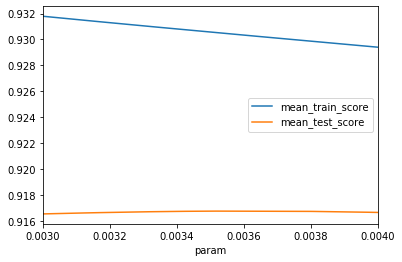

In [238]:
mean_test_score  = lasso_param_search3.cv_results_['mean_test_score']
std_test_score   = lasso_param_search3.cv_results_['std_test_score']
mean_train_score = lasso_param_search3.cv_results_['mean_train_score']
std_train_score  = lasso_param_search3.cv_results_['std_train_score']

params = list(map(lambda s: s['alpha'], lasso_param_search3.cv_results_['params']))

lasso_vis_df = pd.DataFrame({'param': params, 'mean_test_score': mean_test_score,
                             'std_test_score': std_test_score, 
                             'mean_train_score':mean_train_score,
                             'std_train_score': std_train_score})

# lasso_vis_df.to_csv(f"lasso_coefs{'lasso_param_search2_1.csv', index = False)

lasso_vis_df.plot(x = 'param', y = ['mean_train_score', 'mean_test_score'])
print(max(mean_test_score))

In [ ]:
0.9181468490617748

In [241]:
best_alpha3 = lasso_param_search3.best_estimator_.get_params()['alpha']

In [242]:
best_alpha3

0.0035704753961634697

# Bootstrap

In [257]:
from sklearn.utils import resample

n_bootstrap = 1000
coefs_bs = []
lasso_bs = Lasso(alpha = best_alpha3)
lasso_bs.fit(X_train, y_train)


for _ in range(n_bootstrap):
    X_boot, y_boot = resample(X_train, y_train)
    lasso_bs.fit(X_boot, y_boot)
    coefs_bs.append(lasso_bs.coef_)
    

In [258]:
bootstrap_coefs = pd.DataFrame(np.array(coefs_bs).reshape(n_bootstrap, -1), columns = X_train.columns)

In [283]:
bootstrap_coefs.loc[:, bootstrap_coefs.std() > 0].std().sort_values(ascending = False)[0:10]

SaleType_New             0.011743
SaleCondition_Partial    0.011418
YearBuilt                0.008381
Exterior1st_BrkComm      0.007170
GarageArea               0.006972
GarageCars               0.006906
OverallQual              0.006647
1stFlrSF                 0.006614
Neighborhood_IDOTRR      0.006499
TotalBsmtSF              0.006421
dtype: float64

In [ ]:
y_mean = np.zeros(1459)
for i in y_all_boot:
    y_mean += i
y_mean = y_mean/n_bootstrap

submission = pd.DataFrame({'Id': X_test['Id'], 'SalePrice': y_mean})
submission.to_csv('submission_lasso_boot.csv',index=False)

In [ ]:
min(y_predict - y_mean)

# XGBoost

In [ ]:
import xgboost as xgb
xgboost_linear = xgb.XGBRegressor(objective='reg:squarederror', booster='gbtree', verbosity=2)

boost_params = 

xgboost_linear.fit(X_train, y_train)



# Submission

In [239]:
y_predict = np.expm1(lasso_param_search3.predict(X_test.loc[:,X_test.columns != 'Id']))

submission = pd.DataFrame({'Id': X_test['Id'], 'SalePrice': y_predict})

submission.to_csv('submission_lasso_more_features.csv',index=False)

In [240]:
y_predict

array([113448.50658532, 156881.32805248, 175285.54406905, ...,
       167458.94712255, 121427.63350166, 217193.35195476])